In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import *
from math import sqrt
from matplotlib import pyplot
import numpy as np

In [2]:
df = pd.read_csv('CAP5.csv')
df["datetime"] = pd.to_datetime(df["datetime"],format = "%Y-%m-%d %H:%M:%S")
df.drop(["datetime","cycle","ambient_temperature"],inplace=True,axis=1)
ds = df.values
ds = ds.astype('float32')

In [3]:
train_size = int(len(ds) * 0.9) 
train_dataset, test_dataset = ds[0:train_size,:], ds[train_size:len(ds),:]

In [4]:
def exp(step_back,repeat_num,neuron_number,epochs,batch_number):
    arr = []
    for i in range(repeat_num):
        X_train, Y_train = [], []
        for i in range(len(train_dataset)-step_back - 1):
            a = train_dataset[i:(i+step_back), 0]
            X_train.append(a)
            Y_train.append(train_dataset[i + step_back, 0])
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        X_test, Y_test = [], []
        for i in range(len(test_dataset)-step_back - 1):
            a = test_dataset[i:(i+step_back), 0]
            X_test.append(a)
            Y_test.append(test_dataset[i + step_back, 0])
        X_test = np.array(X_test)
        Y_test = np.array(Y_test)
        model = Sequential()
        model.add(InputLayer((step_back,1)))
        model.add(Bidirectional(LSTM(neuron_number)))
        #model.add(Dense(neuron_number_2, 'relu'))
        #model.add(layers.BatchNormalization())
        model.add(Dense(units = 1))
        model.summary()
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train, Y_train, epochs=epochs,verbose=2)   
        trainScore = model.evaluate(X_train, Y_train, verbose=1)
        print('Train Score: %.4f MSE (%.5f RMSE)' % (trainScore, np.sqrt(trainScore)))
        testScore = model.evaluate(X_test, Y_test, verbose=1)
        print('Test Score: %.4f MSE (%.5f RMSE)' % (testScore, np.sqrt(testScore)))
        arr.append(np.sqrt(testScore))
    return arr

In [5]:
import seaborn as sns 
#step_back_number
dic = {}
for i in [2,3,4,5,6,7,8,9,10,15]:
    dic[i] = exp(i,5,128,100,2)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              133120    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.9747 - 3s/epoch - 538ms/step
Epoch 2/100
5/5 - 0s - loss: 1.3075 - 22ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 0.7584 - 24ms/epoch - 5ms/step
Epoch 4/100
5/5 - 0s - loss: 0.3407 - 23ms/epoch - 5ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0854 - 24ms/epoch - 5ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0048 - 26ms/epoch - 5ms/step
Epoch 7/100
5/5 - 0s

Epoch 2/100
5/5 - 0s - loss: 1.6739 - 22ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 1.0504 - 25ms/epoch - 5ms/step
Epoch 4/100
5/5 - 0s - loss: 0.5624 - 20ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 0.2143 - 22ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0348 - 20ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0097 - 24ms/epoch - 5ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0442 - 24ms/epoch - 5ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0415 - 19ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0144 - 21ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0016 - 22ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0033 - 21ms/epoch - 4ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0054 - 19ms/epoch - 4ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0039 - 20ms/epoch - 4ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0015 - 21ms/epoch - 4ms/step
Epoch 16/100
5/5 - 0s - loss: 8.4877e-04 - 19ms/epoch - 4ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0012 - 17ms/epoch - 3ms/step
Epoch 18/100
5/5 - 0s - loss

5/5 - 0s - loss: 0.0011 - 21ms/epoch - 4ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0011 - 21ms/epoch - 4ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0014 - 22ms/epoch - 4ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0011 - 20ms/epoch - 4ms/step
Epoch 19/100
5/5 - 0s - loss: 8.5780e-04 - 22ms/epoch - 4ms/step
Epoch 20/100
5/5 - 0s - loss: 8.5631e-04 - 21ms/epoch - 4ms/step
Epoch 21/100
5/5 - 0s - loss: 9.0060e-04 - 20ms/epoch - 4ms/step
Epoch 22/100
5/5 - 0s - loss: 8.6915e-04 - 22ms/epoch - 4ms/step
Epoch 23/100
5/5 - 0s - loss: 8.2825e-04 - 21ms/epoch - 4ms/step
Epoch 24/100
5/5 - 0s - loss: 8.2583e-04 - 20ms/epoch - 4ms/step
Epoch 25/100
5/5 - 0s - loss: 8.2223e-04 - 22ms/epoch - 4ms/step
Epoch 26/100
5/5 - 0s - loss: 8.1079e-04 - 21ms/epoch - 4ms/step
Epoch 27/100
5/5 - 0s - loss: 8.0670e-04 - 20ms/epoch - 4ms/step
Epoch 28/100
5/5 - 0s - loss: 7.9791e-04 - 22ms/epoch - 4ms/step
Epoch 29/100
5/5 - 0s - loss: 7.9067e-04 - 21ms/epoch - 4ms/step
Epoch 30/100
5/5 - 0s - loss: 7.8646e-04 - 23ms/epoch 

Epoch 28/100
5/5 - 0s - loss: 7.7332e-04 - 15ms/epoch - 3ms/step
Epoch 29/100
5/5 - 0s - loss: 7.6684e-04 - 14ms/epoch - 3ms/step
Epoch 30/100
5/5 - 0s - loss: 7.5996e-04 - 15ms/epoch - 3ms/step
Epoch 31/100
5/5 - 0s - loss: 7.5257e-04 - 14ms/epoch - 3ms/step
Epoch 32/100
5/5 - 0s - loss: 7.4530e-04 - 14ms/epoch - 3ms/step
Epoch 33/100
5/5 - 0s - loss: 7.4389e-04 - 14ms/epoch - 3ms/step
Epoch 34/100
5/5 - 0s - loss: 7.3471e-04 - 16ms/epoch - 3ms/step
Epoch 35/100
5/5 - 0s - loss: 7.2734e-04 - 15ms/epoch - 3ms/step
Epoch 36/100
5/5 - 0s - loss: 7.2205e-04 - 17ms/epoch - 3ms/step
Epoch 37/100
5/5 - 0s - loss: 7.1725e-04 - 15ms/epoch - 3ms/step
Epoch 38/100
5/5 - 0s - loss: 7.1062e-04 - 16ms/epoch - 3ms/step
Epoch 39/100
5/5 - 0s - loss: 7.0529e-04 - 15ms/epoch - 3ms/step
Epoch 40/100
5/5 - 0s - loss: 6.9829e-04 - 15ms/epoch - 3ms/step
Epoch 41/100
5/5 - 0s - loss: 6.9327e-04 - 15ms/epoch - 3ms/step
Epoch 42/100
5/5 - 0s - loss: 6.8693e-04 - 15ms/epoch - 3ms/step
Epoch 43/100
5/5 - 0s - l

Epoch 41/100
5/5 - 0s - loss: 7.0591e-04 - 16ms/epoch - 3ms/step
Epoch 42/100
5/5 - 0s - loss: 7.0116e-04 - 21ms/epoch - 4ms/step
Epoch 43/100
5/5 - 0s - loss: 6.9319e-04 - 28ms/epoch - 6ms/step
Epoch 44/100
5/5 - 0s - loss: 6.8641e-04 - 30ms/epoch - 6ms/step
Epoch 45/100
5/5 - 0s - loss: 6.8035e-04 - 22ms/epoch - 4ms/step
Epoch 46/100
5/5 - 0s - loss: 6.7700e-04 - 27ms/epoch - 5ms/step
Epoch 47/100
5/5 - 0s - loss: 6.6774e-04 - 24ms/epoch - 5ms/step
Epoch 48/100
5/5 - 0s - loss: 6.7162e-04 - 23ms/epoch - 5ms/step
Epoch 49/100
5/5 - 0s - loss: 6.5943e-04 - 22ms/epoch - 4ms/step
Epoch 50/100
5/5 - 0s - loss: 6.5167e-04 - 23ms/epoch - 5ms/step
Epoch 51/100
5/5 - 0s - loss: 6.4523e-04 - 23ms/epoch - 5ms/step
Epoch 52/100
5/5 - 0s - loss: 6.3907e-04 - 25ms/epoch - 5ms/step
Epoch 53/100
5/5 - 0s - loss: 6.3224e-04 - 22ms/epoch - 4ms/step
Epoch 54/100
5/5 - 0s - loss: 6.3045e-04 - 19ms/epoch - 4ms/step
Epoch 55/100
5/5 - 0s - loss: 6.2004e-04 - 20ms/epoch - 4ms/step
Epoch 56/100
5/5 - 0s - l

5/5 - 0s - loss: 4.8555e-04 - 19ms/epoch - 4ms/step
Epoch 54/100
5/5 - 0s - loss: 4.7940e-04 - 18ms/epoch - 4ms/step
Epoch 55/100
5/5 - 0s - loss: 4.7496e-04 - 19ms/epoch - 4ms/step
Epoch 56/100
5/5 - 0s - loss: 4.6776e-04 - 19ms/epoch - 4ms/step
Epoch 57/100
5/5 - 0s - loss: 4.6494e-04 - 19ms/epoch - 4ms/step
Epoch 58/100
5/5 - 0s - loss: 4.5358e-04 - 20ms/epoch - 4ms/step
Epoch 59/100
5/5 - 0s - loss: 4.5455e-04 - 19ms/epoch - 4ms/step
Epoch 60/100
5/5 - 0s - loss: 4.5056e-04 - 19ms/epoch - 4ms/step
Epoch 61/100
5/5 - 0s - loss: 4.3858e-04 - 18ms/epoch - 4ms/step
Epoch 62/100
5/5 - 0s - loss: 4.3371e-04 - 18ms/epoch - 4ms/step
Epoch 63/100
5/5 - 0s - loss: 4.2886e-04 - 18ms/epoch - 4ms/step
Epoch 64/100
5/5 - 0s - loss: 4.2678e-04 - 19ms/epoch - 4ms/step
Epoch 65/100
5/5 - 0s - loss: 4.2010e-04 - 19ms/epoch - 4ms/step
Epoch 66/100
5/5 - 0s - loss: 4.1616e-04 - 19ms/epoch - 4ms/step
Epoch 67/100
5/5 - 0s - loss: 4.0789e-04 - 19ms/epoch - 4ms/step
Epoch 68/100
5/5 - 0s - loss: 4.0290e-

Epoch 66/100
5/5 - 0s - loss: 3.5041e-04 - 21ms/epoch - 4ms/step
Epoch 67/100
5/5 - 0s - loss: 3.4665e-04 - 20ms/epoch - 4ms/step
Epoch 68/100
5/5 - 0s - loss: 3.4328e-04 - 20ms/epoch - 4ms/step
Epoch 69/100
5/5 - 0s - loss: 3.4175e-04 - 20ms/epoch - 4ms/step
Epoch 70/100
5/5 - 0s - loss: 3.3415e-04 - 20ms/epoch - 4ms/step
Epoch 71/100
5/5 - 0s - loss: 3.4058e-04 - 20ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 3.2425e-04 - 20ms/epoch - 4ms/step
Epoch 73/100
5/5 - 0s - loss: 3.4046e-04 - 20ms/epoch - 4ms/step
Epoch 74/100
5/5 - 0s - loss: 3.1740e-04 - 20ms/epoch - 4ms/step
Epoch 75/100
5/5 - 0s - loss: 3.3358e-04 - 20ms/epoch - 4ms/step
Epoch 76/100
5/5 - 0s - loss: 3.2147e-04 - 20ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - loss: 3.1829e-04 - 20ms/epoch - 4ms/step
Epoch 78/100
5/5 - 0s - loss: 3.0821e-04 - 20ms/epoch - 4ms/step
Epoch 79/100
5/5 - 0s - loss: 3.0575e-04 - 20ms/epoch - 4ms/step
Epoch 80/100
5/5 - 0s - loss: 3.0330e-04 - 20ms/epoch - 4ms/step
Epoch 81/100
5/5 - 0s - l

5/5 - 0s - loss: 3.5296e-04 - 21ms/epoch - 4ms/step
Epoch 79/100
5/5 - 0s - loss: 3.4704e-04 - 21ms/epoch - 4ms/step
Epoch 80/100
5/5 - 0s - loss: 3.4815e-04 - 20ms/epoch - 4ms/step
Epoch 81/100
5/5 - 0s - loss: 3.4222e-04 - 81ms/epoch - 16ms/step
Epoch 82/100
5/5 - 0s - loss: 3.4144e-04 - 49ms/epoch - 10ms/step
Epoch 83/100
5/5 - 0s - loss: 3.3850e-04 - 62ms/epoch - 12ms/step
Epoch 84/100
5/5 - 0s - loss: 3.3333e-04 - 37ms/epoch - 7ms/step
Epoch 85/100
5/5 - 0s - loss: 3.2832e-04 - 35ms/epoch - 7ms/step
Epoch 86/100
5/5 - 0s - loss: 3.2341e-04 - 29ms/epoch - 6ms/step
Epoch 87/100
5/5 - 0s - loss: 3.2002e-04 - 28ms/epoch - 6ms/step
Epoch 88/100
5/5 - 0s - loss: 3.2038e-04 - 29ms/epoch - 6ms/step
Epoch 89/100
5/5 - 0s - loss: 3.1754e-04 - 25ms/epoch - 5ms/step
Epoch 90/100
5/5 - 0s - loss: 3.1137e-04 - 24ms/epoch - 5ms/step
Epoch 91/100
5/5 - 0s - loss: 3.0759e-04 - 26ms/epoch - 5ms/step
Epoch 92/100
5/5 - 0s - loss: 3.0524e-04 - 23ms/epoch - 5ms/step
Epoch 93/100
5/5 - 0s - loss: 3.025

Epoch 91/100
5/5 - 0s - loss: 2.8086e-04 - 32ms/epoch - 6ms/step
Epoch 92/100
5/5 - 0s - loss: 2.7868e-04 - 33ms/epoch - 7ms/step
Epoch 93/100
5/5 - 0s - loss: 2.7909e-04 - 32ms/epoch - 6ms/step
Epoch 94/100
5/5 - 0s - loss: 2.7363e-04 - 31ms/epoch - 6ms/step
Epoch 95/100
5/5 - 0s - loss: 2.7081e-04 - 32ms/epoch - 6ms/step
Epoch 96/100
5/5 - 0s - loss: 2.6956e-04 - 32ms/epoch - 6ms/step
Epoch 97/100
5/5 - 0s - loss: 2.6691e-04 - 33ms/epoch - 7ms/step
Epoch 98/100
5/5 - 0s - loss: 2.6946e-04 - 32ms/epoch - 6ms/step
Epoch 99/100
5/5 - 0s - loss: 2.6336e-04 - 32ms/epoch - 6ms/step
Epoch 100/100
5/5 - 0s - loss: 2.7058e-04 - 33ms/epoch - 7ms/step
5/5 [==============================] - 1s 4ms/step - loss: 2.6739e-04
Train Score: 0.0003 MSE (0.01635 RMSE)
1/1 [==============================] - 0s 19ms/step - loss: 1.1594e-04
Test Score: 0.0001 MSE (0.01077 RMSE)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape  

1/1 [==============================] - 0s 19ms/step - loss: 3.2310e-04
Test Score: 0.0003 MSE (0.01798 RMSE)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirecti  (None, 256)              133120    
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.6027 - 3s/epoch - 664ms/step
Epoch 2/100
5/5 - 0s - loss: 0.4609 - 36ms/epoch - 7ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0300 - 33ms/epoch - 7ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1468 - 33ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss:

_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 2.4087 - 3s/epoch - 682ms/step
Epoch 2/100
5/5 - 0s - loss: 1.0202 - 41ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1955 - 38ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0407 - 40ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.1431 - 38ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0416 - 38ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0042 - 38ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0221 - 38ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0186 - 41ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0038 - 36ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0021 - 38ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0047 - 38ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0021 - 37ms/epoch - 7ms/step
Epoch 14/100
5/5 - 0s - loss: 8.8942e-04 - 39ms/epoch - 8ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0015 - 36ms/epoch - 7ms/step
Epoch 16/100
5/5 - 0s - 

Epoch 13/100
5/5 - 0s - loss: 9.9623e-04 - 31ms/epoch - 6ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0013 - 32ms/epoch - 6ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0014 - 31ms/epoch - 6ms/step
Epoch 16/100
5/5 - 0s - loss: 7.9826e-04 - 31ms/epoch - 6ms/step
Epoch 17/100
5/5 - 0s - loss: 8.3295e-04 - 32ms/epoch - 6ms/step
Epoch 18/100
5/5 - 0s - loss: 8.5903e-04 - 32ms/epoch - 6ms/step
Epoch 19/100
5/5 - 0s - loss: 6.9669e-04 - 31ms/epoch - 6ms/step
Epoch 20/100
5/5 - 0s - loss: 7.1004e-04 - 31ms/epoch - 6ms/step
Epoch 21/100
5/5 - 0s - loss: 7.0054e-04 - 32ms/epoch - 6ms/step
Epoch 22/100
5/5 - 0s - loss: 6.7042e-04 - 31ms/epoch - 6ms/step
Epoch 23/100
5/5 - 0s - loss: 6.6534e-04 - 31ms/epoch - 6ms/step
Epoch 24/100
5/5 - 0s - loss: 6.4468e-04 - 34ms/epoch - 7ms/step
Epoch 25/100
5/5 - 0s - loss: 6.4409e-04 - 34ms/epoch - 7ms/step
Epoch 26/100
5/5 - 0s - loss: 6.3482e-04 - 34ms/epoch - 7ms/step
Epoch 27/100
5/5 - 0s - loss: 6.2122e-04 - 34ms/epoch - 7ms/step
Epoch 28/100
5/5 - 0s - loss: 6.1

Epoch 26/100
5/5 - 0s - loss: 7.2254e-04 - 32ms/epoch - 6ms/step
Epoch 27/100
5/5 - 0s - loss: 7.0928e-04 - 34ms/epoch - 7ms/step
Epoch 28/100
5/5 - 0s - loss: 7.0161e-04 - 32ms/epoch - 6ms/step
Epoch 29/100
5/5 - 0s - loss: 6.9311e-04 - 32ms/epoch - 6ms/step
Epoch 30/100
5/5 - 0s - loss: 6.8409e-04 - 32ms/epoch - 6ms/step
Epoch 31/100
5/5 - 0s - loss: 6.7623e-04 - 31ms/epoch - 6ms/step
Epoch 32/100
5/5 - 0s - loss: 6.6704e-04 - 33ms/epoch - 7ms/step
Epoch 33/100
5/5 - 0s - loss: 6.6047e-04 - 31ms/epoch - 6ms/step
Epoch 34/100
5/5 - 0s - loss: 6.4968e-04 - 31ms/epoch - 6ms/step
Epoch 35/100
5/5 - 0s - loss: 6.4302e-04 - 31ms/epoch - 6ms/step
Epoch 36/100
5/5 - 0s - loss: 6.3809e-04 - 31ms/epoch - 6ms/step
Epoch 37/100
5/5 - 0s - loss: 6.2648e-04 - 33ms/epoch - 7ms/step
Epoch 38/100
5/5 - 0s - loss: 6.1725e-04 - 33ms/epoch - 7ms/step
Epoch 39/100
5/5 - 0s - loss: 6.0782e-04 - 31ms/epoch - 6ms/step
Epoch 40/100
5/5 - 0s - loss: 6.0052e-04 - 31ms/epoch - 6ms/step
Epoch 41/100
5/5 - 0s - l

5/5 - 0s - loss: 4.9304e-04 - 29ms/epoch - 6ms/step
Epoch 39/100
5/5 - 0s - loss: 4.8643e-04 - 29ms/epoch - 6ms/step
Epoch 40/100
5/5 - 0s - loss: 4.7960e-04 - 29ms/epoch - 6ms/step
Epoch 41/100
5/5 - 0s - loss: 4.7290e-04 - 28ms/epoch - 6ms/step
Epoch 42/100
5/5 - 0s - loss: 4.7282e-04 - 29ms/epoch - 6ms/step
Epoch 43/100
5/5 - 0s - loss: 4.6151e-04 - 29ms/epoch - 6ms/step
Epoch 44/100
5/5 - 0s - loss: 4.5385e-04 - 29ms/epoch - 6ms/step
Epoch 45/100
5/5 - 0s - loss: 4.5012e-04 - 28ms/epoch - 6ms/step
Epoch 46/100
5/5 - 0s - loss: 4.4357e-04 - 29ms/epoch - 6ms/step
Epoch 47/100
5/5 - 0s - loss: 4.3882e-04 - 27ms/epoch - 5ms/step
Epoch 48/100
5/5 - 0s - loss: 4.3495e-04 - 28ms/epoch - 6ms/step
Epoch 49/100
5/5 - 0s - loss: 4.2839e-04 - 27ms/epoch - 5ms/step
Epoch 50/100
5/5 - 0s - loss: 4.2126e-04 - 29ms/epoch - 6ms/step
Epoch 51/100
5/5 - 0s - loss: 4.1822e-04 - 28ms/epoch - 6ms/step
Epoch 52/100
5/5 - 0s - loss: 4.2377e-04 - 29ms/epoch - 6ms/step
Epoch 53/100
5/5 - 0s - loss: 4.1128e-

Epoch 51/100
5/5 - 0s - loss: 4.7036e-04 - 38ms/epoch - 8ms/step
Epoch 52/100
5/5 - 0s - loss: 4.6278e-04 - 37ms/epoch - 7ms/step
Epoch 53/100
5/5 - 0s - loss: 4.5758e-04 - 36ms/epoch - 7ms/step
Epoch 54/100
5/5 - 0s - loss: 4.5595e-04 - 37ms/epoch - 7ms/step
Epoch 55/100
5/5 - 0s - loss: 4.5044e-04 - 36ms/epoch - 7ms/step
Epoch 56/100
5/5 - 0s - loss: 4.3993e-04 - 36ms/epoch - 7ms/step
Epoch 57/100
5/5 - 0s - loss: 4.2940e-04 - 37ms/epoch - 7ms/step
Epoch 58/100
5/5 - 0s - loss: 4.2833e-04 - 34ms/epoch - 7ms/step
Epoch 59/100
5/5 - 0s - loss: 4.1210e-04 - 37ms/epoch - 7ms/step
Epoch 60/100
5/5 - 0s - loss: 4.1461e-04 - 37ms/epoch - 7ms/step
Epoch 61/100
5/5 - 0s - loss: 4.0750e-04 - 36ms/epoch - 7ms/step
Epoch 62/100
5/5 - 0s - loss: 3.9824e-04 - 38ms/epoch - 8ms/step
Epoch 63/100
5/5 - 0s - loss: 3.9445e-04 - 37ms/epoch - 7ms/step
Epoch 64/100
5/5 - 0s - loss: 3.9269e-04 - 36ms/epoch - 7ms/step
Epoch 65/100
5/5 - 0s - loss: 3.8393e-04 - 38ms/epoch - 8ms/step
Epoch 66/100
5/5 - 0s - l

5/5 - 0s - loss: 3.9879e-04 - 36ms/epoch - 7ms/step
Epoch 64/100
5/5 - 0s - loss: 3.8330e-04 - 34ms/epoch - 7ms/step
Epoch 65/100
5/5 - 0s - loss: 3.8750e-04 - 33ms/epoch - 7ms/step
Epoch 66/100
5/5 - 0s - loss: 3.7770e-04 - 36ms/epoch - 7ms/step
Epoch 67/100
5/5 - 0s - loss: 3.7477e-04 - 36ms/epoch - 7ms/step
Epoch 68/100
5/5 - 0s - loss: 3.6858e-04 - 35ms/epoch - 7ms/step
Epoch 69/100
5/5 - 0s - loss: 3.6074e-04 - 38ms/epoch - 8ms/step
Epoch 70/100
5/5 - 0s - loss: 3.5621e-04 - 36ms/epoch - 7ms/step
Epoch 71/100
5/5 - 0s - loss: 3.5551e-04 - 36ms/epoch - 7ms/step
Epoch 72/100
5/5 - 0s - loss: 3.4854e-04 - 36ms/epoch - 7ms/step
Epoch 73/100
5/5 - 0s - loss: 3.4570e-04 - 34ms/epoch - 7ms/step
Epoch 74/100
5/5 - 0s - loss: 3.4637e-04 - 36ms/epoch - 7ms/step
Epoch 75/100
5/5 - 0s - loss: 3.3510e-04 - 35ms/epoch - 7ms/step
Epoch 76/100
5/5 - 0s - loss: 3.3598e-04 - 37ms/epoch - 7ms/step
Epoch 77/100
5/5 - 0s - loss: 3.2878e-04 - 38ms/epoch - 8ms/step
Epoch 78/100
5/5 - 0s - loss: 3.2944e-

5/5 - 0s - loss: 3.1644e-04 - 41ms/epoch - 8ms/step
Epoch 76/100
5/5 - 0s - loss: 3.0576e-04 - 44ms/epoch - 9ms/step
Epoch 77/100
5/5 - 0s - loss: 3.0810e-04 - 42ms/epoch - 8ms/step
Epoch 78/100
5/5 - 0s - loss: 2.9977e-04 - 42ms/epoch - 8ms/step
Epoch 79/100
5/5 - 0s - loss: 3.0010e-04 - 42ms/epoch - 8ms/step
Epoch 80/100
5/5 - 0s - loss: 2.9660e-04 - 41ms/epoch - 8ms/step
Epoch 81/100
5/5 - 0s - loss: 2.9235e-04 - 40ms/epoch - 8ms/step
Epoch 82/100
5/5 - 0s - loss: 2.9354e-04 - 41ms/epoch - 8ms/step
Epoch 83/100
5/5 - 0s - loss: 2.9494e-04 - 40ms/epoch - 8ms/step
Epoch 84/100
5/5 - 0s - loss: 2.9208e-04 - 41ms/epoch - 8ms/step
Epoch 85/100
5/5 - 0s - loss: 2.8809e-04 - 41ms/epoch - 8ms/step
Epoch 86/100
5/5 - 0s - loss: 2.8329e-04 - 42ms/epoch - 8ms/step
Epoch 87/100
5/5 - 0s - loss: 2.8899e-04 - 41ms/epoch - 8ms/step
Epoch 88/100
5/5 - 0s - loss: 2.8317e-04 - 34ms/epoch - 7ms/step
Epoch 89/100
5/5 - 0s - loss: 2.7884e-04 - 38ms/epoch - 8ms/step
Epoch 90/100
5/5 - 0s - loss: 2.9113e-

Epoch 88/100
5/5 - 0s - loss: 2.8637e-04 - 40ms/epoch - 8ms/step
Epoch 89/100
5/5 - 0s - loss: 2.8662e-04 - 39ms/epoch - 8ms/step
Epoch 90/100
5/5 - 0s - loss: 2.8386e-04 - 38ms/epoch - 8ms/step
Epoch 91/100
5/5 - 0s - loss: 2.8238e-04 - 39ms/epoch - 8ms/step
Epoch 92/100
5/5 - 0s - loss: 2.8011e-04 - 38ms/epoch - 8ms/step
Epoch 93/100
5/5 - 0s - loss: 2.7780e-04 - 37ms/epoch - 7ms/step
Epoch 94/100
5/5 - 0s - loss: 2.7588e-04 - 36ms/epoch - 7ms/step
Epoch 95/100
5/5 - 0s - loss: 2.7948e-04 - 37ms/epoch - 7ms/step
Epoch 96/100
5/5 - 0s - loss: 2.7566e-04 - 37ms/epoch - 7ms/step
Epoch 97/100
5/5 - 0s - loss: 2.7590e-04 - 37ms/epoch - 7ms/step
Epoch 98/100
5/5 - 0s - loss: 2.7627e-04 - 37ms/epoch - 7ms/step
Epoch 99/100
5/5 - 0s - loss: 2.8213e-04 - 39ms/epoch - 8ms/step
Epoch 100/100
5/5 - 0s - loss: 2.7266e-04 - 67ms/epoch - 13ms/step
5/5 [==============================] - 1s 3ms/step - loss: 2.7574e-04
Train Score: 0.0003 MSE (0.01661 RMSE)
1/1 [==============================] - 0s 21

5/5 - 0s - loss: 2.7479e-04 - 37ms/epoch - 7ms/step
5/5 [==============================] - 1s 5ms/step - loss: 2.7240e-04
Train Score: 0.0003 MSE (0.01650 RMSE)
1/1 [==============================] - 0s 19ms/step - loss: 7.0053e-05
Test Score: 0.0001 MSE (0.00837 RMSE)
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_20 (Bidirecti  (None, 256)              133120    
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 2.3938 - 3s/epoch - 521ms/step
Epoch 2/100
5/5 - 0s - loss: 0.6096 - 39ms/epoc

Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.9275 - 3s/epoch - 636ms/step
Epoch 2/100
5/5 - 0s - loss: 0.3413 - 53ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1186 - 49ms/epoch - 10ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1345 - 44ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0077 - 47ms/epoch - 9ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0462 - 46ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0313 - 46ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0031 - 44ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0094 - 43ms/epoch - 9ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0067 - 46ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0013 - 47ms/epoch - 9ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0032 - 44ms/epoch - 9ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0018 - 44ms/epoch - 9ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0010 - 47ms/epoch - 9ms/step
Epoch 15/100
5/

5/5 - 0s - loss: 0.0086 - 41ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0019 - 41ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0021 - 40ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0025 - 41ms/epoch - 8ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0012 - 43ms/epoch - 9ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0013 - 40ms/epoch - 8ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0012 - 51ms/epoch - 10ms/step
Epoch 17/100
5/5 - 0s - loss: 9.4380e-04 - 44ms/epoch - 9ms/step
Epoch 18/100
5/5 - 0s - loss: 9.7015e-04 - 41ms/epoch - 8ms/step
Epoch 19/100
5/5 - 0s - loss: 9.2590e-04 - 43ms/epoch - 9ms/step
Epoch 20/100
5/5 - 0s - loss: 9.0833e-04 - 44ms/epoch - 9ms/step
Epoch 21/100
5/5 - 0s - loss: 8.7974e-04 - 46ms/epoch - 9ms/step
Epoch 22/100
5/5 - 0s - loss: 8.6075e-04 - 41ms/epoch - 8ms/step
Epoch 23/100
5/5 - 0s - loss: 8.4498e-04 - 42ms/epoch - 8ms/step
Epoch 24/100
5/5 - 0s - loss: 8.3221e-04 - 43ms/epoch - 9ms/step
Epoch 25/100
5/5 - 0s - loss: 8.1662e-04 - 44ms/epoch - 9ms/step


5/5 - 0s - loss: 7.4875e-04 - 161ms/epoch - 32ms/step
Epoch 23/100
5/5 - 0s - loss: 7.4080e-04 - 160ms/epoch - 32ms/step
Epoch 24/100
5/5 - 0s - loss: 7.3174e-04 - 111ms/epoch - 22ms/step
Epoch 25/100
5/5 - 0s - loss: 7.1944e-04 - 52ms/epoch - 10ms/step
Epoch 26/100
5/5 - 0s - loss: 7.1108e-04 - 50ms/epoch - 10ms/step
Epoch 27/100
5/5 - 0s - loss: 7.0495e-04 - 43ms/epoch - 9ms/step
Epoch 28/100
5/5 - 0s - loss: 6.9195e-04 - 44ms/epoch - 9ms/step
Epoch 29/100
5/5 - 0s - loss: 6.8604e-04 - 46ms/epoch - 9ms/step
Epoch 30/100
5/5 - 0s - loss: 6.7481e-04 - 46ms/epoch - 9ms/step
Epoch 31/100
5/5 - 0s - loss: 6.7183e-04 - 50ms/epoch - 10ms/step
Epoch 32/100
5/5 - 0s - loss: 6.5955e-04 - 43ms/epoch - 9ms/step
Epoch 33/100
5/5 - 0s - loss: 6.5441e-04 - 42ms/epoch - 8ms/step
Epoch 34/100
5/5 - 0s - loss: 6.4246e-04 - 40ms/epoch - 8ms/step
Epoch 35/100
5/5 - 0s - loss: 6.3102e-04 - 41ms/epoch - 8ms/step
Epoch 36/100
5/5 - 0s - loss: 6.2853e-04 - 40ms/epoch - 8ms/step
Epoch 37/100
5/5 - 0s - loss:

Epoch 34/100
5/5 - 0s - loss: 6.1160e-04 - 36ms/epoch - 7ms/step
Epoch 35/100
5/5 - 0s - loss: 6.0614e-04 - 37ms/epoch - 7ms/step
Epoch 36/100
5/5 - 0s - loss: 6.0455e-04 - 39ms/epoch - 8ms/step
Epoch 37/100
5/5 - 0s - loss: 5.7404e-04 - 39ms/epoch - 8ms/step
Epoch 38/100
5/5 - 0s - loss: 5.6680e-04 - 38ms/epoch - 8ms/step
Epoch 39/100
5/5 - 0s - loss: 5.6346e-04 - 39ms/epoch - 8ms/step
Epoch 40/100
5/5 - 0s - loss: 5.5134e-04 - 38ms/epoch - 8ms/step
Epoch 41/100
5/5 - 0s - loss: 5.4812e-04 - 40ms/epoch - 8ms/step
Epoch 42/100
5/5 - 0s - loss: 5.4279e-04 - 39ms/epoch - 8ms/step
Epoch 43/100
5/5 - 0s - loss: 5.2838e-04 - 39ms/epoch - 8ms/step
Epoch 44/100
5/5 - 0s - loss: 5.2156e-04 - 38ms/epoch - 8ms/step
Epoch 45/100
5/5 - 0s - loss: 5.1250e-04 - 37ms/epoch - 7ms/step
Epoch 46/100
5/5 - 0s - loss: 5.0581e-04 - 39ms/epoch - 8ms/step
Epoch 47/100
5/5 - 0s - loss: 4.9908e-04 - 39ms/epoch - 8ms/step
Epoch 48/100
5/5 - 0s - loss: 4.9240e-04 - 38ms/epoch - 8ms/step
Epoch 49/100
5/5 - 0s - l

5/5 - 0s - loss: 6.5034e-04 - 46ms/epoch - 9ms/step
Epoch 47/100
5/5 - 0s - loss: 6.2926e-04 - 45ms/epoch - 9ms/step
Epoch 48/100
5/5 - 0s - loss: 6.1533e-04 - 48ms/epoch - 10ms/step
Epoch 49/100
5/5 - 0s - loss: 6.1047e-04 - 47ms/epoch - 9ms/step
Epoch 50/100
5/5 - 0s - loss: 6.0080e-04 - 47ms/epoch - 9ms/step
Epoch 51/100
5/5 - 0s - loss: 5.8821e-04 - 47ms/epoch - 9ms/step
Epoch 52/100
5/5 - 0s - loss: 5.8099e-04 - 44ms/epoch - 9ms/step
Epoch 53/100
5/5 - 0s - loss: 5.7390e-04 - 44ms/epoch - 9ms/step
Epoch 54/100
5/5 - 0s - loss: 5.5335e-04 - 49ms/epoch - 10ms/step
Epoch 55/100
5/5 - 0s - loss: 5.4499e-04 - 47ms/epoch - 9ms/step
Epoch 56/100
5/5 - 0s - loss: 5.3365e-04 - 48ms/epoch - 10ms/step
Epoch 57/100
5/5 - 0s - loss: 5.3385e-04 - 47ms/epoch - 9ms/step
Epoch 58/100
5/5 - 0s - loss: 5.2193e-04 - 48ms/epoch - 10ms/step
Epoch 59/100
5/5 - 0s - loss: 5.0763e-04 - 47ms/epoch - 9ms/step
Epoch 60/100
5/5 - 0s - loss: 5.0506e-04 - 46ms/epoch - 9ms/step
Epoch 61/100
5/5 - 0s - loss: 4.96

5/5 - 0s - loss: 4.8868e-04 - 41ms/epoch - 8ms/step
Epoch 59/100
5/5 - 0s - loss: 4.7737e-04 - 42ms/epoch - 8ms/step
Epoch 60/100
5/5 - 0s - loss: 4.6365e-04 - 42ms/epoch - 8ms/step
Epoch 61/100
5/5 - 0s - loss: 4.5781e-04 - 42ms/epoch - 8ms/step
Epoch 62/100
5/5 - 0s - loss: 4.4829e-04 - 39ms/epoch - 8ms/step
Epoch 63/100
5/5 - 0s - loss: 4.4803e-04 - 39ms/epoch - 8ms/step
Epoch 64/100
5/5 - 0s - loss: 4.3384e-04 - 41ms/epoch - 8ms/step
Epoch 65/100
5/5 - 0s - loss: 4.3587e-04 - 41ms/epoch - 8ms/step
Epoch 66/100
5/5 - 0s - loss: 4.2634e-04 - 43ms/epoch - 9ms/step
Epoch 67/100
5/5 - 0s - loss: 4.1748e-04 - 40ms/epoch - 8ms/step
Epoch 68/100
5/5 - 0s - loss: 4.1573e-04 - 38ms/epoch - 8ms/step
Epoch 69/100
5/5 - 0s - loss: 4.0115e-04 - 41ms/epoch - 8ms/step
Epoch 70/100
5/5 - 0s - loss: 4.0174e-04 - 41ms/epoch - 8ms/step
Epoch 71/100
5/5 - 0s - loss: 3.9444e-04 - 40ms/epoch - 8ms/step
Epoch 72/100
5/5 - 0s - loss: 3.9195e-04 - 39ms/epoch - 8ms/step
Epoch 73/100
5/5 - 0s - loss: 3.8255e-

Epoch 70/100
5/5 - 0s - loss: 4.2301e-04 - 48ms/epoch - 10ms/step
Epoch 71/100
5/5 - 0s - loss: 3.9693e-04 - 47ms/epoch - 9ms/step
Epoch 72/100
5/5 - 0s - loss: 3.9847e-04 - 47ms/epoch - 9ms/step
Epoch 73/100
5/5 - 0s - loss: 3.9336e-04 - 45ms/epoch - 9ms/step
Epoch 74/100
5/5 - 0s - loss: 3.9244e-04 - 44ms/epoch - 9ms/step
Epoch 75/100
5/5 - 0s - loss: 3.7717e-04 - 46ms/epoch - 9ms/step
Epoch 76/100
5/5 - 0s - loss: 3.8171e-04 - 47ms/epoch - 9ms/step
Epoch 77/100
5/5 - 0s - loss: 3.7960e-04 - 47ms/epoch - 9ms/step
Epoch 78/100
5/5 - 0s - loss: 3.7800e-04 - 49ms/epoch - 10ms/step
Epoch 79/100
5/5 - 0s - loss: 3.6203e-04 - 46ms/epoch - 9ms/step
Epoch 80/100
5/5 - 0s - loss: 3.6883e-04 - 45ms/epoch - 9ms/step
Epoch 81/100
5/5 - 0s - loss: 3.5842e-04 - 44ms/epoch - 9ms/step
Epoch 82/100
5/5 - 0s - loss: 3.5491e-04 - 46ms/epoch - 9ms/step
Epoch 83/100
5/5 - 0s - loss: 3.5526e-04 - 46ms/epoch - 9ms/step
Epoch 84/100
5/5 - 0s - loss: 3.4624e-04 - 48ms/epoch - 10ms/step
Epoch 85/100
5/5 - 0s 

Epoch 83/100
5/5 - 0s - loss: 3.4693e-04 - 43ms/epoch - 9ms/step
Epoch 84/100
5/5 - 0s - loss: 3.7431e-04 - 43ms/epoch - 9ms/step
Epoch 85/100
5/5 - 0s - loss: 3.5324e-04 - 40ms/epoch - 8ms/step
Epoch 86/100
5/5 - 0s - loss: 3.3248e-04 - 40ms/epoch - 8ms/step
Epoch 87/100
5/5 - 0s - loss: 3.7283e-04 - 43ms/epoch - 9ms/step
Epoch 88/100
5/5 - 0s - loss: 3.7749e-04 - 40ms/epoch - 8ms/step
Epoch 89/100
5/5 - 0s - loss: 3.2717e-04 - 41ms/epoch - 8ms/step
Epoch 90/100
5/5 - 0s - loss: 3.4946e-04 - 42ms/epoch - 8ms/step
Epoch 91/100
5/5 - 0s - loss: 3.2776e-04 - 70ms/epoch - 14ms/step
Epoch 92/100
5/5 - 0s - loss: 3.1914e-04 - 42ms/epoch - 8ms/step
Epoch 93/100
5/5 - 0s - loss: 3.1517e-04 - 40ms/epoch - 8ms/step
Epoch 94/100
5/5 - 0s - loss: 3.1497e-04 - 37ms/epoch - 7ms/step
Epoch 95/100
5/5 - 0s - loss: 3.1440e-04 - 41ms/epoch - 8ms/step
Epoch 96/100
5/5 - 0s - loss: 3.1030e-04 - 38ms/epoch - 8ms/step
Epoch 97/100
5/5 - 0s - loss: 3.1408e-04 - 41ms/epoch - 8ms/step
Epoch 98/100
5/5 - 0s - 

Epoch 94/100
5/5 - 0s - loss: 3.3594e-04 - 56ms/epoch - 11ms/step
Epoch 95/100
5/5 - 0s - loss: 3.2814e-04 - 53ms/epoch - 11ms/step
Epoch 96/100
5/5 - 0s - loss: 3.1412e-04 - 52ms/epoch - 10ms/step
Epoch 97/100
5/5 - 0s - loss: 3.2253e-04 - 51ms/epoch - 10ms/step
Epoch 98/100
5/5 - 0s - loss: 3.2299e-04 - 56ms/epoch - 11ms/step
Epoch 99/100
5/5 - 0s - loss: 3.3005e-04 - 51ms/epoch - 10ms/step
Epoch 100/100
5/5 - 0s - loss: 3.1558e-04 - 54ms/epoch - 11ms/step
5/5 [==============================] - 1s 5ms/step - loss: 3.1391e-04
Train Score: 0.0003 MSE (0.01772 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 7.0381e-05
Test Score: 0.0001 MSE (0.00839 RMSE)
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_30 (Bidirecti  (None, 256)              133120    
 onal)                                                           
                                

 bidirectional_31 (Bidirecti  (None, 256)              133120    
 onal)                                                           
                                                                 
 dense_31 (Dense)            (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.9840 - 3s/epoch - 648ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1953 - 69ms/epoch - 14ms/step
Epoch 3/100
5/5 - 0s - loss: 0.2291 - 63ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0377 - 62ms/epoch - 12ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0377 - 61ms/epoch - 12ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0509 - 60ms/epoch - 12ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0086 - 59ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0088 - 63ms/epoch - 13ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0103 - 62ms/ep

Epoch 3/100
5/5 - 0s - loss: 0.1362 - 47ms/epoch - 9ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0117 - 45ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0513 - 45ms/epoch - 9ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0198 - 47ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0045 - 48ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0119 - 49ms/epoch - 10ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0024 - 51ms/epoch - 10ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0035 - 51ms/epoch - 10ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0030 - 55ms/epoch - 11ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0012 - 53ms/epoch - 11ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0018 - 54ms/epoch - 11ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0011 - 55ms/epoch - 11ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0014 - 52ms/epoch - 10ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0011 - 53ms/epoch - 11ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0012 - 54ms/epoch - 11ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0010 - 55ms/epoch - 11ms/step
Epoch 19/100
5/5 - 

Epoch 15/100
5/5 - 0s - loss: 0.0013 - 57ms/epoch - 11ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0013 - 63ms/epoch - 13ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0012 - 60ms/epoch - 12ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0011 - 57ms/epoch - 11ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0011 - 61ms/epoch - 12ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0011 - 61ms/epoch - 12ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0011 - 57ms/epoch - 11ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0011 - 59ms/epoch - 12ms/step
Epoch 23/100
5/5 - 0s - loss: 0.0011 - 55ms/epoch - 11ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0010 - 62ms/epoch - 12ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0010 - 59ms/epoch - 12ms/step
Epoch 26/100
5/5 - 0s - loss: 9.9081e-04 - 57ms/epoch - 11ms/step
Epoch 27/100
5/5 - 0s - loss: 9.7838e-04 - 60ms/epoch - 12ms/step
Epoch 28/100
5/5 - 0s - loss: 9.5541e-04 - 57ms/epoch - 11ms/step
Epoch 29/100
5/5 - 0s - loss: 9.4215e-04 - 57ms/epoch - 11ms/step
Epoch 30/100
5/5 - 0s - loss: 9.3795e-04 - 56ms/epoch 

Epoch 27/100
5/5 - 0s - loss: 9.4508e-04 - 47ms/epoch - 9ms/step
Epoch 28/100
5/5 - 0s - loss: 9.2424e-04 - 49ms/epoch - 10ms/step
Epoch 29/100
5/5 - 0s - loss: 9.0142e-04 - 48ms/epoch - 10ms/step
Epoch 30/100
5/5 - 0s - loss: 8.7899e-04 - 48ms/epoch - 10ms/step
Epoch 31/100
5/5 - 0s - loss: 8.7675e-04 - 46ms/epoch - 9ms/step
Epoch 32/100
5/5 - 0s - loss: 8.3774e-04 - 46ms/epoch - 9ms/step
Epoch 33/100
5/5 - 0s - loss: 8.5046e-04 - 47ms/epoch - 9ms/step
Epoch 34/100
5/5 - 0s - loss: 8.1195e-04 - 45ms/epoch - 9ms/step
Epoch 35/100
5/5 - 0s - loss: 8.0805e-04 - 46ms/epoch - 9ms/step
Epoch 36/100
5/5 - 0s - loss: 7.8865e-04 - 52ms/epoch - 10ms/step
Epoch 37/100
5/5 - 0s - loss: 8.1295e-04 - 48ms/epoch - 10ms/step
Epoch 38/100
5/5 - 0s - loss: 7.3370e-04 - 46ms/epoch - 9ms/step
Epoch 39/100
5/5 - 0s - loss: 7.5144e-04 - 47ms/epoch - 9ms/step
Epoch 40/100
5/5 - 0s - loss: 7.1163e-04 - 48ms/epoch - 10ms/step
Epoch 41/100
5/5 - 0s - loss: 7.3099e-04 - 49ms/epoch - 10ms/step
Epoch 42/100
5/5 -

Epoch 39/100
5/5 - 0s - loss: 8.0832e-04 - 60ms/epoch - 12ms/step
Epoch 40/100
5/5 - 0s - loss: 7.9422e-04 - 59ms/epoch - 12ms/step
Epoch 41/100
5/5 - 0s - loss: 7.7435e-04 - 61ms/epoch - 12ms/step
Epoch 42/100
5/5 - 0s - loss: 7.4754e-04 - 61ms/epoch - 12ms/step
Epoch 43/100
5/5 - 0s - loss: 7.3177e-04 - 60ms/epoch - 12ms/step
Epoch 44/100
5/5 - 0s - loss: 7.2030e-04 - 61ms/epoch - 12ms/step
Epoch 45/100
5/5 - 0s - loss: 7.1172e-04 - 61ms/epoch - 12ms/step
Epoch 46/100
5/5 - 0s - loss: 6.8546e-04 - 63ms/epoch - 13ms/step
Epoch 47/100
5/5 - 0s - loss: 6.7161e-04 - 60ms/epoch - 12ms/step
Epoch 48/100
5/5 - 0s - loss: 6.5646e-04 - 63ms/epoch - 13ms/step
Epoch 49/100
5/5 - 0s - loss: 6.5064e-04 - 64ms/epoch - 13ms/step
Epoch 50/100
5/5 - 0s - loss: 6.4349e-04 - 64ms/epoch - 13ms/step
Epoch 51/100
5/5 - 0s - loss: 6.1910e-04 - 61ms/epoch - 12ms/step
Epoch 52/100
5/5 - 0s - loss: 6.0565e-04 - 59ms/epoch - 12ms/step
Epoch 53/100
5/5 - 0s - loss: 5.9526e-04 - 66ms/epoch - 13ms/step
Epoch 54/1

Epoch 50/100
5/5 - 0s - loss: 6.5070e-04 - 52ms/epoch - 10ms/step
Epoch 51/100
5/5 - 0s - loss: 6.3787e-04 - 49ms/epoch - 10ms/step
Epoch 52/100
5/5 - 0s - loss: 6.0775e-04 - 50ms/epoch - 10ms/step
Epoch 53/100
5/5 - 0s - loss: 6.1445e-04 - 49ms/epoch - 10ms/step
Epoch 54/100
5/5 - 0s - loss: 5.6096e-04 - 50ms/epoch - 10ms/step
Epoch 55/100
5/5 - 0s - loss: 5.6140e-04 - 50ms/epoch - 10ms/step
Epoch 56/100
5/5 - 0s - loss: 5.4502e-04 - 49ms/epoch - 10ms/step
Epoch 57/100
5/5 - 0s - loss: 5.3847e-04 - 49ms/epoch - 10ms/step
Epoch 58/100
5/5 - 0s - loss: 5.2480e-04 - 49ms/epoch - 10ms/step
Epoch 59/100
5/5 - 0s - loss: 5.1896e-04 - 51ms/epoch - 10ms/step
Epoch 60/100
5/5 - 0s - loss: 5.1159e-04 - 50ms/epoch - 10ms/step
Epoch 61/100
5/5 - 0s - loss: 5.0000e-04 - 49ms/epoch - 10ms/step
Epoch 62/100
5/5 - 0s - loss: 5.0370e-04 - 48ms/epoch - 10ms/step
Epoch 63/100
5/5 - 0s - loss: 4.8938e-04 - 49ms/epoch - 10ms/step
Epoch 64/100
5/5 - 0s - loss: 4.8111e-04 - 50ms/epoch - 10ms/step
Epoch 65/1

5/5 - 0s - loss: 5.4286e-04 - 53ms/epoch - 11ms/step
Epoch 62/100
5/5 - 0s - loss: 5.2391e-04 - 50ms/epoch - 10ms/step
Epoch 63/100
5/5 - 0s - loss: 5.5757e-04 - 49ms/epoch - 10ms/step
Epoch 64/100
5/5 - 0s - loss: 5.0538e-04 - 49ms/epoch - 10ms/step
Epoch 65/100
5/5 - 0s - loss: 5.5407e-04 - 50ms/epoch - 10ms/step
Epoch 66/100
5/5 - 0s - loss: 4.9259e-04 - 50ms/epoch - 10ms/step
Epoch 67/100
5/5 - 0s - loss: 4.9444e-04 - 49ms/epoch - 10ms/step
Epoch 68/100
5/5 - 0s - loss: 4.8336e-04 - 50ms/epoch - 10ms/step
Epoch 69/100
5/5 - 0s - loss: 4.8575e-04 - 49ms/epoch - 10ms/step
Epoch 70/100
5/5 - 0s - loss: 4.6112e-04 - 49ms/epoch - 10ms/step
Epoch 71/100
5/5 - 0s - loss: 4.6420e-04 - 50ms/epoch - 10ms/step
Epoch 72/100
5/5 - 0s - loss: 4.5421e-04 - 50ms/epoch - 10ms/step
Epoch 73/100
5/5 - 0s - loss: 4.4986e-04 - 51ms/epoch - 10ms/step
Epoch 74/100
5/5 - 0s - loss: 4.4125e-04 - 49ms/epoch - 10ms/step
Epoch 75/100
5/5 - 0s - loss: 4.4040e-04 - 49ms/epoch - 10ms/step
Epoch 76/100
5/5 - 0s -

5/5 - 0s - loss: 4.6908e-04 - 48ms/epoch - 10ms/step
Epoch 74/100
5/5 - 0s - loss: 4.1456e-04 - 48ms/epoch - 10ms/step
Epoch 75/100
5/5 - 0s - loss: 3.9659e-04 - 44ms/epoch - 9ms/step
Epoch 76/100
5/5 - 0s - loss: 4.1641e-04 - 44ms/epoch - 9ms/step
Epoch 77/100
5/5 - 0s - loss: 3.8214e-04 - 47ms/epoch - 9ms/step
Epoch 78/100
5/5 - 0s - loss: 3.8832e-04 - 50ms/epoch - 10ms/step
Epoch 79/100
5/5 - 0s - loss: 3.7044e-04 - 47ms/epoch - 9ms/step
Epoch 80/100
5/5 - 0s - loss: 3.6674e-04 - 47ms/epoch - 9ms/step
Epoch 81/100
5/5 - 0s - loss: 3.6535e-04 - 45ms/epoch - 9ms/step
Epoch 82/100
5/5 - 0s - loss: 3.6365e-04 - 44ms/epoch - 9ms/step
Epoch 83/100
5/5 - 0s - loss: 3.6608e-04 - 44ms/epoch - 9ms/step
Epoch 84/100
5/5 - 0s - loss: 3.7255e-04 - 45ms/epoch - 9ms/step
Epoch 85/100
5/5 - 0s - loss: 4.0238e-04 - 48ms/epoch - 10ms/step
Epoch 86/100
5/5 - 0s - loss: 3.6539e-04 - 47ms/epoch - 9ms/step
Epoch 87/100
5/5 - 0s - loss: 3.6230e-04 - 48ms/epoch - 10ms/step
Epoch 88/100
5/5 - 0s - loss: 3.7

Epoch 85/100
5/5 - 0s - loss: 3.9049e-04 - 69ms/epoch - 14ms/step
Epoch 86/100
5/5 - 0s - loss: 3.8820e-04 - 68ms/epoch - 14ms/step
Epoch 87/100
5/5 - 0s - loss: 3.8986e-04 - 68ms/epoch - 14ms/step
Epoch 88/100
5/5 - 0s - loss: 3.8314e-04 - 67ms/epoch - 13ms/step
Epoch 89/100
5/5 - 0s - loss: 3.8235e-04 - 66ms/epoch - 13ms/step
Epoch 90/100
5/5 - 0s - loss: 3.8616e-04 - 61ms/epoch - 12ms/step
Epoch 91/100
5/5 - 0s - loss: 3.7327e-04 - 61ms/epoch - 12ms/step
Epoch 92/100
5/5 - 0s - loss: 3.7817e-04 - 62ms/epoch - 12ms/step
Epoch 93/100
5/5 - 0s - loss: 3.7473e-04 - 58ms/epoch - 12ms/step
Epoch 94/100
5/5 - 0s - loss: 3.7301e-04 - 61ms/epoch - 12ms/step
Epoch 95/100
5/5 - 0s - loss: 3.6527e-04 - 61ms/epoch - 12ms/step
Epoch 96/100
5/5 - 0s - loss: 3.6494e-04 - 63ms/epoch - 13ms/step
Epoch 97/100
5/5 - 0s - loss: 3.6198e-04 - 59ms/epoch - 12ms/step
Epoch 98/100
5/5 - 0s - loss: 3.5598e-04 - 64ms/epoch - 13ms/step
Epoch 99/100
5/5 - 0s - loss: 3.5379e-04 - 59ms/epoch - 12ms/step
Epoch 100/

Epoch 97/100
5/5 - 0s - loss: 3.9728e-04 - 53ms/epoch - 11ms/step
Epoch 98/100
5/5 - 0s - loss: 3.7980e-04 - 52ms/epoch - 10ms/step
Epoch 99/100
5/5 - 0s - loss: 3.8599e-04 - 55ms/epoch - 11ms/step
Epoch 100/100
5/5 - 0s - loss: 4.1653e-04 - 53ms/epoch - 11ms/step
5/5 [==============================] - 1s 6ms/step - loss: 3.9688e-04
Train Score: 0.0004 MSE (0.01992 RMSE)
1/1 [==============================] - 0s 22ms/step - loss: 9.1993e-05
Test Score: 0.0001 MSE (0.00959 RMSE)
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_41 (Bidirecti  (None, 256)              133120    
 onal)                                                           
                                                                 
 dense_41 (Dense)            (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable 

 onal)                                                           
                                                                 
 dense_42 (Dense)            (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.4736 - 3s/epoch - 563ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1065 - 56ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1567 - 55ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0207 - 54ms/epoch - 11ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0632 - 50ms/epoch - 10ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0192 - 51ms/epoch - 10ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0070 - 50ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0138 - 53ms/epoch - 11ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0024 - 50ms/epoch - 10ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0045 - 51ms/epoch 

Epoch 6/100
5/5 - 0s - loss: 0.0321 - 71ms/epoch - 14ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0032 - 69ms/epoch - 14ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0141 - 70ms/epoch - 14ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0049 - 71ms/epoch - 14ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0032 - 71ms/epoch - 14ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0045 - 68ms/epoch - 14ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0017 - 70ms/epoch - 14ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0022 - 71ms/epoch - 14ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0019 - 72ms/epoch - 14ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0014 - 69ms/epoch - 14ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0016 - 66ms/epoch - 13ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0014 - 62ms/epoch - 12ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0015 - 61ms/epoch - 12ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0013 - 59ms/epoch - 12ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0014 - 63ms/epoch - 13ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0013 - 68ms/epoch - 14ms/step
Epoch 22/100

Epoch 19/100
5/5 - 0s - loss: 0.0012 - 70ms/epoch - 14ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0011 - 67ms/epoch - 13ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0011 - 69ms/epoch - 14ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0011 - 69ms/epoch - 14ms/step
Epoch 23/100
5/5 - 0s - loss: 0.0011 - 74ms/epoch - 15ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0011 - 77ms/epoch - 15ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0010 - 77ms/epoch - 15ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0010 - 79ms/epoch - 16ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0010 - 79ms/epoch - 16ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0010 - 77ms/epoch - 15ms/step
Epoch 29/100
5/5 - 0s - loss: 9.7470e-04 - 77ms/epoch - 15ms/step
Epoch 30/100
5/5 - 0s - loss: 9.7191e-04 - 78ms/epoch - 16ms/step
Epoch 31/100
5/5 - 0s - loss: 9.4687e-04 - 77ms/epoch - 15ms/step
Epoch 32/100
5/5 - 0s - loss: 9.6674e-04 - 75ms/epoch - 15ms/step
Epoch 33/100
5/5 - 0s - loss: 8.8904e-04 - 77ms/epoch - 15ms/step
Epoch 34/100
5/5 - 0s - loss: 9.0022e-04 - 77ms/ep

Epoch 31/100
5/5 - 0s - loss: 9.9434e-04 - 96ms/epoch - 19ms/step
Epoch 32/100
5/5 - 0s - loss: 9.6710e-04 - 96ms/epoch - 19ms/step
Epoch 33/100
5/5 - 0s - loss: 9.6911e-04 - 96ms/epoch - 19ms/step
Epoch 34/100
5/5 - 0s - loss: 9.3792e-04 - 94ms/epoch - 19ms/step
Epoch 35/100
5/5 - 0s - loss: 9.1886e-04 - 96ms/epoch - 19ms/step
Epoch 36/100
5/5 - 0s - loss: 9.0729e-04 - 96ms/epoch - 19ms/step
Epoch 37/100
5/5 - 0s - loss: 8.7620e-04 - 97ms/epoch - 19ms/step
Epoch 38/100
5/5 - 0s - loss: 8.6122e-04 - 96ms/epoch - 19ms/step
Epoch 39/100
5/5 - 0s - loss: 8.4204e-04 - 95ms/epoch - 19ms/step
Epoch 40/100
5/5 - 0s - loss: 8.1567e-04 - 96ms/epoch - 19ms/step
Epoch 41/100
5/5 - 0s - loss: 8.6419e-04 - 96ms/epoch - 19ms/step
Epoch 42/100
5/5 - 0s - loss: 7.8912e-04 - 97ms/epoch - 19ms/step
Epoch 43/100
5/5 - 0s - loss: 8.2715e-04 - 96ms/epoch - 19ms/step
Epoch 44/100
5/5 - 0s - loss: 7.4729e-04 - 97ms/epoch - 19ms/step
Epoch 45/100
5/5 - 0s - loss: 9.0863e-04 - 95ms/epoch - 19ms/step
Epoch 46/1

5/5 - 0s - loss: 8.6076e-04 - 100ms/epoch - 20ms/step
Epoch 43/100
5/5 - 0s - loss: 8.0977e-04 - 99ms/epoch - 20ms/step
Epoch 44/100
5/5 - 0s - loss: 8.0196e-04 - 100ms/epoch - 20ms/step
Epoch 45/100
5/5 - 0s - loss: 7.8758e-04 - 100ms/epoch - 20ms/step
Epoch 46/100
5/5 - 0s - loss: 7.5410e-04 - 100ms/epoch - 20ms/step
Epoch 47/100
5/5 - 0s - loss: 8.1224e-04 - 100ms/epoch - 20ms/step
Epoch 48/100
5/5 - 0s - loss: 7.6103e-04 - 100ms/epoch - 20ms/step
Epoch 49/100
5/5 - 0s - loss: 7.3137e-04 - 100ms/epoch - 20ms/step
Epoch 50/100
5/5 - 0s - loss: 7.1307e-04 - 99ms/epoch - 20ms/step
Epoch 51/100
5/5 - 0s - loss: 7.0631e-04 - 102ms/epoch - 20ms/step
Epoch 52/100
5/5 - 0s - loss: 6.9316e-04 - 100ms/epoch - 20ms/step
Epoch 53/100
5/5 - 0s - loss: 6.7185e-04 - 99ms/epoch - 20ms/step
Epoch 54/100
5/5 - 0s - loss: 6.7968e-04 - 99ms/epoch - 20ms/step
Epoch 55/100
5/5 - 0s - loss: 6.3838e-04 - 100ms/epoch - 20ms/step
Epoch 56/100
5/5 - 0s - loss: 6.5628e-04 - 102ms/epoch - 20ms/step
Epoch 57/100

5/5 - 0s - loss: 5.7817e-04 - 103ms/epoch - 21ms/step
Epoch 53/100
5/5 - 0s - loss: 5.9322e-04 - 103ms/epoch - 21ms/step
Epoch 54/100
5/5 - 0s - loss: 5.7180e-04 - 105ms/epoch - 21ms/step
Epoch 55/100
5/5 - 0s - loss: 5.6022e-04 - 103ms/epoch - 21ms/step
Epoch 56/100
5/5 - 0s - loss: 5.7984e-04 - 102ms/epoch - 20ms/step
Epoch 57/100
5/5 - 0s - loss: 5.3630e-04 - 103ms/epoch - 21ms/step
Epoch 58/100
5/5 - 0s - loss: 5.2912e-04 - 103ms/epoch - 21ms/step
Epoch 59/100
5/5 - 0s - loss: 5.1647e-04 - 103ms/epoch - 21ms/step
Epoch 60/100
5/5 - 0s - loss: 5.0680e-04 - 101ms/epoch - 20ms/step
Epoch 61/100
5/5 - 0s - loss: 5.1504e-04 - 101ms/epoch - 20ms/step
Epoch 62/100
5/5 - 0s - loss: 4.9590e-04 - 102ms/epoch - 20ms/step
Epoch 63/100
5/5 - 0s - loss: 4.9083e-04 - 103ms/epoch - 21ms/step
Epoch 64/100
5/5 - 0s - loss: 4.8920e-04 - 104ms/epoch - 21ms/step
Epoch 65/100
5/5 - 0s - loss: 4.7275e-04 - 102ms/epoch - 20ms/step
Epoch 66/100
5/5 - 0s - loss: 4.7184e-04 - 102ms/epoch - 20ms/step
Epoch 67

Epoch 64/100
5/5 - 0s - loss: 7.4011e-04 - 99ms/epoch - 20ms/step
Epoch 65/100
5/5 - 0s - loss: 7.2559e-04 - 99ms/epoch - 20ms/step
Epoch 66/100
5/5 - 0s - loss: 7.1297e-04 - 99ms/epoch - 20ms/step
Epoch 67/100
5/5 - 0s - loss: 7.0218e-04 - 99ms/epoch - 20ms/step
Epoch 68/100
5/5 - 0s - loss: 6.6768e-04 - 98ms/epoch - 20ms/step
Epoch 69/100
5/5 - 0s - loss: 6.4616e-04 - 99ms/epoch - 20ms/step
Epoch 70/100
5/5 - 0s - loss: 6.3670e-04 - 100ms/epoch - 20ms/step
Epoch 71/100
5/5 - 0s - loss: 6.2358e-04 - 98ms/epoch - 20ms/step
Epoch 72/100
5/5 - 0s - loss: 6.1910e-04 - 99ms/epoch - 20ms/step
Epoch 73/100
5/5 - 0s - loss: 6.0675e-04 - 98ms/epoch - 20ms/step
Epoch 74/100
5/5 - 0s - loss: 6.2601e-04 - 98ms/epoch - 20ms/step
Epoch 75/100
5/5 - 0s - loss: 5.9168e-04 - 100ms/epoch - 20ms/step
Epoch 76/100
5/5 - 0s - loss: 6.0016e-04 - 99ms/epoch - 20ms/step
Epoch 77/100
5/5 - 0s - loss: 5.7189e-04 - 98ms/epoch - 20ms/step
Epoch 78/100
5/5 - 0s - loss: 5.6006e-04 - 98ms/epoch - 20ms/step
Epoch 79

Epoch 76/100
5/5 - 0s - loss: 4.7500e-04 - 74ms/epoch - 15ms/step
Epoch 77/100
5/5 - 0s - loss: 4.6981e-04 - 75ms/epoch - 15ms/step
Epoch 78/100
5/5 - 0s - loss: 4.8751e-04 - 75ms/epoch - 15ms/step
Epoch 79/100
5/5 - 0s - loss: 4.5769e-04 - 74ms/epoch - 15ms/step
Epoch 80/100
5/5 - 0s - loss: 5.0157e-04 - 74ms/epoch - 15ms/step
Epoch 81/100
5/5 - 0s - loss: 4.6407e-04 - 74ms/epoch - 15ms/step
Epoch 82/100
5/5 - 0s - loss: 4.5900e-04 - 75ms/epoch - 15ms/step
Epoch 83/100
5/5 - 0s - loss: 4.5328e-04 - 75ms/epoch - 15ms/step
Epoch 84/100
5/5 - 0s - loss: 4.7300e-04 - 72ms/epoch - 14ms/step
Epoch 85/100
5/5 - 0s - loss: 4.8435e-04 - 76ms/epoch - 15ms/step
Epoch 86/100
5/5 - 0s - loss: 5.0059e-04 - 74ms/epoch - 15ms/step
Epoch 87/100
5/5 - 0s - loss: 4.5541e-04 - 75ms/epoch - 15ms/step
Epoch 88/100
5/5 - 0s - loss: 4.4232e-04 - 74ms/epoch - 15ms/step
Epoch 89/100
5/5 - 0s - loss: 4.2586e-04 - 72ms/epoch - 14ms/step
Epoch 90/100
5/5 - 0s - loss: 4.6246e-04 - 74ms/epoch - 15ms/step
Epoch 91/1

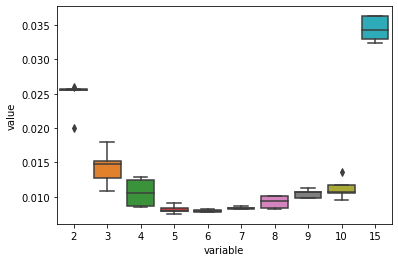

In [6]:
g = sns.boxplot(x='variable', y='value', data=df_melted) #6

In [7]:
dic = {}
#neuron number
for i in [3,4,8,16,32,64,128]:
    dic[i] = exp(6,5,i,100,2)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_50 (Bidirecti  (None, 6)                120       
 onal)                                                           
                                                                 
 dense_50 (Dense)            (None, 1)                 7         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.5038 - 3s/epoch - 532ms/step
Epoch 2/100
5/5 - 0s - loss: 1.4071 - 21ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 1.3143 - 21ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 1.2252 - 22ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 1.1405 - 24ms/epoch - 5ms/step
Epoch 6/100
5/5 - 0s - loss: 1.0591 - 23ms/epoch - 5ms/step
Epoch 7/100
5/5 - 0s - lo

Epoch 8/100
5/5 - 0s - loss: 0.7342 - 16ms/epoch - 3ms/step
Epoch 9/100
5/5 - 0s - loss: 0.6693 - 16ms/epoch - 3ms/step
Epoch 10/100
5/5 - 0s - loss: 0.6084 - 16ms/epoch - 3ms/step
Epoch 11/100
5/5 - 0s - loss: 0.5530 - 16ms/epoch - 3ms/step
Epoch 12/100
5/5 - 0s - loss: 0.5021 - 17ms/epoch - 3ms/step
Epoch 13/100
5/5 - 0s - loss: 0.4545 - 16ms/epoch - 3ms/step
Epoch 14/100
5/5 - 0s - loss: 0.4117 - 16ms/epoch - 3ms/step
Epoch 15/100
5/5 - 0s - loss: 0.3717 - 16ms/epoch - 3ms/step
Epoch 16/100
5/5 - 0s - loss: 0.3351 - 16ms/epoch - 3ms/step
Epoch 17/100
5/5 - 0s - loss: 0.3018 - 16ms/epoch - 3ms/step
Epoch 18/100
5/5 - 0s - loss: 0.2703 - 16ms/epoch - 3ms/step
Epoch 19/100
5/5 - 0s - loss: 0.2422 - 16ms/epoch - 3ms/step
Epoch 20/100
5/5 - 0s - loss: 0.2160 - 16ms/epoch - 3ms/step
Epoch 21/100
5/5 - 0s - loss: 0.1922 - 16ms/epoch - 3ms/step
Epoch 22/100
5/5 - 0s - loss: 0.1707 - 16ms/epoch - 3ms/step
Epoch 23/100
5/5 - 0s - loss: 0.1515 - 15ms/epoch - 3ms/step
Epoch 24/100
5/5 - 0s - lo

Epoch 27/100
5/5 - 0s - loss: 0.2055 - 20ms/epoch - 4ms/step
Epoch 28/100
5/5 - 0s - loss: 0.1694 - 20ms/epoch - 4ms/step
Epoch 29/100
5/5 - 0s - loss: 0.1373 - 19ms/epoch - 4ms/step
Epoch 30/100
5/5 - 0s - loss: 0.1099 - 18ms/epoch - 4ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0873 - 18ms/epoch - 4ms/step
Epoch 32/100
5/5 - 0s - loss: 0.0687 - 19ms/epoch - 4ms/step
Epoch 33/100
5/5 - 0s - loss: 0.0534 - 19ms/epoch - 4ms/step
Epoch 34/100
5/5 - 0s - loss: 0.0427 - 19ms/epoch - 4ms/step
Epoch 35/100
5/5 - 0s - loss: 0.0340 - 19ms/epoch - 4ms/step
Epoch 36/100
5/5 - 0s - loss: 0.0279 - 19ms/epoch - 4ms/step
Epoch 37/100
5/5 - 0s - loss: 0.0234 - 19ms/epoch - 4ms/step
Epoch 38/100
5/5 - 0s - loss: 0.0202 - 19ms/epoch - 4ms/step
Epoch 39/100
5/5 - 0s - loss: 0.0185 - 19ms/epoch - 4ms/step
Epoch 40/100
5/5 - 0s - loss: 0.0173 - 19ms/epoch - 4ms/step
Epoch 41/100
5/5 - 0s - loss: 0.0165 - 20ms/epoch - 4ms/step
Epoch 42/100
5/5 - 0s - loss: 0.0161 - 19ms/epoch - 4ms/step
Epoch 43/100
5/5 - 0s - 

Epoch 46/100
5/5 - 0s - loss: 0.0357 - 17ms/epoch - 3ms/step
Epoch 47/100
5/5 - 0s - loss: 0.0357 - 17ms/epoch - 3ms/step
Epoch 48/100
5/5 - 0s - loss: 0.0356 - 16ms/epoch - 3ms/step
Epoch 49/100
5/5 - 0s - loss: 0.0355 - 16ms/epoch - 3ms/step
Epoch 50/100
5/5 - 0s - loss: 0.0354 - 16ms/epoch - 3ms/step
Epoch 51/100
5/5 - 0s - loss: 0.0353 - 16ms/epoch - 3ms/step
Epoch 52/100
5/5 - 0s - loss: 0.0352 - 17ms/epoch - 3ms/step
Epoch 53/100
5/5 - 0s - loss: 0.0351 - 17ms/epoch - 3ms/step
Epoch 54/100
5/5 - 0s - loss: 0.0350 - 16ms/epoch - 3ms/step
Epoch 55/100
5/5 - 0s - loss: 0.0349 - 17ms/epoch - 3ms/step
Epoch 56/100
5/5 - 0s - loss: 0.0348 - 16ms/epoch - 3ms/step
Epoch 57/100
5/5 - 0s - loss: 0.0347 - 17ms/epoch - 3ms/step
Epoch 58/100
5/5 - 0s - loss: 0.0346 - 16ms/epoch - 3ms/step
Epoch 59/100
5/5 - 0s - loss: 0.0345 - 17ms/epoch - 3ms/step
Epoch 60/100
5/5 - 0s - loss: 0.0344 - 16ms/epoch - 3ms/step
Epoch 61/100
5/5 - 0s - loss: 0.0343 - 16ms/epoch - 3ms/step
Epoch 62/100
5/5 - 0s - 

Epoch 65/100
5/5 - 0s - loss: 0.0140 - 20ms/epoch - 4ms/step
Epoch 66/100
5/5 - 0s - loss: 0.0139 - 19ms/epoch - 4ms/step
Epoch 67/100
5/5 - 0s - loss: 0.0139 - 19ms/epoch - 4ms/step
Epoch 68/100
5/5 - 0s - loss: 0.0138 - 19ms/epoch - 4ms/step
Epoch 69/100
5/5 - 0s - loss: 0.0138 - 18ms/epoch - 4ms/step
Epoch 70/100
5/5 - 0s - loss: 0.0137 - 20ms/epoch - 4ms/step
Epoch 71/100
5/5 - 0s - loss: 0.0137 - 19ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 0.0137 - 18ms/epoch - 4ms/step
Epoch 73/100
5/5 - 0s - loss: 0.0136 - 19ms/epoch - 4ms/step
Epoch 74/100
5/5 - 0s - loss: 0.0136 - 19ms/epoch - 4ms/step
Epoch 75/100
5/5 - 0s - loss: 0.0135 - 19ms/epoch - 4ms/step
Epoch 76/100
5/5 - 0s - loss: 0.0135 - 20ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - loss: 0.0134 - 19ms/epoch - 4ms/step
Epoch 78/100
5/5 - 0s - loss: 0.0134 - 21ms/epoch - 4ms/step
Epoch 79/100
5/5 - 0s - loss: 0.0134 - 20ms/epoch - 4ms/step
Epoch 80/100
5/5 - 0s - loss: 0.0133 - 20ms/epoch - 4ms/step
Epoch 81/100
5/5 - 0s - 

Epoch 84/100
5/5 - 0s - loss: 0.0241 - 19ms/epoch - 4ms/step
Epoch 85/100
5/5 - 0s - loss: 0.0241 - 20ms/epoch - 4ms/step
Epoch 86/100
5/5 - 0s - loss: 0.0240 - 19ms/epoch - 4ms/step
Epoch 87/100
5/5 - 0s - loss: 0.0240 - 21ms/epoch - 4ms/step
Epoch 88/100
5/5 - 0s - loss: 0.0240 - 20ms/epoch - 4ms/step
Epoch 89/100
5/5 - 0s - loss: 0.0239 - 19ms/epoch - 4ms/step
Epoch 90/100
5/5 - 0s - loss: 0.0239 - 19ms/epoch - 4ms/step
Epoch 91/100
5/5 - 0s - loss: 0.0238 - 19ms/epoch - 4ms/step
Epoch 92/100
5/5 - 0s - loss: 0.0238 - 20ms/epoch - 4ms/step
Epoch 93/100
5/5 - 0s - loss: 0.0237 - 19ms/epoch - 4ms/step
Epoch 94/100
5/5 - 0s - loss: 0.0237 - 19ms/epoch - 4ms/step
Epoch 95/100
5/5 - 0s - loss: 0.0237 - 20ms/epoch - 4ms/step
Epoch 96/100
5/5 - 0s - loss: 0.0236 - 19ms/epoch - 4ms/step
Epoch 97/100
5/5 - 0s - loss: 0.0236 - 19ms/epoch - 4ms/step
Epoch 98/100
5/5 - 0s - loss: 0.0235 - 18ms/epoch - 4ms/step
Epoch 99/100
5/5 - 0s - loss: 0.0235 - 21ms/epoch - 4ms/step
Epoch 100/100
5/5 - 0s -

1/1 [==============================] - 0s 20ms/step - loss: 0.0263
Test Score: 0.0263 MSE (0.16204 RMSE)
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_57 (Bidirecti  (None, 8)                192       
 onal)                                                           
                                                                 
 dense_57 (Dense)            (None, 1)                 9         
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 3.8824 - 3s/epoch - 545ms/step
Epoch 2/100
5/5 - 0s - loss: 3.6878 - 20ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 3.4984 - 18ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 3.3140 - 19ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 3.1352 - 20

Epoch 6/100
5/5 - 0s - loss: 4.1716 - 20ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 4.0090 - 20ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 3.8465 - 19ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 3.6820 - 21ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 3.5150 - 18ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 3.3447 - 19ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 3.1708 - 19ms/epoch - 4ms/step
Epoch 13/100
5/5 - 0s - loss: 2.9946 - 19ms/epoch - 4ms/step
Epoch 14/100
5/5 - 0s - loss: 2.8139 - 19ms/epoch - 4ms/step
Epoch 15/100
5/5 - 0s - loss: 2.6298 - 19ms/epoch - 4ms/step
Epoch 16/100
5/5 - 0s - loss: 2.4437 - 20ms/epoch - 4ms/step
Epoch 17/100
5/5 - 0s - loss: 2.2576 - 19ms/epoch - 4ms/step
Epoch 18/100
5/5 - 0s - loss: 2.0705 - 19ms/epoch - 4ms/step
Epoch 19/100
5/5 - 0s - loss: 1.8866 - 20ms/epoch - 4ms/step
Epoch 20/100
5/5 - 0s - loss: 1.7073 - 21ms/epoch - 4ms/step
Epoch 21/100
5/5 - 0s - loss: 1.5321 - 19ms/epoch - 4ms/step
Epoch 22/100
5/5 - 0s - loss

Epoch 25/100
5/5 - 0s - loss: 0.1183 - 20ms/epoch - 4ms/step
Epoch 26/100
5/5 - 0s - loss: 0.1013 - 19ms/epoch - 4ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0872 - 19ms/epoch - 4ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0749 - 19ms/epoch - 4ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0647 - 20ms/epoch - 4ms/step
Epoch 30/100
5/5 - 0s - loss: 0.0562 - 19ms/epoch - 4ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0489 - 19ms/epoch - 4ms/step
Epoch 32/100
5/5 - 0s - loss: 0.0429 - 18ms/epoch - 4ms/step
Epoch 33/100
5/5 - 0s - loss: 0.0380 - 20ms/epoch - 4ms/step
Epoch 34/100
5/5 - 0s - loss: 0.0342 - 19ms/epoch - 4ms/step
Epoch 35/100
5/5 - 0s - loss: 0.0309 - 19ms/epoch - 4ms/step
Epoch 36/100
5/5 - 0s - loss: 0.0284 - 19ms/epoch - 4ms/step
Epoch 37/100
5/5 - 0s - loss: 0.0263 - 19ms/epoch - 4ms/step
Epoch 38/100
5/5 - 0s - loss: 0.0248 - 19ms/epoch - 4ms/step
Epoch 39/100
5/5 - 0s - loss: 0.0236 - 19ms/epoch - 4ms/step
Epoch 40/100
5/5 - 0s - loss: 0.0227 - 18ms/epoch - 4ms/step
Epoch 41/100
5/5 - 0s - 

Epoch 44/100
5/5 - 0s - loss: 0.0122 - 19ms/epoch - 4ms/step
Epoch 45/100
5/5 - 0s - loss: 0.0122 - 19ms/epoch - 4ms/step
Epoch 46/100
5/5 - 0s - loss: 0.0121 - 19ms/epoch - 4ms/step
Epoch 47/100
5/5 - 0s - loss: 0.0120 - 20ms/epoch - 4ms/step
Epoch 48/100
5/5 - 0s - loss: 0.0119 - 18ms/epoch - 4ms/step
Epoch 49/100
5/5 - 0s - loss: 0.0118 - 18ms/epoch - 4ms/step
Epoch 50/100
5/5 - 0s - loss: 0.0118 - 19ms/epoch - 4ms/step
Epoch 51/100
5/5 - 0s - loss: 0.0117 - 20ms/epoch - 4ms/step
Epoch 52/100
5/5 - 0s - loss: 0.0116 - 19ms/epoch - 4ms/step
Epoch 53/100
5/5 - 0s - loss: 0.0115 - 19ms/epoch - 4ms/step
Epoch 54/100
5/5 - 0s - loss: 0.0114 - 21ms/epoch - 4ms/step
Epoch 55/100
5/5 - 0s - loss: 0.0113 - 20ms/epoch - 4ms/step
Epoch 56/100
5/5 - 0s - loss: 0.0112 - 19ms/epoch - 4ms/step
Epoch 57/100
5/5 - 0s - loss: 0.0112 - 19ms/epoch - 4ms/step
Epoch 58/100
5/5 - 0s - loss: 0.0111 - 20ms/epoch - 4ms/step
Epoch 59/100
5/5 - 0s - loss: 0.0110 - 19ms/epoch - 4ms/step
Epoch 60/100
5/5 - 0s - 

Epoch 63/100
5/5 - 0s - loss: 0.0066 - 19ms/epoch - 4ms/step
Epoch 64/100
5/5 - 0s - loss: 0.0066 - 20ms/epoch - 4ms/step
Epoch 65/100
5/5 - 0s - loss: 0.0065 - 19ms/epoch - 4ms/step
Epoch 66/100
5/5 - 0s - loss: 0.0065 - 19ms/epoch - 4ms/step
Epoch 67/100
5/5 - 0s - loss: 0.0065 - 19ms/epoch - 4ms/step
Epoch 68/100
5/5 - 0s - loss: 0.0064 - 19ms/epoch - 4ms/step
Epoch 69/100
5/5 - 0s - loss: 0.0064 - 20ms/epoch - 4ms/step
Epoch 70/100
5/5 - 0s - loss: 0.0064 - 20ms/epoch - 4ms/step
Epoch 71/100
5/5 - 0s - loss: 0.0063 - 19ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 0.0063 - 19ms/epoch - 4ms/step
Epoch 73/100
5/5 - 0s - loss: 0.0063 - 20ms/epoch - 4ms/step
Epoch 74/100
5/5 - 0s - loss: 0.0062 - 20ms/epoch - 4ms/step
Epoch 75/100
5/5 - 0s - loss: 0.0062 - 19ms/epoch - 4ms/step
Epoch 76/100
5/5 - 0s - loss: 0.0062 - 19ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - loss: 0.0061 - 20ms/epoch - 4ms/step
Epoch 78/100
5/5 - 0s - loss: 0.0061 - 19ms/epoch - 4ms/step
Epoch 79/100
5/5 - 0s - 

Epoch 82/100
5/5 - 0s - loss: 0.0062 - 20ms/epoch - 4ms/step
Epoch 83/100
5/5 - 0s - loss: 0.0061 - 20ms/epoch - 4ms/step
Epoch 84/100
5/5 - 0s - loss: 0.0060 - 19ms/epoch - 4ms/step
Epoch 85/100
5/5 - 0s - loss: 0.0059 - 18ms/epoch - 4ms/step
Epoch 86/100
5/5 - 0s - loss: 0.0058 - 19ms/epoch - 4ms/step
Epoch 87/100
5/5 - 0s - loss: 0.0057 - 19ms/epoch - 4ms/step
Epoch 88/100
5/5 - 0s - loss: 0.0056 - 19ms/epoch - 4ms/step
Epoch 89/100
5/5 - 0s - loss: 0.0055 - 18ms/epoch - 4ms/step
Epoch 90/100
5/5 - 0s - loss: 0.0054 - 19ms/epoch - 4ms/step
Epoch 91/100
5/5 - 0s - loss: 0.0053 - 19ms/epoch - 4ms/step
Epoch 92/100
5/5 - 0s - loss: 0.0052 - 19ms/epoch - 4ms/step
Epoch 93/100
5/5 - 0s - loss: 0.0051 - 20ms/epoch - 4ms/step
Epoch 94/100
5/5 - 0s - loss: 0.0050 - 21ms/epoch - 4ms/step
Epoch 95/100
5/5 - 0s - loss: 0.0049 - 20ms/epoch - 4ms/step
Epoch 96/100
5/5 - 0s - loss: 0.0048 - 18ms/epoch - 4ms/step
Epoch 97/100
5/5 - 0s - loss: 0.0047 - 19ms/epoch - 4ms/step
Epoch 98/100
5/5 - 0s - 

5/5 [==============================] - 1s 2ms/step - loss: 0.0155
Train Score: 0.0155 MSE (0.12459 RMSE)
1/1 [==============================] - 0s 18ms/step - loss: 0.0362
Test Score: 0.0362 MSE (0.19034 RMSE)
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_64 (Bidirecti  (None, 16)               640       
 onal)                                                           
                                                                 
 dense_64 (Dense)            (None, 1)                 17        
                                                                 
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 2.6444 - 3s/epoch - 619ms/step
Epoch 2/100
5/5 - 0s - loss: 2.3627 - 18ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 2.0996 - 19ms/epoch - 4ms/

5/5 - 0s - loss: 3.0825 - 19ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 2.6437 - 20ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 2.2341 - 19ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 1.8616 - 21ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 1.5118 - 20ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 1.1922 - 20ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 0.9004 - 21ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 0.6440 - 20ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 0.4282 - 20ms/epoch - 4ms/step
Epoch 13/100
5/5 - 0s - loss: 0.2540 - 22ms/epoch - 4ms/step
Epoch 14/100
5/5 - 0s - loss: 0.1327 - 21ms/epoch - 4ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0580 - 19ms/epoch - 4ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0219 - 20ms/epoch - 4ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0131 - 20ms/epoch - 4ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0146 - 19ms/epoch - 4ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0175 - 19ms/epoch - 4ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0177 - 21m

Epoch 23/100
5/5 - 0s - loss: 0.0057 - 17ms/epoch - 3ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0056 - 20ms/epoch - 4ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0056 - 20ms/epoch - 4ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0055 - 21ms/epoch - 4ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0054 - 20ms/epoch - 4ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0054 - 19ms/epoch - 4ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0053 - 20ms/epoch - 4ms/step
Epoch 30/100
5/5 - 0s - loss: 0.0052 - 20ms/epoch - 4ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0052 - 19ms/epoch - 4ms/step
Epoch 32/100
5/5 - 0s - loss: 0.0051 - 19ms/epoch - 4ms/step
Epoch 33/100
5/5 - 0s - loss: 0.0051 - 20ms/epoch - 4ms/step
Epoch 34/100
5/5 - 0s - loss: 0.0050 - 20ms/epoch - 4ms/step
Epoch 35/100
5/5 - 0s - loss: 0.0049 - 19ms/epoch - 4ms/step
Epoch 36/100
5/5 - 0s - loss: 0.0049 - 21ms/epoch - 4ms/step
Epoch 37/100
5/5 - 0s - loss: 0.0048 - 20ms/epoch - 4ms/step
Epoch 38/100
5/5 - 0s - loss: 0.0047 - 20ms/epoch - 4ms/step
Epoch 39/100
5/5 - 0s - 

Epoch 42/100
5/5 - 0s - loss: 0.0054 - 17ms/epoch - 3ms/step
Epoch 43/100
5/5 - 0s - loss: 0.0053 - 20ms/epoch - 4ms/step
Epoch 44/100
5/5 - 0s - loss: 0.0053 - 19ms/epoch - 4ms/step
Epoch 45/100
5/5 - 0s - loss: 0.0052 - 21ms/epoch - 4ms/step
Epoch 46/100
5/5 - 0s - loss: 0.0052 - 20ms/epoch - 4ms/step
Epoch 47/100
5/5 - 0s - loss: 0.0051 - 20ms/epoch - 4ms/step
Epoch 48/100
5/5 - 0s - loss: 0.0051 - 20ms/epoch - 4ms/step
Epoch 49/100
5/5 - 0s - loss: 0.0050 - 20ms/epoch - 4ms/step
Epoch 50/100
5/5 - 0s - loss: 0.0050 - 20ms/epoch - 4ms/step
Epoch 51/100
5/5 - 0s - loss: 0.0049 - 19ms/epoch - 4ms/step
Epoch 52/100
5/5 - 0s - loss: 0.0049 - 20ms/epoch - 4ms/step
Epoch 53/100
5/5 - 0s - loss: 0.0049 - 20ms/epoch - 4ms/step
Epoch 54/100
5/5 - 0s - loss: 0.0048 - 19ms/epoch - 4ms/step
Epoch 55/100
5/5 - 0s - loss: 0.0047 - 18ms/epoch - 4ms/step
Epoch 56/100
5/5 - 0s - loss: 0.0047 - 20ms/epoch - 4ms/step
Epoch 57/100
5/5 - 0s - loss: 0.0047 - 20ms/epoch - 4ms/step
Epoch 58/100
5/5 - 0s - 

Epoch 61/100
5/5 - 0s - loss: 0.0038 - 21ms/epoch - 4ms/step
Epoch 62/100
5/5 - 0s - loss: 0.0038 - 20ms/epoch - 4ms/step
Epoch 63/100
5/5 - 0s - loss: 0.0038 - 19ms/epoch - 4ms/step
Epoch 64/100
5/5 - 0s - loss: 0.0037 - 19ms/epoch - 4ms/step
Epoch 65/100
5/5 - 0s - loss: 0.0037 - 21ms/epoch - 4ms/step
Epoch 66/100
5/5 - 0s - loss: 0.0036 - 19ms/epoch - 4ms/step
Epoch 67/100
5/5 - 0s - loss: 0.0036 - 19ms/epoch - 4ms/step
Epoch 68/100
5/5 - 0s - loss: 0.0035 - 21ms/epoch - 4ms/step
Epoch 69/100
5/5 - 0s - loss: 0.0035 - 20ms/epoch - 4ms/step
Epoch 70/100
5/5 - 0s - loss: 0.0035 - 19ms/epoch - 4ms/step
Epoch 71/100
5/5 - 0s - loss: 0.0034 - 19ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 0.0034 - 21ms/epoch - 4ms/step
Epoch 73/100
5/5 - 0s - loss: 0.0033 - 20ms/epoch - 4ms/step
Epoch 74/100
5/5 - 0s - loss: 0.0033 - 20ms/epoch - 4ms/step
Epoch 75/100
5/5 - 0s - loss: 0.0032 - 20ms/epoch - 4ms/step
Epoch 76/100
5/5 - 0s - loss: 0.0032 - 20ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - 

Epoch 80/100
5/5 - 0s - loss: 0.0058 - 21ms/epoch - 4ms/step
Epoch 81/100
5/5 - 0s - loss: 0.0057 - 20ms/epoch - 4ms/step
Epoch 82/100
5/5 - 0s - loss: 0.0056 - 20ms/epoch - 4ms/step
Epoch 83/100
5/5 - 0s - loss: 0.0056 - 20ms/epoch - 4ms/step
Epoch 84/100
5/5 - 0s - loss: 0.0055 - 20ms/epoch - 4ms/step
Epoch 85/100
5/5 - 0s - loss: 0.0054 - 19ms/epoch - 4ms/step
Epoch 86/100
5/5 - 0s - loss: 0.0053 - 20ms/epoch - 4ms/step
Epoch 87/100
5/5 - 0s - loss: 0.0052 - 21ms/epoch - 4ms/step
Epoch 88/100
5/5 - 0s - loss: 0.0051 - 19ms/epoch - 4ms/step
Epoch 89/100
5/5 - 0s - loss: 0.0050 - 19ms/epoch - 4ms/step
Epoch 90/100
5/5 - 0s - loss: 0.0049 - 18ms/epoch - 4ms/step
Epoch 91/100
5/5 - 0s - loss: 0.0048 - 20ms/epoch - 4ms/step
Epoch 92/100
5/5 - 0s - loss: 0.0047 - 20ms/epoch - 4ms/step
Epoch 93/100
5/5 - 0s - loss: 0.0047 - 20ms/epoch - 4ms/step
Epoch 94/100
5/5 - 0s - loss: 0.0046 - 19ms/epoch - 4ms/step
Epoch 95/100
5/5 - 0s - loss: 0.0045 - 20ms/epoch - 4ms/step
Epoch 96/100
5/5 - 0s - 

Epoch 96/100
5/5 - 0s - loss: 4.3230e-04 - 16ms/epoch - 3ms/step
Epoch 97/100
5/5 - 0s - loss: 4.1982e-04 - 16ms/epoch - 3ms/step
Epoch 98/100
5/5 - 0s - loss: 4.1118e-04 - 18ms/epoch - 4ms/step
Epoch 99/100
5/5 - 0s - loss: 4.1164e-04 - 18ms/epoch - 4ms/step
Epoch 100/100
5/5 - 0s - loss: 3.9811e-04 - 18ms/epoch - 4ms/step
5/5 [==============================] - 1s 2ms/step - loss: 3.9861e-04
Train Score: 0.0004 MSE (0.01997 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 1.4694e-04
Test Score: 0.0001 MSE (0.01212 RMSE)
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_71 (Bidirecti  (None, 64)               8704      
 onal)                                                           
                                                                 
 dense_71 (Dense)            (None, 1)                 65        
                                     

Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 3.0929 - 3s/epoch - 583ms/step
Epoch 2/100
5/5 - 0s - loss: 2.1588 - 19ms/epoch - 4ms/step
Epoch 3/100
5/5 - 0s - loss: 1.4092 - 19ms/epoch - 4ms/step
Epoch 4/100
5/5 - 0s - loss: 0.8163 - 20ms/epoch - 4ms/step
Epoch 5/100
5/5 - 0s - loss: 0.3771 - 19ms/epoch - 4ms/step
Epoch 6/100
5/5 - 0s - loss: 0.1109 - 18ms/epoch - 4ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0101 - 19ms/epoch - 4ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0257 - 19ms/epoch - 4ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0486 - 18ms/epoch - 4ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0344 - 18ms/epoch - 4ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0127 - 18ms/epoch - 4ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0049 - 18ms/epoch - 4ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0071 - 17ms/epoch - 3ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0086 - 18ms/epoch - 4ms/step
Epoch 15/100
5/5 - 0s

Epoch 18/100
5/5 - 0s - loss: 0.0040 - 18ms/epoch - 4ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0037 - 17ms/epoch - 3ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0037 - 18ms/epoch - 4ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0036 - 18ms/epoch - 4ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0036 - 18ms/epoch - 4ms/step
Epoch 23/100
5/5 - 0s - loss: 0.0035 - 17ms/epoch - 3ms/step
Epoch 24/100
5/5 - 0s - loss: 0.0035 - 17ms/epoch - 3ms/step
Epoch 25/100
5/5 - 0s - loss: 0.0034 - 19ms/epoch - 4ms/step
Epoch 26/100
5/5 - 0s - loss: 0.0034 - 17ms/epoch - 3ms/step
Epoch 27/100
5/5 - 0s - loss: 0.0033 - 18ms/epoch - 4ms/step
Epoch 28/100
5/5 - 0s - loss: 0.0033 - 19ms/epoch - 4ms/step
Epoch 29/100
5/5 - 0s - loss: 0.0033 - 17ms/epoch - 3ms/step
Epoch 30/100
5/5 - 0s - loss: 0.0032 - 17ms/epoch - 3ms/step
Epoch 31/100
5/5 - 0s - loss: 0.0032 - 19ms/epoch - 4ms/step
Epoch 32/100
5/5 - 0s - loss: 0.0031 - 19ms/epoch - 4ms/step
Epoch 33/100
5/5 - 0s - loss: 0.0031 - 20ms/epoch - 4ms/step
Epoch 34/100
5/5 - 0s - 

5/5 - 0s - loss: 0.0041 - 17ms/epoch - 3ms/step
Epoch 37/100
5/5 - 0s - loss: 0.0040 - 18ms/epoch - 4ms/step
Epoch 38/100
5/5 - 0s - loss: 0.0040 - 17ms/epoch - 3ms/step
Epoch 39/100
5/5 - 0s - loss: 0.0039 - 17ms/epoch - 3ms/step
Epoch 40/100
5/5 - 0s - loss: 0.0039 - 18ms/epoch - 4ms/step
Epoch 41/100
5/5 - 0s - loss: 0.0038 - 18ms/epoch - 4ms/step
Epoch 42/100
5/5 - 0s - loss: 0.0038 - 18ms/epoch - 4ms/step
Epoch 43/100
5/5 - 0s - loss: 0.0037 - 18ms/epoch - 4ms/step
Epoch 44/100
5/5 - 0s - loss: 0.0037 - 17ms/epoch - 3ms/step
Epoch 45/100
5/5 - 0s - loss: 0.0036 - 18ms/epoch - 4ms/step
Epoch 46/100
5/5 - 0s - loss: 0.0036 - 18ms/epoch - 4ms/step
Epoch 47/100
5/5 - 0s - loss: 0.0035 - 18ms/epoch - 4ms/step
Epoch 48/100
5/5 - 0s - loss: 0.0035 - 18ms/epoch - 4ms/step
Epoch 49/100
5/5 - 0s - loss: 0.0034 - 17ms/epoch - 3ms/step
Epoch 50/100
5/5 - 0s - loss: 0.0034 - 17ms/epoch - 3ms/step
Epoch 51/100
5/5 - 0s - loss: 0.0033 - 18ms/epoch - 4ms/step
Epoch 52/100
5/5 - 0s - loss: 0.0033 

Epoch 54/100
5/5 - 0s - loss: 7.5356e-04 - 23ms/epoch - 5ms/step
Epoch 55/100
5/5 - 0s - loss: 7.3503e-04 - 22ms/epoch - 4ms/step
Epoch 56/100
5/5 - 0s - loss: 7.2184e-04 - 22ms/epoch - 4ms/step
Epoch 57/100
5/5 - 0s - loss: 7.0782e-04 - 23ms/epoch - 5ms/step
Epoch 58/100
5/5 - 0s - loss: 6.9401e-04 - 23ms/epoch - 5ms/step
Epoch 59/100
5/5 - 0s - loss: 6.8378e-04 - 22ms/epoch - 4ms/step
Epoch 60/100
5/5 - 0s - loss: 6.6585e-04 - 23ms/epoch - 5ms/step
Epoch 61/100
5/5 - 0s - loss: 6.5501e-04 - 23ms/epoch - 5ms/step
Epoch 62/100
5/5 - 0s - loss: 6.4064e-04 - 22ms/epoch - 4ms/step
Epoch 63/100
5/5 - 0s - loss: 6.2938e-04 - 23ms/epoch - 5ms/step
Epoch 64/100
5/5 - 0s - loss: 6.1994e-04 - 22ms/epoch - 4ms/step
Epoch 65/100
5/5 - 0s - loss: 6.0377e-04 - 22ms/epoch - 4ms/step
Epoch 66/100
5/5 - 0s - loss: 5.9196e-04 - 22ms/epoch - 4ms/step
Epoch 67/100
5/5 - 0s - loss: 5.8056e-04 - 22ms/epoch - 4ms/step
Epoch 68/100
5/5 - 0s - loss: 5.8137e-04 - 23ms/epoch - 5ms/step
Epoch 69/100
5/5 - 0s - l

Epoch 68/100
5/5 - 0s - loss: 5.9330e-04 - 21ms/epoch - 4ms/step
Epoch 69/100
5/5 - 0s - loss: 5.8840e-04 - 21ms/epoch - 4ms/step
Epoch 70/100
5/5 - 0s - loss: 5.7017e-04 - 23ms/epoch - 5ms/step
Epoch 71/100
5/5 - 0s - loss: 5.6785e-04 - 22ms/epoch - 4ms/step
Epoch 72/100
5/5 - 0s - loss: 5.5477e-04 - 22ms/epoch - 4ms/step
Epoch 73/100
5/5 - 0s - loss: 5.3892e-04 - 22ms/epoch - 4ms/step
Epoch 74/100
5/5 - 0s - loss: 5.3419e-04 - 23ms/epoch - 5ms/step
Epoch 75/100
5/5 - 0s - loss: 5.1747e-04 - 22ms/epoch - 4ms/step
Epoch 76/100
5/5 - 0s - loss: 5.2134e-04 - 22ms/epoch - 4ms/step
Epoch 77/100
5/5 - 0s - loss: 5.0589e-04 - 21ms/epoch - 4ms/step
Epoch 78/100
5/5 - 0s - loss: 5.0114e-04 - 21ms/epoch - 4ms/step
Epoch 79/100
5/5 - 0s - loss: 4.8418e-04 - 22ms/epoch - 4ms/step
Epoch 80/100
5/5 - 0s - loss: 4.8472e-04 - 21ms/epoch - 4ms/step
Epoch 81/100
5/5 - 0s - loss: 4.8436e-04 - 22ms/epoch - 4ms/step
Epoch 82/100
5/5 - 0s - loss: 4.6612e-04 - 22ms/epoch - 4ms/step
Epoch 83/100
5/5 - 0s - l

5/5 - 0s - loss: 5.2470e-04 - 26ms/epoch - 5ms/step
Epoch 83/100
5/5 - 0s - loss: 5.1033e-04 - 26ms/epoch - 5ms/step
Epoch 84/100
5/5 - 0s - loss: 5.0304e-04 - 23ms/epoch - 5ms/step
Epoch 85/100
5/5 - 0s - loss: 4.9687e-04 - 23ms/epoch - 5ms/step
Epoch 86/100
5/5 - 0s - loss: 4.8652e-04 - 25ms/epoch - 5ms/step
Epoch 87/100
5/5 - 0s - loss: 4.7872e-04 - 25ms/epoch - 5ms/step
Epoch 88/100
5/5 - 0s - loss: 4.7182e-04 - 26ms/epoch - 5ms/step
Epoch 89/100
5/5 - 0s - loss: 4.6357e-04 - 27ms/epoch - 5ms/step
Epoch 90/100
5/5 - 0s - loss: 4.6336e-04 - 26ms/epoch - 5ms/step
Epoch 91/100
5/5 - 0s - loss: 4.4585e-04 - 26ms/epoch - 5ms/step
Epoch 92/100
5/5 - 0s - loss: 4.4737e-04 - 27ms/epoch - 5ms/step
Epoch 93/100
5/5 - 0s - loss: 4.3446e-04 - 24ms/epoch - 5ms/step
Epoch 94/100
5/5 - 0s - loss: 4.2725e-04 - 28ms/epoch - 6ms/step
Epoch 95/100
5/5 - 0s - loss: 4.2489e-04 - 28ms/epoch - 6ms/step
Epoch 96/100
5/5 - 0s - loss: 4.1372e-04 - 26ms/epoch - 5ms/step
Epoch 97/100
5/5 - 0s - loss: 4.1043e-

Epoch 96/100
5/5 - 0s - loss: 4.2384e-04 - 28ms/epoch - 6ms/step
Epoch 97/100
5/5 - 0s - loss: 4.1769e-04 - 29ms/epoch - 6ms/step
Epoch 98/100
5/5 - 0s - loss: 4.1178e-04 - 26ms/epoch - 5ms/step
Epoch 99/100
5/5 - 0s - loss: 4.1008e-04 - 28ms/epoch - 6ms/step
Epoch 100/100
5/5 - 0s - loss: 3.9917e-04 - 28ms/epoch - 6ms/step
5/5 [==============================] - 1s 3ms/step - loss: 3.9926e-04
Train Score: 0.0004 MSE (0.01998 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 1.7262e-04
Test Score: 0.0002 MSE (0.01314 RMSE)
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_79 (Bidirecti  (None, 128)              33792     
 onal)                                                           
                                                                 
 dense_79 (Dense)            (None, 1)                 129       
                                     

                                                                 
 dense_80 (Dense)            (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.7396 - 3s/epoch - 541ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2289 - 47ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1674 - 45ms/epoch - 9ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0928 - 46ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0129 - 46ms/epoch - 9ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0497 - 43ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0239 - 45ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0024 - 44ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0105 - 45ms/epoch - 9ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0046 - 44ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0018 - 45ms/epoch - 9ms/step
Ep

Epoch 8/100
5/5 - 0s - loss: 0.0028 - 42ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0095 - 42ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0066 - 39ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0014 - 40ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0034 - 44ms/epoch - 9ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0020 - 38ms/epoch - 8ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0012 - 40ms/epoch - 8ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0015 - 42ms/epoch - 8ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0012 - 39ms/epoch - 8ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0011 - 43ms/epoch - 9ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0010 - 38ms/epoch - 8ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0010 - 38ms/epoch - 8ms/step
Epoch 20/100
5/5 - 0s - loss: 9.7613e-04 - 40ms/epoch - 8ms/step
Epoch 21/100
5/5 - 0s - loss: 9.3869e-04 - 44ms/epoch - 9ms/step
Epoch 22/100
5/5 - 0s - loss: 9.3818e-04 - 46ms/epoch - 9ms/step
Epoch 23/100
5/5 - 0s - loss: 9.1425e-04 - 45ms/epoch - 9ms/step
Epoch 24/1

Epoch 21/100
5/5 - 0s - loss: 7.5354e-04 - 45ms/epoch - 9ms/step
Epoch 22/100
5/5 - 0s - loss: 7.2200e-04 - 46ms/epoch - 9ms/step
Epoch 23/100
5/5 - 0s - loss: 7.1931e-04 - 43ms/epoch - 9ms/step
Epoch 24/100
5/5 - 0s - loss: 7.0345e-04 - 45ms/epoch - 9ms/step
Epoch 25/100
5/5 - 0s - loss: 6.9665e-04 - 43ms/epoch - 9ms/step
Epoch 26/100
5/5 - 0s - loss: 6.8844e-04 - 43ms/epoch - 9ms/step
Epoch 27/100
5/5 - 0s - loss: 6.8563e-04 - 43ms/epoch - 9ms/step
Epoch 28/100
5/5 - 0s - loss: 6.6691e-04 - 45ms/epoch - 9ms/step
Epoch 29/100
5/5 - 0s - loss: 6.6502e-04 - 46ms/epoch - 9ms/step
Epoch 30/100
5/5 - 0s - loss: 6.5965e-04 - 43ms/epoch - 9ms/step
Epoch 31/100
5/5 - 0s - loss: 6.4679e-04 - 43ms/epoch - 9ms/step
Epoch 32/100
5/5 - 0s - loss: 6.3555e-04 - 47ms/epoch - 9ms/step
Epoch 33/100
5/5 - 0s - loss: 6.2738e-04 - 54ms/epoch - 11ms/step
Epoch 34/100
5/5 - 0s - loss: 6.1868e-04 - 60ms/epoch - 12ms/step
Epoch 35/100
5/5 - 0s - loss: 6.0917e-04 - 60ms/epoch - 12ms/step
Epoch 36/100
5/5 - 0s 

Epoch 33/100
5/5 - 0s - loss: 5.4830e-04 - 68ms/epoch - 14ms/step
Epoch 34/100
5/5 - 0s - loss: 5.5152e-04 - 42ms/epoch - 8ms/step
Epoch 35/100
5/5 - 0s - loss: 5.5532e-04 - 38ms/epoch - 8ms/step
Epoch 36/100
5/5 - 0s - loss: 5.2733e-04 - 34ms/epoch - 7ms/step
Epoch 37/100
5/5 - 0s - loss: 5.2174e-04 - 37ms/epoch - 7ms/step
Epoch 38/100
5/5 - 0s - loss: 5.1175e-04 - 37ms/epoch - 7ms/step
Epoch 39/100
5/5 - 0s - loss: 5.0627e-04 - 38ms/epoch - 8ms/step
Epoch 40/100
5/5 - 0s - loss: 4.9417e-04 - 39ms/epoch - 8ms/step
Epoch 41/100
5/5 - 0s - loss: 4.9561e-04 - 39ms/epoch - 8ms/step
Epoch 42/100
5/5 - 0s - loss: 4.8000e-04 - 44ms/epoch - 9ms/step
Epoch 43/100
5/5 - 0s - loss: 4.9509e-04 - 38ms/epoch - 8ms/step
Epoch 44/100
5/5 - 0s - loss: 4.6627e-04 - 41ms/epoch - 8ms/step
Epoch 45/100
5/5 - 0s - loss: 4.6833e-04 - 41ms/epoch - 8ms/step
Epoch 46/100
5/5 - 0s - loss: 4.5671e-04 - 39ms/epoch - 8ms/step
Epoch 47/100
5/5 - 0s - loss: 4.5789e-04 - 40ms/epoch - 8ms/step
Epoch 48/100
5/5 - 0s - 

Epoch 45/100
5/5 - 0s - loss: 5.4565e-04 - 57ms/epoch - 11ms/step
Epoch 46/100
5/5 - 0s - loss: 5.3699e-04 - 54ms/epoch - 11ms/step
Epoch 47/100
5/5 - 0s - loss: 5.2901e-04 - 55ms/epoch - 11ms/step
Epoch 48/100
5/5 - 0s - loss: 5.2144e-04 - 63ms/epoch - 13ms/step
Epoch 49/100
5/5 - 0s - loss: 5.1343e-04 - 63ms/epoch - 13ms/step
Epoch 50/100
5/5 - 0s - loss: 5.0330e-04 - 63ms/epoch - 13ms/step
Epoch 51/100
5/5 - 0s - loss: 4.9916e-04 - 56ms/epoch - 11ms/step
Epoch 52/100
5/5 - 0s - loss: 4.8679e-04 - 56ms/epoch - 11ms/step
Epoch 53/100
5/5 - 0s - loss: 4.8796e-04 - 55ms/epoch - 11ms/step
Epoch 54/100
5/5 - 0s - loss: 4.8344e-04 - 54ms/epoch - 11ms/step
Epoch 55/100
5/5 - 0s - loss: 4.7224e-04 - 53ms/epoch - 11ms/step
Epoch 56/100
5/5 - 0s - loss: 4.5947e-04 - 53ms/epoch - 11ms/step
Epoch 57/100
5/5 - 0s - loss: 4.5372e-04 - 54ms/epoch - 11ms/step
Epoch 58/100
5/5 - 0s - loss: 4.5014e-04 - 57ms/epoch - 11ms/step
Epoch 59/100
5/5 - 0s - loss: 4.3995e-04 - 54ms/epoch - 11ms/step
Epoch 60/1

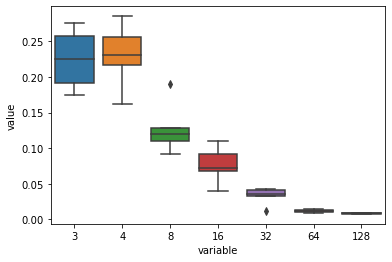

In [8]:
g = sns.boxplot(x='variable', y='value', data=df_melted) #128

In [9]:
#batch_size
dic = {}
for i in [1,2,3,4,5,6,7,8,9,10,15,20]:
    dic[i] = exp(6,5,128,100,i)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_85 (Bidirecti  (None, 256)              133120    
 onal)                                                           
                                                                 
 dense_85 (Dense)            (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.3278 - 3s/epoch - 527ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1114 - 46ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1910 - 42ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0380 - 40ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0269 - 41ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0458 - 44ms/epoch - 9ms/step
Epoch 7/100
5/5 -

Epoch 1/100
5/5 - 3s - loss: 1.9302 - 3s/epoch - 586ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2812 - 44ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1443 - 40ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1241 - 42ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0072 - 42ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0429 - 38ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0325 - 41ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0039 - 42ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0070 - 41ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0077 - 40ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0014 - 41ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0025 - 38ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0023 - 41ms/epoch - 8ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0011 - 39ms/epoch - 8ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0014 - 42ms/epoch - 8ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0011 - 41ms/epoch - 8ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0

Epoch 15/100
5/5 - 0s - loss: 0.0015 - 43ms/epoch - 9ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0011 - 46ms/epoch - 9ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0010 - 44ms/epoch - 9ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0010 - 44ms/epoch - 9ms/step
Epoch 19/100
5/5 - 0s - loss: 9.5874e-04 - 41ms/epoch - 8ms/step
Epoch 20/100
5/5 - 0s - loss: 9.8097e-04 - 45ms/epoch - 9ms/step
Epoch 21/100
5/5 - 0s - loss: 9.3047e-04 - 42ms/epoch - 8ms/step
Epoch 22/100
5/5 - 0s - loss: 9.0980e-04 - 36ms/epoch - 7ms/step
Epoch 23/100
5/5 - 0s - loss: 9.3163e-04 - 38ms/epoch - 8ms/step
Epoch 24/100
5/5 - 0s - loss: 8.9348e-04 - 37ms/epoch - 7ms/step
Epoch 25/100
5/5 - 0s - loss: 8.7835e-04 - 39ms/epoch - 8ms/step
Epoch 26/100
5/5 - 0s - loss: 8.6552e-04 - 38ms/epoch - 8ms/step
Epoch 27/100
5/5 - 0s - loss: 8.5024e-04 - 37ms/epoch - 7ms/step
Epoch 28/100
5/5 - 0s - loss: 8.3604e-04 - 37ms/epoch - 7ms/step
Epoch 29/100
5/5 - 0s - loss: 8.2453e-04 - 40ms/epoch - 8ms/step
Epoch 30/100
5/5 - 0s - loss: 8.1083e-04 

Epoch 27/100
5/5 - 0s - loss: 7.6886e-04 - 62ms/epoch - 12ms/step
Epoch 28/100
5/5 - 0s - loss: 7.4965e-04 - 60ms/epoch - 12ms/step
Epoch 29/100
5/5 - 0s - loss: 7.3658e-04 - 62ms/epoch - 12ms/step
Epoch 30/100
5/5 - 0s - loss: 7.2547e-04 - 62ms/epoch - 12ms/step
Epoch 31/100
5/5 - 0s - loss: 7.1585e-04 - 63ms/epoch - 13ms/step
Epoch 32/100
5/5 - 0s - loss: 7.0937e-04 - 60ms/epoch - 12ms/step
Epoch 33/100
5/5 - 0s - loss: 6.9163e-04 - 62ms/epoch - 12ms/step
Epoch 34/100
5/5 - 0s - loss: 6.7924e-04 - 60ms/epoch - 12ms/step
Epoch 35/100
5/5 - 0s - loss: 6.7171e-04 - 88ms/epoch - 18ms/step
Epoch 36/100
5/5 - 0s - loss: 6.6136e-04 - 63ms/epoch - 13ms/step
Epoch 37/100
5/5 - 0s - loss: 6.5294e-04 - 63ms/epoch - 13ms/step
Epoch 38/100
5/5 - 0s - loss: 6.4175e-04 - 62ms/epoch - 12ms/step
Epoch 39/100
5/5 - 0s - loss: 6.2819e-04 - 61ms/epoch - 12ms/step
Epoch 40/100
5/5 - 0s - loss: 6.2079e-04 - 62ms/epoch - 12ms/step
Epoch 41/100
5/5 - 0s - loss: 6.0955e-04 - 63ms/epoch - 13ms/step
Epoch 42/1

Epoch 38/100
5/5 - 0s - loss: 5.7947e-04 - 59ms/epoch - 12ms/step
Epoch 39/100
5/5 - 0s - loss: 5.6845e-04 - 57ms/epoch - 11ms/step
Epoch 40/100
5/5 - 0s - loss: 5.6008e-04 - 59ms/epoch - 12ms/step
Epoch 41/100
5/5 - 0s - loss: 5.5526e-04 - 56ms/epoch - 11ms/step
Epoch 42/100
5/5 - 0s - loss: 5.4834e-04 - 57ms/epoch - 11ms/step
Epoch 43/100
5/5 - 0s - loss: 5.4015e-04 - 56ms/epoch - 11ms/step
Epoch 44/100
5/5 - 0s - loss: 5.3366e-04 - 58ms/epoch - 12ms/step
Epoch 45/100
5/5 - 0s - loss: 5.3214e-04 - 57ms/epoch - 11ms/step
Epoch 46/100
5/5 - 0s - loss: 5.2527e-04 - 58ms/epoch - 12ms/step
Epoch 47/100
5/5 - 0s - loss: 5.0721e-04 - 56ms/epoch - 11ms/step
Epoch 48/100
5/5 - 0s - loss: 5.0343e-04 - 59ms/epoch - 12ms/step
Epoch 49/100
5/5 - 0s - loss: 4.9130e-04 - 56ms/epoch - 11ms/step
Epoch 50/100
5/5 - 0s - loss: 4.8819e-04 - 59ms/epoch - 12ms/step
Epoch 51/100
5/5 - 0s - loss: 4.8046e-04 - 56ms/epoch - 11ms/step
Epoch 52/100
5/5 - 0s - loss: 4.8349e-04 - 58ms/epoch - 12ms/step
Epoch 53/1

Epoch 49/100
5/5 - 0s - loss: 4.6421e-04 - 57ms/epoch - 11ms/step
Epoch 50/100
5/5 - 0s - loss: 4.5415e-04 - 58ms/epoch - 12ms/step
Epoch 51/100
5/5 - 0s - loss: 4.5179e-04 - 56ms/epoch - 11ms/step
Epoch 52/100
5/5 - 0s - loss: 4.3934e-04 - 59ms/epoch - 12ms/step
Epoch 53/100
5/5 - 0s - loss: 4.3840e-04 - 56ms/epoch - 11ms/step
Epoch 54/100
5/5 - 0s - loss: 4.2577e-04 - 59ms/epoch - 12ms/step
Epoch 55/100
5/5 - 0s - loss: 4.1662e-04 - 56ms/epoch - 11ms/step
Epoch 56/100
5/5 - 0s - loss: 4.1583e-04 - 58ms/epoch - 12ms/step
Epoch 57/100
5/5 - 0s - loss: 4.1346e-04 - 56ms/epoch - 11ms/step
Epoch 58/100
5/5 - 0s - loss: 4.1716e-04 - 58ms/epoch - 12ms/step
Epoch 59/100
5/5 - 0s - loss: 4.0501e-04 - 56ms/epoch - 11ms/step
Epoch 60/100
5/5 - 0s - loss: 3.8765e-04 - 58ms/epoch - 12ms/step
Epoch 61/100
5/5 - 0s - loss: 3.9199e-04 - 56ms/epoch - 11ms/step
Epoch 62/100
5/5 - 0s - loss: 3.7885e-04 - 58ms/epoch - 12ms/step
Epoch 63/100
5/5 - 0s - loss: 3.7467e-04 - 56ms/epoch - 11ms/step
Epoch 64/1

Epoch 60/100
5/5 - 0s - loss: 4.2965e-04 - 50ms/epoch - 10ms/step
Epoch 61/100
5/5 - 0s - loss: 4.1501e-04 - 48ms/epoch - 10ms/step
Epoch 62/100
5/5 - 0s - loss: 4.2468e-04 - 48ms/epoch - 10ms/step
Epoch 63/100
5/5 - 0s - loss: 4.2809e-04 - 51ms/epoch - 10ms/step
Epoch 64/100
5/5 - 0s - loss: 4.0264e-04 - 48ms/epoch - 10ms/step
Epoch 65/100
5/5 - 0s - loss: 3.9883e-04 - 50ms/epoch - 10ms/step
Epoch 66/100
5/5 - 0s - loss: 3.8857e-04 - 47ms/epoch - 9ms/step
Epoch 67/100
5/5 - 0s - loss: 3.8243e-04 - 51ms/epoch - 10ms/step
Epoch 68/100
5/5 - 0s - loss: 3.7742e-04 - 48ms/epoch - 10ms/step
Epoch 69/100
5/5 - 0s - loss: 3.7388e-04 - 48ms/epoch - 10ms/step
Epoch 70/100
5/5 - 0s - loss: 3.7047e-04 - 51ms/epoch - 10ms/step
Epoch 71/100
5/5 - 0s - loss: 3.6372e-04 - 46ms/epoch - 9ms/step
Epoch 72/100
5/5 - 0s - loss: 3.6302e-04 - 50ms/epoch - 10ms/step
Epoch 73/100
5/5 - 0s - loss: 3.5915e-04 - 48ms/epoch - 10ms/step
Epoch 74/100
5/5 - 0s - loss: 3.5402e-04 - 50ms/epoch - 10ms/step
Epoch 75/100

Epoch 71/100
5/5 - 0s - loss: 3.7072e-04 - 53ms/epoch - 11ms/step
Epoch 72/100
5/5 - 0s - loss: 3.6842e-04 - 53ms/epoch - 11ms/step
Epoch 73/100
5/5 - 0s - loss: 3.6775e-04 - 52ms/epoch - 10ms/step
Epoch 74/100
5/5 - 0s - loss: 3.5669e-04 - 52ms/epoch - 10ms/step
Epoch 75/100
5/5 - 0s - loss: 3.5485e-04 - 54ms/epoch - 11ms/step
Epoch 76/100
5/5 - 0s - loss: 3.5022e-04 - 52ms/epoch - 10ms/step
Epoch 77/100
5/5 - 0s - loss: 3.4734e-04 - 52ms/epoch - 10ms/step
Epoch 78/100
5/5 - 0s - loss: 3.4370e-04 - 53ms/epoch - 11ms/step
Epoch 79/100
5/5 - 0s - loss: 3.4055e-04 - 54ms/epoch - 11ms/step
Epoch 80/100
5/5 - 0s - loss: 3.4294e-04 - 53ms/epoch - 11ms/step
Epoch 81/100
5/5 - 0s - loss: 3.2924e-04 - 52ms/epoch - 10ms/step
Epoch 82/100
5/5 - 0s - loss: 3.3230e-04 - 52ms/epoch - 10ms/step
Epoch 83/100
5/5 - 0s - loss: 3.2859e-04 - 55ms/epoch - 11ms/step
Epoch 84/100
5/5 - 0s - loss: 3.2547e-04 - 53ms/epoch - 11ms/step
Epoch 85/100
5/5 - 0s - loss: 3.2110e-04 - 53ms/epoch - 11ms/step
Epoch 86/1

Epoch 83/100
5/5 - 0s - loss: 3.2461e-04 - 44ms/epoch - 9ms/step
Epoch 84/100
5/5 - 0s - loss: 3.2408e-04 - 43ms/epoch - 9ms/step
Epoch 85/100
5/5 - 0s - loss: 3.2616e-04 - 42ms/epoch - 8ms/step
Epoch 86/100
5/5 - 0s - loss: 3.2961e-04 - 44ms/epoch - 9ms/step
Epoch 87/100
5/5 - 0s - loss: 3.1330e-04 - 44ms/epoch - 9ms/step
Epoch 88/100
5/5 - 0s - loss: 3.2227e-04 - 42ms/epoch - 8ms/step
Epoch 89/100
5/5 - 0s - loss: 3.1296e-04 - 45ms/epoch - 9ms/step
Epoch 90/100
5/5 - 0s - loss: 3.0789e-04 - 45ms/epoch - 9ms/step
Epoch 91/100
5/5 - 0s - loss: 3.0462e-04 - 42ms/epoch - 8ms/step
Epoch 92/100
5/5 - 0s - loss: 3.0400e-04 - 42ms/epoch - 8ms/step
Epoch 93/100
5/5 - 0s - loss: 3.0830e-04 - 45ms/epoch - 9ms/step
Epoch 94/100
5/5 - 0s - loss: 3.0507e-04 - 42ms/epoch - 8ms/step
Epoch 95/100
5/5 - 0s - loss: 3.1083e-04 - 42ms/epoch - 8ms/step
Epoch 96/100
5/5 - 0s - loss: 2.9401e-04 - 44ms/epoch - 9ms/step
Epoch 97/100
5/5 - 0s - loss: 3.0375e-04 - 42ms/epoch - 8ms/step
Epoch 98/100
5/5 - 0s - l

Epoch 96/100
5/5 - 0s - loss: 3.2132e-04 - 46ms/epoch - 9ms/step
Epoch 97/100
5/5 - 0s - loss: 3.2607e-04 - 44ms/epoch - 9ms/step
Epoch 98/100
5/5 - 0s - loss: 3.2887e-04 - 41ms/epoch - 8ms/step
Epoch 99/100
5/5 - 0s - loss: 3.3377e-04 - 43ms/epoch - 9ms/step
Epoch 100/100
5/5 - 0s - loss: 3.2713e-04 - 43ms/epoch - 9ms/step
5/5 [==============================] - 1s 4ms/step - loss: 3.1361e-04
Train Score: 0.0003 MSE (0.01771 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 8.3818e-05
Test Score: 0.0001 MSE (0.00916 RMSE)
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_95 (Bidirecti  (None, 256)              133120    
 onal)                                                           
                                                                 
 dense_95 (Dense)            (None, 1)                 257       
                                     

 bidirectional_96 (Bidirecti  (None, 256)              133120    
 onal)                                                           
                                                                 
 dense_96 (Dense)            (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.2218 - 3s/epoch - 560ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0959 - 63ms/epoch - 13ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1834 - 60ms/epoch - 12ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0308 - 56ms/epoch - 11ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0282 - 56ms/epoch - 11ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0420 - 59ms/epoch - 12ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0077 - 56ms/epoch - 11ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0064 - 58ms/epoch - 12ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0092 - 55ms/ep

Epoch 4/100
5/5 - 0s - loss: 0.0766 - 60ms/epoch - 12ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0134 - 61ms/epoch - 12ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0455 - 82ms/epoch - 16ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0202 - 62ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0024 - 63ms/epoch - 13ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0099 - 62ms/epoch - 12ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0040 - 60ms/epoch - 12ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0015 - 62ms/epoch - 12ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0030 - 62ms/epoch - 12ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0011 - 61ms/epoch - 12ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0012 - 60ms/epoch - 12ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0012 - 62ms/epoch - 12ms/step
Epoch 16/100
5/5 - 0s - loss: 7.8912e-04 - 62ms/epoch - 12ms/step
Epoch 17/100
5/5 - 0s - loss: 9.1438e-04 - 61ms/epoch - 12ms/step
Epoch 18/100
5/5 - 0s - loss: 7.4950e-04 - 60ms/epoch - 12ms/step
Epoch 19/100
5/5 - 0s - loss: 7.5198e-04 - 63ms/epoch - 13ms/ste

5/5 - 0s - loss: 0.0016 - 57ms/epoch - 11ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0012 - 57ms/epoch - 11ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0012 - 59ms/epoch - 12ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0012 - 57ms/epoch - 11ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0011 - 60ms/epoch - 12ms/step
Epoch 20/100
5/5 - 0s - loss: 0.0011 - 58ms/epoch - 12ms/step
Epoch 21/100
5/5 - 0s - loss: 0.0010 - 60ms/epoch - 12ms/step
Epoch 22/100
5/5 - 0s - loss: 0.0010 - 60ms/epoch - 12ms/step
Epoch 23/100
5/5 - 0s - loss: 9.7602e-04 - 57ms/epoch - 11ms/step
Epoch 24/100
5/5 - 0s - loss: 9.7763e-04 - 60ms/epoch - 12ms/step
Epoch 25/100
5/5 - 0s - loss: 9.6333e-04 - 60ms/epoch - 12ms/step
Epoch 26/100
5/5 - 0s - loss: 9.3732e-04 - 57ms/epoch - 11ms/step
Epoch 27/100
5/5 - 0s - loss: 9.2044e-04 - 61ms/epoch - 12ms/step
Epoch 28/100
5/5 - 0s - loss: 9.0894e-04 - 57ms/epoch - 11ms/step
Epoch 29/100
5/5 - 0s - loss: 8.9059e-04 - 60ms/epoch - 12ms/step
Epoch 30/100
5/5 - 0s - loss: 8.7812e-04 - 59ms/epoch -

Epoch 27/100
5/5 - 0s - loss: 7.3445e-04 - 47ms/epoch - 9ms/step
Epoch 28/100
5/5 - 0s - loss: 7.1976e-04 - 45ms/epoch - 9ms/step
Epoch 29/100
5/5 - 0s - loss: 7.0560e-04 - 45ms/epoch - 9ms/step
Epoch 30/100
5/5 - 0s - loss: 7.0323e-04 - 44ms/epoch - 9ms/step
Epoch 31/100
5/5 - 0s - loss: 6.7704e-04 - 43ms/epoch - 9ms/step
Epoch 32/100
5/5 - 0s - loss: 6.8020e-04 - 45ms/epoch - 9ms/step
Epoch 33/100
5/5 - 0s - loss: 6.6425e-04 - 45ms/epoch - 9ms/step
Epoch 34/100
5/5 - 0s - loss: 6.4524e-04 - 44ms/epoch - 9ms/step
Epoch 35/100
5/5 - 0s - loss: 6.3308e-04 - 43ms/epoch - 9ms/step
Epoch 36/100
5/5 - 0s - loss: 6.2655e-04 - 46ms/epoch - 9ms/step
Epoch 37/100
5/5 - 0s - loss: 6.0794e-04 - 45ms/epoch - 9ms/step
Epoch 38/100
5/5 - 0s - loss: 5.9820e-04 - 43ms/epoch - 9ms/step
Epoch 39/100
5/5 - 0s - loss: 5.9298e-04 - 43ms/epoch - 9ms/step
Epoch 40/100
5/5 - 0s - loss: 5.8086e-04 - 45ms/epoch - 9ms/step
Epoch 41/100
5/5 - 0s - loss: 5.6617e-04 - 46ms/epoch - 9ms/step
Epoch 42/100
5/5 - 0s - l

5/5 - 0s - loss: 6.0990e-04 - 46ms/epoch - 9ms/step
Epoch 40/100
5/5 - 0s - loss: 6.0121e-04 - 47ms/epoch - 9ms/step
Epoch 41/100
5/5 - 0s - loss: 5.9951e-04 - 44ms/epoch - 9ms/step
Epoch 42/100
5/5 - 0s - loss: 5.8680e-04 - 45ms/epoch - 9ms/step
Epoch 43/100
5/5 - 0s - loss: 5.8674e-04 - 46ms/epoch - 9ms/step
Epoch 44/100
5/5 - 0s - loss: 5.6208e-04 - 46ms/epoch - 9ms/step
Epoch 45/100
5/5 - 0s - loss: 5.6426e-04 - 45ms/epoch - 9ms/step
Epoch 46/100
5/5 - 0s - loss: 5.4897e-04 - 43ms/epoch - 9ms/step
Epoch 47/100
5/5 - 0s - loss: 5.3681e-04 - 44ms/epoch - 9ms/step
Epoch 48/100
5/5 - 0s - loss: 5.2915e-04 - 47ms/epoch - 9ms/step
Epoch 49/100
5/5 - 0s - loss: 5.2101e-04 - 48ms/epoch - 10ms/step
Epoch 50/100
5/5 - 0s - loss: 5.1497e-04 - 45ms/epoch - 9ms/step
Epoch 51/100
5/5 - 0s - loss: 5.0472e-04 - 44ms/epoch - 9ms/step
Epoch 52/100
5/5 - 0s - loss: 4.9662e-04 - 44ms/epoch - 9ms/step
Epoch 53/100
5/5 - 0s - loss: 4.9213e-04 - 46ms/epoch - 9ms/step
Epoch 54/100
5/5 - 0s - loss: 4.8128e

Epoch 52/100
5/5 - 0s - loss: 6.5544e-04 - 49ms/epoch - 10ms/step
Epoch 53/100
5/5 - 0s - loss: 6.4635e-04 - 49ms/epoch - 10ms/step
Epoch 54/100
5/5 - 0s - loss: 6.2967e-04 - 48ms/epoch - 10ms/step
Epoch 55/100
5/5 - 0s - loss: 6.1627e-04 - 49ms/epoch - 10ms/step
Epoch 56/100
5/5 - 0s - loss: 6.0570e-04 - 46ms/epoch - 9ms/step
Epoch 57/100
5/5 - 0s - loss: 5.8906e-04 - 49ms/epoch - 10ms/step
Epoch 58/100
5/5 - 0s - loss: 5.7920e-04 - 50ms/epoch - 10ms/step
Epoch 59/100
5/5 - 0s - loss: 5.7018e-04 - 47ms/epoch - 9ms/step
Epoch 60/100
5/5 - 0s - loss: 5.6315e-04 - 49ms/epoch - 10ms/step
Epoch 61/100
5/5 - 0s - loss: 5.4597e-04 - 75ms/epoch - 15ms/step
Epoch 62/100
5/5 - 0s - loss: 5.3631e-04 - 49ms/epoch - 10ms/step
Epoch 63/100
5/5 - 0s - loss: 5.2637e-04 - 47ms/epoch - 9ms/step
Epoch 64/100
5/5 - 0s - loss: 5.1506e-04 - 46ms/epoch - 9ms/step
Epoch 65/100
5/5 - 0s - loss: 5.0690e-04 - 46ms/epoch - 9ms/step
Epoch 66/100
5/5 - 0s - loss: 5.0187e-04 - 47ms/epoch - 9ms/step
Epoch 67/100
5/5

Epoch 63/100
5/5 - 0s - loss: 4.3733e-04 - 58ms/epoch - 12ms/step
Epoch 64/100
5/5 - 0s - loss: 4.2832e-04 - 58ms/epoch - 12ms/step
Epoch 65/100
5/5 - 0s - loss: 4.2844e-04 - 60ms/epoch - 12ms/step
Epoch 66/100
5/5 - 0s - loss: 4.2129e-04 - 58ms/epoch - 12ms/step
Epoch 67/100
5/5 - 0s - loss: 4.0832e-04 - 61ms/epoch - 12ms/step
Epoch 68/100
5/5 - 0s - loss: 4.1227e-04 - 60ms/epoch - 12ms/step
Epoch 69/100
5/5 - 0s - loss: 4.0032e-04 - 57ms/epoch - 11ms/step
Epoch 70/100
5/5 - 0s - loss: 3.9826e-04 - 61ms/epoch - 12ms/step
Epoch 71/100
5/5 - 0s - loss: 3.9177e-04 - 57ms/epoch - 11ms/step
Epoch 72/100
5/5 - 0s - loss: 3.8810e-04 - 60ms/epoch - 12ms/step
Epoch 73/100
5/5 - 0s - loss: 3.7974e-04 - 60ms/epoch - 12ms/step
Epoch 74/100
5/5 - 0s - loss: 3.8056e-04 - 56ms/epoch - 11ms/step
Epoch 75/100
5/5 - 0s - loss: 3.8769e-04 - 60ms/epoch - 12ms/step
Epoch 76/100
5/5 - 0s - loss: 3.6801e-04 - 60ms/epoch - 12ms/step
Epoch 77/100
5/5 - 0s - loss: 3.6618e-04 - 57ms/epoch - 11ms/step
Epoch 78/1

Epoch 74/100
5/5 - 0s - loss: 4.1049e-04 - 49ms/epoch - 10ms/step
Epoch 75/100
5/5 - 0s - loss: 3.9729e-04 - 50ms/epoch - 10ms/step
Epoch 76/100
5/5 - 0s - loss: 3.9842e-04 - 50ms/epoch - 10ms/step
Epoch 77/100
5/5 - 0s - loss: 3.9381e-04 - 49ms/epoch - 10ms/step
Epoch 78/100
5/5 - 0s - loss: 3.8306e-04 - 52ms/epoch - 10ms/step
Epoch 79/100
5/5 - 0s - loss: 3.8316e-04 - 49ms/epoch - 10ms/step
Epoch 80/100
5/5 - 0s - loss: 3.8647e-04 - 49ms/epoch - 10ms/step
Epoch 81/100
5/5 - 0s - loss: 3.7064e-04 - 50ms/epoch - 10ms/step
Epoch 82/100
5/5 - 0s - loss: 3.7200e-04 - 50ms/epoch - 10ms/step
Epoch 83/100
5/5 - 0s - loss: 3.6132e-04 - 50ms/epoch - 10ms/step
Epoch 84/100
5/5 - 0s - loss: 3.6316e-04 - 49ms/epoch - 10ms/step
Epoch 85/100
5/5 - 0s - loss: 3.4975e-04 - 50ms/epoch - 10ms/step
Epoch 86/100
5/5 - 0s - loss: 3.5376e-04 - 49ms/epoch - 10ms/step
Epoch 87/100
5/5 - 0s - loss: 3.4796e-04 - 50ms/epoch - 10ms/step
Epoch 88/100
5/5 - 0s - loss: 3.4580e-04 - 51ms/epoch - 10ms/step
Epoch 89/1

Epoch 85/100
5/5 - 0s - loss: 3.1429e-04 - 56ms/epoch - 11ms/step
Epoch 86/100
5/5 - 0s - loss: 3.1707e-04 - 59ms/epoch - 12ms/step
Epoch 87/100
5/5 - 0s - loss: 3.1217e-04 - 58ms/epoch - 12ms/step
Epoch 88/100
5/5 - 0s - loss: 3.1029e-04 - 56ms/epoch - 11ms/step
Epoch 89/100
5/5 - 0s - loss: 3.0952e-04 - 59ms/epoch - 12ms/step
Epoch 90/100
5/5 - 0s - loss: 3.0720e-04 - 57ms/epoch - 11ms/step
Epoch 91/100
5/5 - 0s - loss: 3.0215e-04 - 58ms/epoch - 12ms/step
Epoch 92/100
5/5 - 0s - loss: 2.9938e-04 - 56ms/epoch - 11ms/step
Epoch 93/100
5/5 - 0s - loss: 3.0667e-04 - 59ms/epoch - 12ms/step
Epoch 94/100
5/5 - 0s - loss: 2.9802e-04 - 56ms/epoch - 11ms/step
Epoch 95/100
5/5 - 0s - loss: 3.0399e-04 - 59ms/epoch - 12ms/step
Epoch 96/100
5/5 - 0s - loss: 2.9873e-04 - 56ms/epoch - 11ms/step
Epoch 97/100
5/5 - 0s - loss: 2.8741e-04 - 59ms/epoch - 12ms/step
Epoch 98/100
5/5 - 0s - loss: 2.9208e-04 - 56ms/epoch - 11ms/step
Epoch 99/100
5/5 - 0s - loss: 2.8465e-04 - 59ms/epoch - 12ms/step
Epoch 100/

Epoch 97/100
5/5 - 0s - loss: 2.9778e-04 - 44ms/epoch - 9ms/step
Epoch 98/100
5/5 - 0s - loss: 2.9916e-04 - 44ms/epoch - 9ms/step
Epoch 99/100
5/5 - 0s - loss: 2.9612e-04 - 41ms/epoch - 8ms/step
Epoch 100/100
5/5 - 0s - loss: 2.9445e-04 - 44ms/epoch - 9ms/step
5/5 [==============================] - 1s 5ms/step - loss: 2.9228e-04
Train Score: 0.0003 MSE (0.01710 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 6.5520e-05
Test Score: 0.0001 MSE (0.00809 RMSE)
Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_106 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_106 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable par

                                                                 
 dense_107 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.6471 - 3s/epoch - 650ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2122 - 52ms/epoch - 10ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1644 - 48ms/epoch - 10ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0909 - 48ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0108 - 48ms/epoch - 10ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0461 - 48ms/epoch - 10ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0252 - 48ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0025 - 47ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0094 - 50ms/epoch - 10ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0056 - 47ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0012 - 50ms/epoch - 10ms

5/5 - 0s - loss: 0.0445 - 59ms/epoch - 12ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0115 - 57ms/epoch - 11ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0049 - 57ms/epoch - 11ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0100 - 60ms/epoch - 12ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0018 - 57ms/epoch - 11ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0028 - 59ms/epoch - 12ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0026 - 57ms/epoch - 11ms/step
Epoch 13/100
5/5 - 0s - loss: 9.9319e-04 - 60ms/epoch - 12ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0015 - 57ms/epoch - 11ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0010 - 60ms/epoch - 12ms/step
Epoch 16/100
5/5 - 0s - loss: 9.1221e-04 - 59ms/epoch - 12ms/step
Epoch 17/100
5/5 - 0s - loss: 9.1578e-04 - 57ms/epoch - 11ms/step
Epoch 18/100
5/5 - 0s - loss: 8.0587e-04 - 58ms/epoch - 12ms/step
Epoch 19/100
5/5 - 0s - loss: 8.4143e-04 - 56ms/epoch - 11ms/step
Epoch 20/100
5/5 - 0s - loss: 7.7214e-04 - 59ms/epoch - 12ms/step
Epoch 21/100
5/5 - 0s - loss: 7.8755e-04 - 56ms/epoch - 11ms/s

Epoch 18/100
5/5 - 0s - loss: 9.8090e-04 - 58ms/epoch - 12ms/step
Epoch 19/100
5/5 - 0s - loss: 9.1774e-04 - 60ms/epoch - 12ms/step
Epoch 20/100
5/5 - 0s - loss: 9.2584e-04 - 58ms/epoch - 12ms/step
Epoch 21/100
5/5 - 0s - loss: 8.9486e-04 - 57ms/epoch - 11ms/step
Epoch 22/100
5/5 - 0s - loss: 8.7650e-04 - 58ms/epoch - 12ms/step
Epoch 23/100
5/5 - 0s - loss: 8.5979e-04 - 57ms/epoch - 11ms/step
Epoch 24/100
5/5 - 0s - loss: 8.4822e-04 - 57ms/epoch - 11ms/step
Epoch 25/100
5/5 - 0s - loss: 8.3575e-04 - 56ms/epoch - 11ms/step
Epoch 26/100
5/5 - 0s - loss: 8.3304e-04 - 58ms/epoch - 12ms/step
Epoch 27/100
5/5 - 0s - loss: 8.1018e-04 - 56ms/epoch - 11ms/step
Epoch 28/100
5/5 - 0s - loss: 8.0988e-04 - 59ms/epoch - 12ms/step
Epoch 29/100
5/5 - 0s - loss: 7.8489e-04 - 91ms/epoch - 18ms/step
Epoch 30/100
5/5 - 0s - loss: 7.7445e-04 - 56ms/epoch - 11ms/step
Epoch 31/100
5/5 - 0s - loss: 7.5857e-04 - 57ms/epoch - 11ms/step
Epoch 32/100
5/5 - 0s - loss: 7.6044e-04 - 56ms/epoch - 11ms/step
Epoch 33/1

Epoch 29/100
5/5 - 0s - loss: 7.6271e-04 - 62ms/epoch - 12ms/step
Epoch 30/100
5/5 - 0s - loss: 7.4872e-04 - 59ms/epoch - 12ms/step
Epoch 31/100
5/5 - 0s - loss: 7.3536e-04 - 58ms/epoch - 12ms/step
Epoch 32/100
5/5 - 0s - loss: 7.3393e-04 - 61ms/epoch - 12ms/step
Epoch 33/100
5/5 - 0s - loss: 7.1776e-04 - 60ms/epoch - 12ms/step
Epoch 34/100
5/5 - 0s - loss: 7.2208e-04 - 65ms/epoch - 13ms/step
Epoch 35/100
5/5 - 0s - loss: 7.0075e-04 - 66ms/epoch - 13ms/step
Epoch 36/100
5/5 - 0s - loss: 6.8568e-04 - 58ms/epoch - 12ms/step
Epoch 37/100
5/5 - 0s - loss: 6.6795e-04 - 60ms/epoch - 12ms/step
Epoch 38/100
5/5 - 0s - loss: 6.5539e-04 - 58ms/epoch - 12ms/step
Epoch 39/100
5/5 - 0s - loss: 6.5887e-04 - 58ms/epoch - 12ms/step
Epoch 40/100
5/5 - 0s - loss: 6.4317e-04 - 60ms/epoch - 12ms/step
Epoch 41/100
5/5 - 0s - loss: 6.2455e-04 - 60ms/epoch - 12ms/step
Epoch 42/100
5/5 - 0s - loss: 6.1610e-04 - 58ms/epoch - 12ms/step
Epoch 43/100
5/5 - 0s - loss: 6.0453e-04 - 61ms/epoch - 12ms/step
Epoch 44/1

Epoch 40/100
5/5 - 0s - loss: 6.0099e-04 - 48ms/epoch - 10ms/step
Epoch 41/100
5/5 - 0s - loss: 5.8864e-04 - 46ms/epoch - 9ms/step
Epoch 42/100
5/5 - 0s - loss: 5.8409e-04 - 43ms/epoch - 9ms/step
Epoch 43/100
5/5 - 0s - loss: 5.7723e-04 - 46ms/epoch - 9ms/step
Epoch 44/100
5/5 - 0s - loss: 5.6134e-04 - 46ms/epoch - 9ms/step
Epoch 45/100
5/5 - 0s - loss: 5.5283e-04 - 46ms/epoch - 9ms/step
Epoch 46/100
5/5 - 0s - loss: 5.4590e-04 - 44ms/epoch - 9ms/step
Epoch 47/100
5/5 - 0s - loss: 5.3308e-04 - 43ms/epoch - 9ms/step
Epoch 48/100
5/5 - 0s - loss: 5.2461e-04 - 46ms/epoch - 9ms/step
Epoch 49/100
5/5 - 0s - loss: 5.1967e-04 - 45ms/epoch - 9ms/step
Epoch 50/100
5/5 - 0s - loss: 5.0795e-04 - 46ms/epoch - 9ms/step
Epoch 51/100
5/5 - 0s - loss: 5.0143e-04 - 44ms/epoch - 9ms/step
Epoch 52/100
5/5 - 0s - loss: 4.9165e-04 - 44ms/epoch - 9ms/step
Epoch 53/100
5/5 - 0s - loss: 4.8565e-04 - 46ms/epoch - 9ms/step
Epoch 54/100
5/5 - 0s - loss: 4.7527e-04 - 46ms/epoch - 9ms/step
Epoch 55/100
5/5 - 0s - 

5/5 - 0s - loss: 4.9628e-04 - 43ms/epoch - 9ms/step
Epoch 53/100
5/5 - 0s - loss: 4.9742e-04 - 46ms/epoch - 9ms/step
Epoch 54/100
5/5 - 0s - loss: 4.8448e-04 - 44ms/epoch - 9ms/step
Epoch 55/100
5/5 - 0s - loss: 4.7949e-04 - 44ms/epoch - 9ms/step
Epoch 56/100
5/5 - 0s - loss: 4.6932e-04 - 46ms/epoch - 9ms/step
Epoch 57/100
5/5 - 0s - loss: 4.6230e-04 - 46ms/epoch - 9ms/step
Epoch 58/100
5/5 - 0s - loss: 4.6481e-04 - 47ms/epoch - 9ms/step
Epoch 59/100
5/5 - 0s - loss: 4.5445e-04 - 45ms/epoch - 9ms/step
Epoch 60/100
5/5 - 0s - loss: 4.4416e-04 - 44ms/epoch - 9ms/step
Epoch 61/100
5/5 - 0s - loss: 4.4395e-04 - 46ms/epoch - 9ms/step
Epoch 62/100
5/5 - 0s - loss: 4.3904e-04 - 46ms/epoch - 9ms/step
Epoch 63/100
5/5 - 0s - loss: 4.3400e-04 - 46ms/epoch - 9ms/step
Epoch 64/100
5/5 - 0s - loss: 4.2670e-04 - 44ms/epoch - 9ms/step
Epoch 65/100
5/5 - 0s - loss: 4.2000e-04 - 43ms/epoch - 9ms/step
Epoch 66/100
5/5 - 0s - loss: 4.0732e-04 - 46ms/epoch - 9ms/step
Epoch 67/100
5/5 - 0s - loss: 4.0257e-

Epoch 64/100
5/5 - 0s - loss: 4.1719e-04 - 52ms/epoch - 10ms/step
Epoch 65/100
5/5 - 0s - loss: 4.1325e-04 - 52ms/epoch - 10ms/step
Epoch 66/100
5/5 - 0s - loss: 4.0954e-04 - 48ms/epoch - 10ms/step
Epoch 67/100
5/5 - 0s - loss: 4.0674e-04 - 76ms/epoch - 15ms/step
Epoch 68/100
5/5 - 0s - loss: 3.9799e-04 - 52ms/epoch - 10ms/step
Epoch 69/100
5/5 - 0s - loss: 3.9480e-04 - 50ms/epoch - 10ms/step
Epoch 70/100
5/5 - 0s - loss: 3.8407e-04 - 51ms/epoch - 10ms/step
Epoch 71/100
5/5 - 0s - loss: 3.8536e-04 - 54ms/epoch - 11ms/step
Epoch 72/100
5/5 - 0s - loss: 3.7860e-04 - 51ms/epoch - 10ms/step
Epoch 73/100
5/5 - 0s - loss: 3.7130e-04 - 50ms/epoch - 10ms/step
Epoch 74/100
5/5 - 0s - loss: 3.6559e-04 - 50ms/epoch - 10ms/step
Epoch 75/100
5/5 - 0s - loss: 3.6373e-04 - 49ms/epoch - 10ms/step
Epoch 76/100
5/5 - 0s - loss: 3.5775e-04 - 52ms/epoch - 10ms/step
Epoch 77/100
5/5 - 0s - loss: 3.5537e-04 - 51ms/epoch - 10ms/step
Epoch 78/100
5/5 - 0s - loss: 3.5153e-04 - 52ms/epoch - 10ms/step
Epoch 79/1

Epoch 75/100
5/5 - 0s - loss: 3.4997e-04 - 57ms/epoch - 11ms/step
Epoch 76/100
5/5 - 0s - loss: 3.6356e-04 - 54ms/epoch - 11ms/step
Epoch 77/100
5/5 - 0s - loss: 3.4110e-04 - 55ms/epoch - 11ms/step
Epoch 78/100
5/5 - 0s - loss: 3.5188e-04 - 56ms/epoch - 11ms/step
Epoch 79/100
5/5 - 0s - loss: 3.3982e-04 - 54ms/epoch - 11ms/step
Epoch 80/100
5/5 - 0s - loss: 3.3295e-04 - 56ms/epoch - 11ms/step
Epoch 81/100
5/5 - 0s - loss: 3.3274e-04 - 55ms/epoch - 11ms/step
Epoch 82/100
5/5 - 0s - loss: 3.2453e-04 - 54ms/epoch - 11ms/step
Epoch 83/100
5/5 - 0s - loss: 3.2725e-04 - 57ms/epoch - 11ms/step
Epoch 84/100
5/5 - 0s - loss: 3.2518e-04 - 53ms/epoch - 11ms/step
Epoch 85/100
5/5 - 0s - loss: 3.1655e-04 - 54ms/epoch - 11ms/step
Epoch 86/100
5/5 - 0s - loss: 3.2463e-04 - 57ms/epoch - 11ms/step
Epoch 87/100
5/5 - 0s - loss: 3.2188e-04 - 54ms/epoch - 11ms/step
Epoch 88/100
5/5 - 0s - loss: 3.1082e-04 - 57ms/epoch - 11ms/step
Epoch 89/100
5/5 - 0s - loss: 3.1819e-04 - 55ms/epoch - 11ms/step
Epoch 90/1

Epoch 86/100
5/5 - 0s - loss: 3.1019e-04 - 51ms/epoch - 10ms/step
Epoch 87/100
5/5 - 0s - loss: 3.0956e-04 - 50ms/epoch - 10ms/step
Epoch 88/100
5/5 - 0s - loss: 3.0707e-04 - 50ms/epoch - 10ms/step
Epoch 89/100
5/5 - 0s - loss: 3.0935e-04 - 52ms/epoch - 10ms/step
Epoch 90/100
5/5 - 0s - loss: 2.9909e-04 - 50ms/epoch - 10ms/step
Epoch 91/100
5/5 - 0s - loss: 3.0839e-04 - 51ms/epoch - 10ms/step
Epoch 92/100
5/5 - 0s - loss: 2.9737e-04 - 50ms/epoch - 10ms/step
Epoch 93/100
5/5 - 0s - loss: 2.9335e-04 - 50ms/epoch - 10ms/step
Epoch 94/100
5/5 - 0s - loss: 2.9572e-04 - 51ms/epoch - 10ms/step
Epoch 95/100
5/5 - 0s - loss: 2.9858e-04 - 50ms/epoch - 10ms/step
Epoch 96/100
5/5 - 0s - loss: 2.9192e-04 - 50ms/epoch - 10ms/step
Epoch 97/100
5/5 - 0s - loss: 2.9546e-04 - 49ms/epoch - 10ms/step
Epoch 98/100
5/5 - 0s - loss: 2.8756e-04 - 50ms/epoch - 10ms/step
Epoch 99/100
5/5 - 0s - loss: 2.8673e-04 - 50ms/epoch - 10ms/step
Epoch 100/100
5/5 - 0s - loss: 2.9277e-04 - 52ms/epoch - 10ms/step
5/5 [====

Epoch 97/100
5/5 - 0s - loss: 2.9717e-04 - 61ms/epoch - 12ms/step
Epoch 98/100
5/5 - 0s - loss: 2.9000e-04 - 64ms/epoch - 13ms/step
Epoch 99/100
5/5 - 0s - loss: 2.8864e-04 - 63ms/epoch - 13ms/step
Epoch 100/100
5/5 - 0s - loss: 2.8408e-04 - 63ms/epoch - 13ms/step
5/5 [==============================] - 1s 6ms/step - loss: 2.8778e-04
Train Score: 0.0003 MSE (0.01696 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 6.8547e-05
Test Score: 0.0001 MSE (0.00828 RMSE)
Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_117 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_117 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable

 bidirectional_118 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_118 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.9682 - 3s/epoch - 568ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2862 - 55ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1511 - 48ms/epoch - 10ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1221 - 48ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0066 - 49ms/epoch - 10ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0430 - 47ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0325 - 47ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0042 - 49ms/epoch - 10ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0069 - 50ms/epoc

Epoch 4/100
5/5 - 0s - loss: 0.0897 - 155ms/epoch - 31ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0121 - 152ms/epoch - 30ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0447 - 152ms/epoch - 30ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0220 - 152ms/epoch - 30ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0022 - 149ms/epoch - 30ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0097 - 149ms/epoch - 30ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0046 - 152ms/epoch - 30ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0015 - 152ms/epoch - 30ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0030 - 152ms/epoch - 30ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0012 - 157ms/epoch - 31ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0011 - 150ms/epoch - 30ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0012 - 152ms/epoch - 30ms/step
Epoch 16/100
5/5 - 0s - loss: 7.8999e-04 - 150ms/epoch - 30ms/step
Epoch 17/100
5/5 - 0s - loss: 9.0166e-04 - 151ms/epoch - 30ms/step
Epoch 18/100
5/5 - 0s - loss: 7.9859e-04 - 101ms/epoch - 20ms/step
Epoch 19/100
5/5 - 0s - loss: 7.8016e-04 - 48ms/e

Epoch 16/100
5/5 - 0s - loss: 9.7356e-04 - 55ms/epoch - 11ms/step
Epoch 17/100
5/5 - 0s - loss: 7.7960e-04 - 53ms/epoch - 11ms/step
Epoch 18/100
5/5 - 0s - loss: 7.3729e-04 - 54ms/epoch - 11ms/step
Epoch 19/100
5/5 - 0s - loss: 7.2138e-04 - 55ms/epoch - 11ms/step
Epoch 20/100
5/5 - 0s - loss: 6.8799e-04 - 54ms/epoch - 11ms/step
Epoch 21/100
5/5 - 0s - loss: 6.8410e-04 - 54ms/epoch - 11ms/step
Epoch 22/100
5/5 - 0s - loss: 6.7224e-04 - 55ms/epoch - 11ms/step
Epoch 23/100
5/5 - 0s - loss: 6.6028e-04 - 52ms/epoch - 10ms/step
Epoch 24/100
5/5 - 0s - loss: 6.4698e-04 - 52ms/epoch - 10ms/step
Epoch 25/100
5/5 - 0s - loss: 6.4068e-04 - 52ms/epoch - 10ms/step
Epoch 26/100
5/5 - 0s - loss: 6.3761e-04 - 55ms/epoch - 11ms/step
Epoch 27/100
5/5 - 0s - loss: 6.2508e-04 - 53ms/epoch - 11ms/step
Epoch 28/100
5/5 - 0s - loss: 6.1081e-04 - 53ms/epoch - 11ms/step
Epoch 29/100
5/5 - 0s - loss: 5.9781e-04 - 55ms/epoch - 11ms/step
Epoch 30/100
5/5 - 0s - loss: 5.9774e-04 - 53ms/epoch - 11ms/step
Epoch 31/1

Epoch 27/100
5/5 - 0s - loss: 7.4857e-04 - 47ms/epoch - 9ms/step
Epoch 28/100
5/5 - 0s - loss: 7.4205e-04 - 50ms/epoch - 10ms/step
Epoch 29/100
5/5 - 0s - loss: 7.2896e-04 - 50ms/epoch - 10ms/step
Epoch 30/100
5/5 - 0s - loss: 7.1681e-04 - 48ms/epoch - 10ms/step
Epoch 31/100
5/5 - 0s - loss: 7.0619e-04 - 49ms/epoch - 10ms/step
Epoch 32/100
5/5 - 0s - loss: 6.9377e-04 - 47ms/epoch - 9ms/step
Epoch 33/100
5/5 - 0s - loss: 6.8358e-04 - 50ms/epoch - 10ms/step
Epoch 34/100
5/5 - 0s - loss: 6.7282e-04 - 50ms/epoch - 10ms/step
Epoch 35/100
5/5 - 0s - loss: 6.6305e-04 - 49ms/epoch - 10ms/step
Epoch 36/100
5/5 - 0s - loss: 6.5117e-04 - 54ms/epoch - 11ms/step
Epoch 37/100
5/5 - 0s - loss: 6.3969e-04 - 45ms/epoch - 9ms/step
Epoch 38/100
5/5 - 0s - loss: 6.2890e-04 - 46ms/epoch - 9ms/step
Epoch 39/100
5/5 - 0s - loss: 6.2061e-04 - 46ms/epoch - 9ms/step
Epoch 40/100
5/5 - 0s - loss: 6.1161e-04 - 46ms/epoch - 9ms/step
Epoch 41/100
5/5 - 0s - loss: 5.9825e-04 - 46ms/epoch - 9ms/step
Epoch 42/100
5/5 

Epoch 39/100
5/5 - 0s - loss: 7.1309e-04 - 58ms/epoch - 12ms/step
Epoch 40/100
5/5 - 0s - loss: 7.0275e-04 - 60ms/epoch - 12ms/step
Epoch 41/100
5/5 - 0s - loss: 6.9076e-04 - 57ms/epoch - 11ms/step
Epoch 42/100
5/5 - 0s - loss: 6.7990e-04 - 61ms/epoch - 12ms/step
Epoch 43/100
5/5 - 0s - loss: 6.6887e-04 - 60ms/epoch - 12ms/step
Epoch 44/100
5/5 - 0s - loss: 6.5317e-04 - 58ms/epoch - 12ms/step
Epoch 45/100
5/5 - 0s - loss: 6.4080e-04 - 61ms/epoch - 12ms/step
Epoch 46/100
5/5 - 0s - loss: 6.3288e-04 - 59ms/epoch - 12ms/step
Epoch 47/100
5/5 - 0s - loss: 6.1808e-04 - 58ms/epoch - 12ms/step
Epoch 48/100
5/5 - 0s - loss: 6.0423e-04 - 61ms/epoch - 12ms/step
Epoch 49/100
5/5 - 0s - loss: 5.9652e-04 - 58ms/epoch - 12ms/step
Epoch 50/100
5/5 - 0s - loss: 5.8792e-04 - 60ms/epoch - 12ms/step
Epoch 51/100
5/5 - 0s - loss: 5.7972e-04 - 60ms/epoch - 12ms/step
Epoch 52/100
5/5 - 0s - loss: 5.7259e-04 - 58ms/epoch - 12ms/step
Epoch 53/100
5/5 - 0s - loss: 5.5329e-04 - 60ms/epoch - 12ms/step
Epoch 54/1

Epoch 50/100
5/5 - 0s - loss: 5.6922e-04 - 50ms/epoch - 10ms/step
Epoch 51/100
5/5 - 0s - loss: 5.6290e-04 - 50ms/epoch - 10ms/step
Epoch 52/100
5/5 - 0s - loss: 5.5415e-04 - 50ms/epoch - 10ms/step
Epoch 53/100
5/5 - 0s - loss: 5.4606e-04 - 50ms/epoch - 10ms/step
Epoch 54/100
5/5 - 0s - loss: 5.3912e-04 - 50ms/epoch - 10ms/step
Epoch 55/100
5/5 - 0s - loss: 5.2297e-04 - 50ms/epoch - 10ms/step
Epoch 56/100
5/5 - 0s - loss: 5.1438e-04 - 50ms/epoch - 10ms/step
Epoch 57/100
5/5 - 0s - loss: 5.0406e-04 - 51ms/epoch - 10ms/step
Epoch 58/100
5/5 - 0s - loss: 4.9648e-04 - 50ms/epoch - 10ms/step
Epoch 59/100
5/5 - 0s - loss: 4.8866e-04 - 49ms/epoch - 10ms/step
Epoch 60/100
5/5 - 0s - loss: 4.7863e-04 - 49ms/epoch - 10ms/step
Epoch 61/100
5/5 - 0s - loss: 4.7305e-04 - 49ms/epoch - 10ms/step
Epoch 62/100
5/5 - 0s - loss: 4.7400e-04 - 49ms/epoch - 10ms/step
Epoch 63/100
5/5 - 0s - loss: 4.5949e-04 - 50ms/epoch - 10ms/step
Epoch 64/100
5/5 - 0s - loss: 4.5182e-04 - 50ms/epoch - 10ms/step
Epoch 65/1

Epoch 61/100
5/5 - 0s - loss: 4.6717e-04 - 50ms/epoch - 10ms/step
Epoch 62/100
5/5 - 0s - loss: 4.6209e-04 - 50ms/epoch - 10ms/step
Epoch 63/100
5/5 - 0s - loss: 4.4296e-04 - 49ms/epoch - 10ms/step
Epoch 64/100
5/5 - 0s - loss: 4.4757e-04 - 49ms/epoch - 10ms/step
Epoch 65/100
5/5 - 0s - loss: 4.3387e-04 - 50ms/epoch - 10ms/step
Epoch 66/100
5/5 - 0s - loss: 4.2691e-04 - 50ms/epoch - 10ms/step
Epoch 67/100
5/5 - 0s - loss: 4.2052e-04 - 50ms/epoch - 10ms/step
Epoch 68/100
5/5 - 0s - loss: 4.1644e-04 - 50ms/epoch - 10ms/step
Epoch 69/100
5/5 - 0s - loss: 4.1377e-04 - 50ms/epoch - 10ms/step
Epoch 70/100
5/5 - 0s - loss: 4.0488e-04 - 50ms/epoch - 10ms/step
Epoch 71/100
5/5 - 0s - loss: 4.0231e-04 - 49ms/epoch - 10ms/step
Epoch 72/100
5/5 - 0s - loss: 3.8881e-04 - 52ms/epoch - 10ms/step
Epoch 73/100
5/5 - 0s - loss: 3.8959e-04 - 50ms/epoch - 10ms/step
Epoch 74/100
5/5 - 0s - loss: 3.8281e-04 - 51ms/epoch - 10ms/step
Epoch 75/100
5/5 - 0s - loss: 3.8212e-04 - 50ms/epoch - 10ms/step
Epoch 76/1

Epoch 72/100
5/5 - 0s - loss: 3.6830e-04 - 53ms/epoch - 11ms/step
Epoch 73/100
5/5 - 0s - loss: 3.5882e-04 - 52ms/epoch - 10ms/step
Epoch 74/100
5/5 - 0s - loss: 3.5608e-04 - 53ms/epoch - 11ms/step
Epoch 75/100
5/5 - 0s - loss: 3.4540e-04 - 51ms/epoch - 10ms/step
Epoch 76/100
5/5 - 0s - loss: 3.6883e-04 - 50ms/epoch - 10ms/step
Epoch 77/100
5/5 - 0s - loss: 3.4100e-04 - 52ms/epoch - 10ms/step
Epoch 78/100
5/5 - 0s - loss: 3.3990e-04 - 52ms/epoch - 10ms/step
Epoch 79/100
5/5 - 0s - loss: 3.4928e-04 - 51ms/epoch - 10ms/step
Epoch 80/100
5/5 - 0s - loss: 3.2986e-04 - 52ms/epoch - 10ms/step
Epoch 81/100
5/5 - 0s - loss: 3.3699e-04 - 51ms/epoch - 10ms/step
Epoch 82/100
5/5 - 0s - loss: 3.4865e-04 - 51ms/epoch - 10ms/step
Epoch 83/100
5/5 - 0s - loss: 3.3821e-04 - 54ms/epoch - 11ms/step
Epoch 84/100
5/5 - 0s - loss: 3.3263e-04 - 51ms/epoch - 10ms/step
Epoch 85/100
5/5 - 0s - loss: 3.2199e-04 - 51ms/epoch - 10ms/step
Epoch 86/100
5/5 - 0s - loss: 3.2875e-04 - 51ms/epoch - 10ms/step
Epoch 87/1

Epoch 83/100
5/5 - 0s - loss: 3.3143e-04 - 55ms/epoch - 11ms/step
Epoch 84/100
5/5 - 0s - loss: 3.3757e-04 - 52ms/epoch - 10ms/step
Epoch 85/100
5/5 - 0s - loss: 3.4415e-04 - 53ms/epoch - 11ms/step
Epoch 86/100
5/5 - 0s - loss: 3.3272e-04 - 52ms/epoch - 10ms/step
Epoch 87/100
5/5 - 0s - loss: 3.2409e-04 - 52ms/epoch - 10ms/step
Epoch 88/100
5/5 - 0s - loss: 3.1868e-04 - 54ms/epoch - 11ms/step
Epoch 89/100
5/5 - 0s - loss: 3.1849e-04 - 52ms/epoch - 10ms/step
Epoch 90/100
5/5 - 0s - loss: 3.1202e-04 - 52ms/epoch - 10ms/step
Epoch 91/100
5/5 - 0s - loss: 3.0618e-04 - 55ms/epoch - 11ms/step
Epoch 92/100
5/5 - 0s - loss: 3.1012e-04 - 51ms/epoch - 10ms/step
Epoch 93/100
5/5 - 0s - loss: 3.2900e-04 - 52ms/epoch - 10ms/step
Epoch 94/100
5/5 - 0s - loss: 3.1810e-04 - 55ms/epoch - 11ms/step
Epoch 95/100
5/5 - 0s - loss: 3.0115e-04 - 51ms/epoch - 10ms/step
Epoch 96/100
5/5 - 0s - loss: 3.0542e-04 - 52ms/epoch - 10ms/step
Epoch 97/100
5/5 - 0s - loss: 2.9473e-04 - 53ms/epoch - 11ms/step
Epoch 98/1

Epoch 94/100
5/5 - 0s - loss: 3.1751e-04 - 54ms/epoch - 11ms/step
Epoch 95/100
5/5 - 0s - loss: 3.2276e-04 - 51ms/epoch - 10ms/step
Epoch 96/100
5/5 - 0s - loss: 3.1113e-04 - 51ms/epoch - 10ms/step
Epoch 97/100
5/5 - 0s - loss: 3.1118e-04 - 52ms/epoch - 10ms/step
Epoch 98/100
5/5 - 0s - loss: 3.1075e-04 - 51ms/epoch - 10ms/step
Epoch 99/100
5/5 - 0s - loss: 3.0557e-04 - 53ms/epoch - 11ms/step
Epoch 100/100
5/5 - 0s - loss: 3.0552e-04 - 52ms/epoch - 10ms/step
5/5 [==============================] - 1s 5ms/step - loss: 3.0212e-04
Train Score: 0.0003 MSE (0.01738 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 6.2486e-05
Test Score: 0.0001 MSE (0.00790 RMSE)
Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_128 (Bidirect  (None, 256)              133120    
 ional)                                                          
                               

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_129 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_129 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 2.2672 - 3s/epoch - 636ms/step
Epoch 2/100
5/5 - 0s - loss: 0.4922 - 52ms/epoch - 10ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0865 - 54ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1845 - 52ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0125 - 53ms/epoch - 11ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0372 - 51ms/epoch - 10ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0406

Epoch 2/100
5/5 - 0s - loss: 0.2173 - 54ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1839 - 45ms/epoch - 9ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0854 - 47ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0157 - 42ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0488 - 43ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0215 - 45ms/epoch - 9ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0027 - 43ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0105 - 46ms/epoch - 9ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0043 - 49ms/epoch - 10ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0019 - 49ms/epoch - 10ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0034 - 49ms/epoch - 10ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0014 - 49ms/epoch - 10ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0014 - 48ms/epoch - 10ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0015 - 49ms/epoch - 10ms/step
Epoch 16/100
5/5 - 0s - loss: 9.8996e-04 - 48ms/epoch - 10ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0011 - 48ms/epoch - 10ms/step
Epoch 18/100
5/5 - 

5/5 - 0s - loss: 0.0014 - 41ms/epoch - 8ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0014 - 40ms/epoch - 8ms/step
Epoch 16/100
5/5 - 0s - loss: 9.7629e-04 - 43ms/epoch - 9ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0011 - 43ms/epoch - 9ms/step
Epoch 18/100
5/5 - 0s - loss: 9.1823e-04 - 41ms/epoch - 8ms/step
Epoch 19/100
5/5 - 0s - loss: 9.1410e-04 - 43ms/epoch - 9ms/step
Epoch 20/100
5/5 - 0s - loss: 8.9581e-04 - 42ms/epoch - 8ms/step
Epoch 21/100
5/5 - 0s - loss: 8.7467e-04 - 40ms/epoch - 8ms/step
Epoch 22/100
5/5 - 0s - loss: 8.5922e-04 - 42ms/epoch - 8ms/step
Epoch 23/100
5/5 - 0s - loss: 8.3246e-04 - 42ms/epoch - 8ms/step
Epoch 24/100
5/5 - 0s - loss: 8.2330e-04 - 42ms/epoch - 8ms/step
Epoch 25/100
5/5 - 0s - loss: 8.0954e-04 - 43ms/epoch - 9ms/step
Epoch 26/100
5/5 - 0s - loss: 7.9754e-04 - 43ms/epoch - 9ms/step
Epoch 27/100
5/5 - 0s - loss: 7.8713e-04 - 42ms/epoch - 8ms/step
Epoch 28/100
5/5 - 0s - loss: 7.8400e-04 - 41ms/epoch - 8ms/step
Epoch 29/100
5/5 - 0s - loss: 7.6080e-04 - 43ms/ep

Epoch 27/100
5/5 - 0s - loss: 8.8783e-04 - 55ms/epoch - 11ms/step
Epoch 28/100
5/5 - 0s - loss: 8.7368e-04 - 56ms/epoch - 11ms/step
Epoch 29/100
5/5 - 0s - loss: 8.6017e-04 - 55ms/epoch - 11ms/step
Epoch 30/100
5/5 - 0s - loss: 8.5343e-04 - 56ms/epoch - 11ms/step
Epoch 31/100
5/5 - 0s - loss: 8.3428e-04 - 55ms/epoch - 11ms/step
Epoch 32/100
5/5 - 0s - loss: 8.1972e-04 - 54ms/epoch - 11ms/step
Epoch 33/100
5/5 - 0s - loss: 8.1319e-04 - 56ms/epoch - 11ms/step
Epoch 34/100
5/5 - 0s - loss: 7.9267e-04 - 55ms/epoch - 11ms/step
Epoch 35/100
5/5 - 0s - loss: 7.8244e-04 - 54ms/epoch - 11ms/step
Epoch 36/100
5/5 - 0s - loss: 7.7072e-04 - 56ms/epoch - 11ms/step
Epoch 37/100
5/5 - 0s - loss: 7.5895e-04 - 55ms/epoch - 11ms/step
Epoch 38/100
5/5 - 0s - loss: 7.5033e-04 - 58ms/epoch - 12ms/step
Epoch 39/100
5/5 - 0s - loss: 7.3138e-04 - 55ms/epoch - 11ms/step
Epoch 40/100
5/5 - 0s - loss: 7.2159e-04 - 54ms/epoch - 11ms/step
Epoch 41/100
5/5 - 0s - loss: 7.0287e-04 - 55ms/epoch - 11ms/step
Epoch 42/1

Epoch 38/100
5/5 - 0s - loss: 6.0326e-04 - 54ms/epoch - 11ms/step
Epoch 39/100
5/5 - 0s - loss: 5.9548e-04 - 56ms/epoch - 11ms/step
Epoch 40/100
5/5 - 0s - loss: 5.8348e-04 - 59ms/epoch - 12ms/step
Epoch 41/100
5/5 - 0s - loss: 5.8085e-04 - 65ms/epoch - 13ms/step
Epoch 42/100
5/5 - 0s - loss: 5.7088e-04 - 61ms/epoch - 12ms/step
Epoch 43/100
5/5 - 0s - loss: 5.5810e-04 - 60ms/epoch - 12ms/step
Epoch 44/100
5/5 - 0s - loss: 5.5633e-04 - 60ms/epoch - 12ms/step
Epoch 45/100
5/5 - 0s - loss: 5.4232e-04 - 54ms/epoch - 11ms/step
Epoch 46/100
5/5 - 0s - loss: 5.2523e-04 - 54ms/epoch - 11ms/step
Epoch 47/100
5/5 - 0s - loss: 5.4403e-04 - 54ms/epoch - 11ms/step
Epoch 48/100
5/5 - 0s - loss: 5.2213e-04 - 56ms/epoch - 11ms/step
Epoch 49/100
5/5 - 0s - loss: 5.1212e-04 - 53ms/epoch - 11ms/step
Epoch 50/100
5/5 - 0s - loss: 4.9780e-04 - 53ms/epoch - 11ms/step
Epoch 51/100
5/5 - 0s - loss: 4.9571e-04 - 55ms/epoch - 11ms/step
Epoch 52/100
5/5 - 0s - loss: 4.8786e-04 - 54ms/epoch - 11ms/step
Epoch 53/1

Epoch 49/100
5/5 - 0s - loss: 5.5817e-04 - 78ms/epoch - 16ms/step
Epoch 50/100
5/5 - 0s - loss: 5.4654e-04 - 67ms/epoch - 13ms/step
Epoch 51/100
5/5 - 0s - loss: 5.5123e-04 - 64ms/epoch - 13ms/step
Epoch 52/100
5/5 - 0s - loss: 5.2843e-04 - 62ms/epoch - 12ms/step
Epoch 53/100
5/5 - 0s - loss: 5.2300e-04 - 61ms/epoch - 12ms/step
Epoch 54/100
5/5 - 0s - loss: 5.1604e-04 - 71ms/epoch - 14ms/step
Epoch 55/100
5/5 - 0s - loss: 5.0490e-04 - 72ms/epoch - 14ms/step
Epoch 56/100
5/5 - 0s - loss: 4.9577e-04 - 73ms/epoch - 15ms/step
Epoch 57/100
5/5 - 0s - loss: 4.9010e-04 - 68ms/epoch - 14ms/step
Epoch 58/100
5/5 - 0s - loss: 4.8061e-04 - 68ms/epoch - 14ms/step
Epoch 59/100
5/5 - 0s - loss: 4.7634e-04 - 70ms/epoch - 14ms/step
Epoch 60/100
5/5 - 0s - loss: 4.7029e-04 - 67ms/epoch - 13ms/step
Epoch 61/100
5/5 - 0s - loss: 4.6529e-04 - 74ms/epoch - 15ms/step
Epoch 62/100
5/5 - 0s - loss: 4.5538e-04 - 68ms/epoch - 14ms/step
Epoch 63/100
5/5 - 0s - loss: 4.4722e-04 - 61ms/epoch - 12ms/step
Epoch 64/1

Epoch 60/100
5/5 - 0s - loss: 4.8634e-04 - 52ms/epoch - 10ms/step
Epoch 61/100
5/5 - 0s - loss: 4.6681e-04 - 52ms/epoch - 10ms/step
Epoch 62/100
5/5 - 0s - loss: 4.6374e-04 - 57ms/epoch - 11ms/step
Epoch 63/100
5/5 - 0s - loss: 4.5927e-04 - 54ms/epoch - 11ms/step
Epoch 64/100
5/5 - 0s - loss: 4.5319e-04 - 51ms/epoch - 10ms/step
Epoch 65/100
5/5 - 0s - loss: 4.3609e-04 - 51ms/epoch - 10ms/step
Epoch 66/100
5/5 - 0s - loss: 4.3441e-04 - 51ms/epoch - 10ms/step
Epoch 67/100
5/5 - 0s - loss: 4.2161e-04 - 50ms/epoch - 10ms/step
Epoch 68/100
5/5 - 0s - loss: 4.1872e-04 - 49ms/epoch - 10ms/step
Epoch 69/100
5/5 - 0s - loss: 4.1194e-04 - 50ms/epoch - 10ms/step
Epoch 70/100
5/5 - 0s - loss: 4.0991e-04 - 50ms/epoch - 10ms/step
Epoch 71/100
5/5 - 0s - loss: 4.0163e-04 - 50ms/epoch - 10ms/step
Epoch 72/100
5/5 - 0s - loss: 4.0387e-04 - 50ms/epoch - 10ms/step
Epoch 73/100
5/5 - 0s - loss: 4.0535e-04 - 60ms/epoch - 12ms/step
Epoch 74/100
5/5 - 0s - loss: 3.9545e-04 - 137ms/epoch - 27ms/step
Epoch 75/

Epoch 71/100
5/5 - 0s - loss: 4.0809e-04 - 55ms/epoch - 11ms/step
Epoch 72/100
5/5 - 0s - loss: 3.9963e-04 - 53ms/epoch - 11ms/step
Epoch 73/100
5/5 - 0s - loss: 3.8810e-04 - 52ms/epoch - 10ms/step
Epoch 74/100
5/5 - 0s - loss: 3.9839e-04 - 55ms/epoch - 11ms/step
Epoch 75/100
5/5 - 0s - loss: 3.9321e-04 - 53ms/epoch - 11ms/step
Epoch 76/100
5/5 - 0s - loss: 3.8162e-04 - 53ms/epoch - 11ms/step
Epoch 77/100
5/5 - 0s - loss: 3.7458e-04 - 53ms/epoch - 11ms/step
Epoch 78/100
5/5 - 0s - loss: 3.6523e-04 - 55ms/epoch - 11ms/step
Epoch 79/100
5/5 - 0s - loss: 3.6508e-04 - 53ms/epoch - 11ms/step
Epoch 80/100
5/5 - 0s - loss: 3.6120e-04 - 53ms/epoch - 11ms/step
Epoch 81/100
5/5 - 0s - loss: 3.6521e-04 - 56ms/epoch - 11ms/step
Epoch 82/100
5/5 - 0s - loss: 3.4637e-04 - 52ms/epoch - 10ms/step
Epoch 83/100
5/5 - 0s - loss: 3.4737e-04 - 53ms/epoch - 11ms/step
Epoch 84/100
5/5 - 0s - loss: 3.4192e-04 - 52ms/epoch - 10ms/step
Epoch 85/100
5/5 - 0s - loss: 3.4150e-04 - 54ms/epoch - 11ms/step
Epoch 86/1

Epoch 82/100
5/5 - 0s - loss: 3.4399e-04 - 61ms/epoch - 12ms/step
Epoch 83/100
5/5 - 0s - loss: 3.4077e-04 - 64ms/epoch - 13ms/step
Epoch 84/100
5/5 - 0s - loss: 3.3986e-04 - 59ms/epoch - 12ms/step
Epoch 85/100
5/5 - 0s - loss: 3.3547e-04 - 62ms/epoch - 12ms/step
Epoch 86/100
5/5 - 0s - loss: 3.3092e-04 - 59ms/epoch - 12ms/step
Epoch 87/100
5/5 - 0s - loss: 3.3170e-04 - 60ms/epoch - 12ms/step
Epoch 88/100
5/5 - 0s - loss: 3.2414e-04 - 56ms/epoch - 11ms/step
Epoch 89/100
5/5 - 0s - loss: 3.2521e-04 - 56ms/epoch - 11ms/step
Epoch 90/100
5/5 - 0s - loss: 3.1949e-04 - 53ms/epoch - 11ms/step
Epoch 91/100
5/5 - 0s - loss: 3.1837e-04 - 53ms/epoch - 11ms/step
Epoch 92/100
5/5 - 0s - loss: 3.1892e-04 - 54ms/epoch - 11ms/step
Epoch 93/100
5/5 - 0s - loss: 3.1958e-04 - 53ms/epoch - 11ms/step
Epoch 94/100
5/5 - 0s - loss: 3.1952e-04 - 53ms/epoch - 11ms/step
Epoch 95/100
5/5 - 0s - loss: 3.0496e-04 - 56ms/epoch - 11ms/step
Epoch 96/100
5/5 - 0s - loss: 3.1644e-04 - 54ms/epoch - 11ms/step
Epoch 97/1

Epoch 93/100
5/5 - 0s - loss: 3.0980e-04 - 64ms/epoch - 13ms/step
Epoch 94/100
5/5 - 0s - loss: 3.0905e-04 - 64ms/epoch - 13ms/step
Epoch 95/100
5/5 - 0s - loss: 3.0797e-04 - 62ms/epoch - 12ms/step
Epoch 96/100
5/5 - 0s - loss: 3.0754e-04 - 63ms/epoch - 13ms/step
Epoch 97/100
5/5 - 0s - loss: 3.0237e-04 - 60ms/epoch - 12ms/step
Epoch 98/100
5/5 - 0s - loss: 3.0368e-04 - 58ms/epoch - 12ms/step
Epoch 99/100
5/5 - 0s - loss: 2.9980e-04 - 58ms/epoch - 12ms/step
Epoch 100/100
5/5 - 0s - loss: 2.9617e-04 - 59ms/epoch - 12ms/step
5/5 [==============================] - 1s 6ms/step - loss: 2.9343e-04
Train Score: 0.0003 MSE (0.01713 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 6.7888e-05
Test Score: 0.0001 MSE (0.00824 RMSE)
Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_139 (Bidirect  (None, 256)              133120    
 ional)                        

1/1 [==============================] - 0s 24ms/step - loss: 6.6953e-05
Test Score: 0.0001 MSE (0.00818 RMSE)
Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_140 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_140 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.8716 - 3s/epoch - 669ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2806 - 70ms/epoch - 14ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1480 - 57ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1194 - 55ms/epoch - 11ms/step
Epoch 5/100
5/5 - 0s - l

Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 4s - loss: 1.6387 - 4s/epoch - 715ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1640 - 65ms/epoch - 13ms/step
Epoch 3/100
5/5 - 0s - loss: 0.2023 - 66ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0747 - 61ms/epoch - 12ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0166 - 60ms/epoch - 12ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0490 - 51ms/epoch - 10ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0214 - 51ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0024 - 50ms/epoch - 10ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0106 - 50ms/epoch - 10ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0049 - 53ms/epoch - 11ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0016 - 50ms/epoch - 10ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0034 - 51ms/epoch - 10ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0016 - 56ms/epoch - 11ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0011 - 66ms/epoch - 13ms/step
Epoc

5/5 - 0s - loss: 0.0058 - 59ms/epoch - 12ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0011 - 58ms/epoch - 12ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0033 - 58ms/epoch - 12ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0016 - 56ms/epoch - 11ms/step
Epoch 14/100
5/5 - 0s - loss: 9.6732e-04 - 56ms/epoch - 11ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0014 - 58ms/epoch - 12ms/step
Epoch 16/100
5/5 - 0s - loss: 8.3906e-04 - 58ms/epoch - 12ms/step
Epoch 17/100
5/5 - 0s - loss: 8.9846e-04 - 60ms/epoch - 12ms/step
Epoch 18/100
5/5 - 0s - loss: 8.4093e-04 - 55ms/epoch - 11ms/step
Epoch 19/100
5/5 - 0s - loss: 7.3453e-04 - 53ms/epoch - 11ms/step
Epoch 20/100
5/5 - 0s - loss: 7.7294e-04 - 53ms/epoch - 11ms/step
Epoch 21/100
5/5 - 0s - loss: 7.1274e-04 - 56ms/epoch - 11ms/step
Epoch 22/100
5/5 - 0s - loss: 7.1868e-04 - 56ms/epoch - 11ms/step
Epoch 23/100
5/5 - 0s - loss: 6.9739e-04 - 57ms/epoch - 11ms/step
Epoch 24/100
5/5 - 0s - loss: 6.8764e-04 - 58ms/epoch - 12ms/step
Epoch 25/100
5/5 - 0s - loss: 6.7759e-04 - 

Epoch 21/100
5/5 - 0s - loss: 7.0959e-04 - 57ms/epoch - 11ms/step
Epoch 22/100
5/5 - 0s - loss: 6.6407e-04 - 58ms/epoch - 12ms/step
Epoch 23/100
5/5 - 0s - loss: 6.7818e-04 - 53ms/epoch - 11ms/step
Epoch 24/100
5/5 - 0s - loss: 6.5998e-04 - 54ms/epoch - 11ms/step
Epoch 25/100
5/5 - 0s - loss: 6.4812e-04 - 55ms/epoch - 11ms/step
Epoch 26/100
5/5 - 0s - loss: 6.4679e-04 - 53ms/epoch - 11ms/step
Epoch 27/100
5/5 - 0s - loss: 6.3321e-04 - 54ms/epoch - 11ms/step
Epoch 28/100
5/5 - 0s - loss: 6.2611e-04 - 54ms/epoch - 11ms/step
Epoch 29/100
5/5 - 0s - loss: 6.1631e-04 - 53ms/epoch - 11ms/step
Epoch 30/100
5/5 - 0s - loss: 6.1139e-04 - 53ms/epoch - 11ms/step
Epoch 31/100
5/5 - 0s - loss: 6.0156e-04 - 55ms/epoch - 11ms/step
Epoch 32/100
5/5 - 0s - loss: 5.9739e-04 - 54ms/epoch - 11ms/step
Epoch 33/100
5/5 - 0s - loss: 5.8341e-04 - 54ms/epoch - 11ms/step
Epoch 34/100
5/5 - 0s - loss: 5.8239e-04 - 54ms/epoch - 11ms/step
Epoch 35/100
5/5 - 0s - loss: 5.7216e-04 - 53ms/epoch - 11ms/step
Epoch 36/1

Epoch 32/100
5/5 - 0s - loss: 6.5395e-04 - 62ms/epoch - 12ms/step
Epoch 33/100
5/5 - 0s - loss: 6.3948e-04 - 64ms/epoch - 13ms/step
Epoch 34/100
5/5 - 0s - loss: 6.4437e-04 - 63ms/epoch - 13ms/step
Epoch 35/100
5/5 - 0s - loss: 6.2314e-04 - 56ms/epoch - 11ms/step
Epoch 36/100
5/5 - 0s - loss: 6.2071e-04 - 57ms/epoch - 11ms/step
Epoch 37/100
5/5 - 0s - loss: 6.0301e-04 - 60ms/epoch - 12ms/step
Epoch 38/100
5/5 - 0s - loss: 5.9362e-04 - 61ms/epoch - 12ms/step
Epoch 39/100
5/5 - 0s - loss: 5.8774e-04 - 57ms/epoch - 11ms/step
Epoch 40/100
5/5 - 0s - loss: 5.6987e-04 - 57ms/epoch - 11ms/step
Epoch 41/100
5/5 - 0s - loss: 5.6921e-04 - 55ms/epoch - 11ms/step
Epoch 42/100
5/5 - 0s - loss: 5.6030e-04 - 57ms/epoch - 11ms/step
Epoch 43/100
5/5 - 0s - loss: 5.4878e-04 - 56ms/epoch - 11ms/step
Epoch 44/100
5/5 - 0s - loss: 5.3884e-04 - 57ms/epoch - 11ms/step
Epoch 45/100
5/5 - 0s - loss: 5.2744e-04 - 55ms/epoch - 11ms/step
Epoch 46/100
5/5 - 0s - loss: 5.2250e-04 - 55ms/epoch - 11ms/step
Epoch 47/1

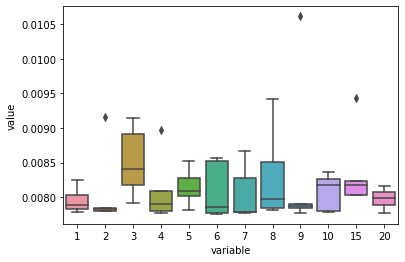

In [10]:
g = sns.boxplot(x='variable', y='value', data=df_melted) #2 

In [11]:
#epoch_number
dic = {}
for i in [50,100,250,500,1000]:
    dic[i] = exp(6,5,128,i,2)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_145"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_145 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_145 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 3s - loss: 1.8378 - 3s/epoch - 615ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2846 - 64ms/epoch - 13ms/step
Epoch 3/50
5/5 - 0s - loss: 0.1361 - 50ms/epoch - 10ms/step
Epoch 4/50
5/5 - 0s - loss: 0.1213 - 50ms/epoch - 10ms/step
Epoch 5/50
5/5 - 0s - loss: 0.0074 - 51ms/epoch - 10ms/step
Epoch 6/50
5/5 - 0s - loss: 0.0414 - 53ms/epoch - 11ms/step
Epoch 7/50
5/5 - 

1/1 [==============================] - 0s 22ms/step - loss: 4.6447e-04
Test Score: 0.0005 MSE (0.02155 RMSE)
Model: "sequential_147"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_147 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_147 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 3s - loss: 1.2791 - 3s/epoch - 582ms/step
Epoch 2/50
5/5 - 0s - loss: 0.0957 - 55ms/epoch - 11ms/step
Epoch 3/50
5/5 - 0s - loss: 0.1845 - 46ms/epoch - 9ms/step
Epoch 4/50
5/5 - 0s - loss: 0.0368 - 45ms/epoch - 9ms/step
Epoch 5/50
5/5 - 0s - loss: 0.

5/5 [==============================] - 1s 5ms/step - loss: 4.4785e-04
Train Score: 0.0004 MSE (0.02116 RMSE)
1/1 [==============================] - 0s 22ms/step - loss: 3.1211e-04
Test Score: 0.0003 MSE (0.01767 RMSE)
Model: "sequential_149"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_149 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_149 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 3s - loss: 1.7660 - 3s/epoch - 573ms/step
Epoch 2/50
5/5 - 0s - loss: 0.1942 - 60ms/epoch - 12ms/step
Epoch 3/50
5/5 - 0s - loss: 0.1806 - 57

Epoch 49/100
5/5 - 0s - loss: 4.9299e-04 - 73ms/epoch - 15ms/step
Epoch 50/100
5/5 - 0s - loss: 4.8168e-04 - 68ms/epoch - 14ms/step
Epoch 51/100
5/5 - 0s - loss: 4.6736e-04 - 69ms/epoch - 14ms/step
Epoch 52/100
5/5 - 0s - loss: 4.6055e-04 - 70ms/epoch - 14ms/step
Epoch 53/100
5/5 - 0s - loss: 4.5495e-04 - 67ms/epoch - 13ms/step
Epoch 54/100
5/5 - 0s - loss: 4.4842e-04 - 67ms/epoch - 13ms/step
Epoch 55/100
5/5 - 0s - loss: 4.4408e-04 - 64ms/epoch - 13ms/step
Epoch 56/100
5/5 - 0s - loss: 4.3250e-04 - 67ms/epoch - 13ms/step
Epoch 57/100
5/5 - 0s - loss: 4.3752e-04 - 67ms/epoch - 13ms/step
Epoch 58/100
5/5 - 0s - loss: 4.2464e-04 - 67ms/epoch - 13ms/step
Epoch 59/100
5/5 - 0s - loss: 4.1665e-04 - 73ms/epoch - 15ms/step
Epoch 60/100
5/5 - 0s - loss: 4.1382e-04 - 70ms/epoch - 14ms/step
Epoch 61/100
5/5 - 0s - loss: 4.1551e-04 - 69ms/epoch - 14ms/step
Epoch 62/100
5/5 - 0s - loss: 4.1196e-04 - 67ms/epoch - 13ms/step
Epoch 63/100
5/5 - 0s - loss: 3.9511e-04 - 73ms/epoch - 15ms/step
Epoch 64/1

Epoch 60/100
5/5 - 0s - loss: 4.1377e-04 - 55ms/epoch - 11ms/step
Epoch 61/100
5/5 - 0s - loss: 4.1410e-04 - 59ms/epoch - 12ms/step
Epoch 62/100
5/5 - 0s - loss: 4.0319e-04 - 57ms/epoch - 11ms/step
Epoch 63/100
5/5 - 0s - loss: 4.0485e-04 - 59ms/epoch - 12ms/step
Epoch 64/100
5/5 - 0s - loss: 4.0262e-04 - 57ms/epoch - 11ms/step
Epoch 65/100
5/5 - 0s - loss: 3.9820e-04 - 58ms/epoch - 12ms/step
Epoch 66/100
5/5 - 0s - loss: 3.8537e-04 - 56ms/epoch - 11ms/step
Epoch 67/100
5/5 - 0s - loss: 3.8138e-04 - 58ms/epoch - 12ms/step
Epoch 68/100
5/5 - 0s - loss: 3.7814e-04 - 58ms/epoch - 12ms/step
Epoch 69/100
5/5 - 0s - loss: 3.6983e-04 - 57ms/epoch - 11ms/step
Epoch 70/100
5/5 - 0s - loss: 3.6556e-04 - 66ms/epoch - 13ms/step
Epoch 71/100
5/5 - 0s - loss: 3.6431e-04 - 67ms/epoch - 13ms/step
Epoch 72/100
5/5 - 0s - loss: 3.5671e-04 - 66ms/epoch - 13ms/step
Epoch 73/100
5/5 - 0s - loss: 3.5338e-04 - 68ms/epoch - 14ms/step
Epoch 74/100
5/5 - 0s - loss: 3.5025e-04 - 71ms/epoch - 14ms/step
Epoch 75/1

Epoch 71/100
5/5 - 0s - loss: 3.4000e-04 - 67ms/epoch - 13ms/step
Epoch 72/100
5/5 - 0s - loss: 3.4838e-04 - 65ms/epoch - 13ms/step
Epoch 73/100
5/5 - 0s - loss: 3.3329e-04 - 67ms/epoch - 13ms/step
Epoch 74/100
5/5 - 0s - loss: 3.3648e-04 - 66ms/epoch - 13ms/step
Epoch 75/100
5/5 - 0s - loss: 3.3705e-04 - 82ms/epoch - 16ms/step
Epoch 76/100
5/5 - 0s - loss: 3.2611e-04 - 96ms/epoch - 19ms/step
Epoch 77/100
5/5 - 0s - loss: 3.2259e-04 - 74ms/epoch - 15ms/step
Epoch 78/100
5/5 - 0s - loss: 3.2321e-04 - 69ms/epoch - 14ms/step
Epoch 79/100
5/5 - 0s - loss: 3.2357e-04 - 70ms/epoch - 14ms/step
Epoch 80/100
5/5 - 0s - loss: 3.1180e-04 - 83ms/epoch - 17ms/step
Epoch 81/100
5/5 - 0s - loss: 3.2016e-04 - 93ms/epoch - 19ms/step
Epoch 82/100
5/5 - 0s - loss: 3.1005e-04 - 85ms/epoch - 17ms/step
Epoch 83/100
5/5 - 0s - loss: 3.0738e-04 - 85ms/epoch - 17ms/step
Epoch 84/100
5/5 - 0s - loss: 3.0615e-04 - 68ms/epoch - 14ms/step
Epoch 85/100
5/5 - 0s - loss: 3.0490e-04 - 69ms/epoch - 14ms/step
Epoch 86/1

Epoch 82/100
5/5 - 0s - loss: 3.3831e-04 - 68ms/epoch - 14ms/step
Epoch 83/100
5/5 - 0s - loss: 3.4106e-04 - 67ms/epoch - 13ms/step
Epoch 84/100
5/5 - 0s - loss: 3.4215e-04 - 68ms/epoch - 14ms/step
Epoch 85/100
5/5 - 0s - loss: 3.2814e-04 - 67ms/epoch - 13ms/step
Epoch 86/100
5/5 - 0s - loss: 3.2636e-04 - 71ms/epoch - 14ms/step
Epoch 87/100
5/5 - 0s - loss: 3.2257e-04 - 72ms/epoch - 14ms/step
Epoch 88/100
5/5 - 0s - loss: 3.1553e-04 - 69ms/epoch - 14ms/step
Epoch 89/100
5/5 - 0s - loss: 3.1696e-04 - 68ms/epoch - 14ms/step
Epoch 90/100
5/5 - 0s - loss: 3.1781e-04 - 69ms/epoch - 14ms/step
Epoch 91/100
5/5 - 0s - loss: 3.1126e-04 - 69ms/epoch - 14ms/step
Epoch 92/100
5/5 - 0s - loss: 3.0999e-04 - 70ms/epoch - 14ms/step
Epoch 93/100
5/5 - 0s - loss: 3.0856e-04 - 72ms/epoch - 14ms/step
Epoch 94/100
5/5 - 0s - loss: 3.0633e-04 - 67ms/epoch - 13ms/step
Epoch 95/100
5/5 - 0s - loss: 3.0109e-04 - 67ms/epoch - 13ms/step
Epoch 96/100
5/5 - 0s - loss: 3.0108e-04 - 67ms/epoch - 13ms/step
Epoch 97/1

Epoch 93/100
5/5 - 0s - loss: 3.2463e-04 - 55ms/epoch - 11ms/step
Epoch 94/100
5/5 - 0s - loss: 3.2253e-04 - 58ms/epoch - 12ms/step
Epoch 95/100
5/5 - 0s - loss: 3.2049e-04 - 57ms/epoch - 11ms/step
Epoch 96/100
5/5 - 0s - loss: 3.1577e-04 - 59ms/epoch - 12ms/step
Epoch 97/100
5/5 - 0s - loss: 3.1905e-04 - 56ms/epoch - 11ms/step
Epoch 98/100
5/5 - 0s - loss: 3.1199e-04 - 61ms/epoch - 12ms/step
Epoch 99/100
5/5 - 0s - loss: 3.0913e-04 - 59ms/epoch - 12ms/step
Epoch 100/100
5/5 - 0s - loss: 3.0662e-04 - 56ms/epoch - 11ms/step
5/5 [==============================] - 1s 5ms/step - loss: 3.0546e-04
Train Score: 0.0003 MSE (0.01748 RMSE)
1/1 [==============================] - 0s 21ms/step - loss: 7.2869e-05
Test Score: 0.0001 MSE (0.00854 RMSE)
Model: "sequential_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_155 (Bidirect  (None, 256)              133120    
 ional)                        

Epoch 104/250
5/5 - 0s - loss: 2.7948e-04 - 88ms/epoch - 18ms/step
Epoch 105/250
5/5 - 0s - loss: 2.7866e-04 - 57ms/epoch - 11ms/step
Epoch 106/250
5/5 - 0s - loss: 2.8286e-04 - 57ms/epoch - 11ms/step
Epoch 107/250
5/5 - 0s - loss: 2.7711e-04 - 55ms/epoch - 11ms/step
Epoch 108/250
5/5 - 0s - loss: 2.8000e-04 - 53ms/epoch - 11ms/step
Epoch 109/250
5/5 - 0s - loss: 2.7988e-04 - 55ms/epoch - 11ms/step
Epoch 110/250
5/5 - 0s - loss: 2.8033e-04 - 57ms/epoch - 11ms/step
Epoch 111/250
5/5 - 0s - loss: 2.7446e-04 - 56ms/epoch - 11ms/step
Epoch 112/250
5/5 - 0s - loss: 2.7990e-04 - 58ms/epoch - 12ms/step
Epoch 113/250
5/5 - 0s - loss: 2.7407e-04 - 55ms/epoch - 11ms/step
Epoch 114/250
5/5 - 0s - loss: 2.7304e-04 - 57ms/epoch - 11ms/step
Epoch 115/250
5/5 - 0s - loss: 2.7543e-04 - 56ms/epoch - 11ms/step
Epoch 116/250
5/5 - 0s - loss: 2.7957e-04 - 59ms/epoch - 12ms/step
Epoch 117/250
5/5 - 0s - loss: 2.8052e-04 - 57ms/epoch - 11ms/step
Epoch 118/250
5/5 - 0s - loss: 2.6870e-04 - 56ms/epoch - 11ms/

Epoch 227/250
5/5 - 0s - loss: 2.7251e-04 - 52ms/epoch - 10ms/step
Epoch 228/250
5/5 - 0s - loss: 2.7582e-04 - 53ms/epoch - 11ms/step
Epoch 229/250
5/5 - 0s - loss: 2.7496e-04 - 50ms/epoch - 10ms/step
Epoch 230/250
5/5 - 0s - loss: 2.7875e-04 - 50ms/epoch - 10ms/step
Epoch 231/250
5/5 - 0s - loss: 2.6807e-04 - 54ms/epoch - 11ms/step
Epoch 232/250
5/5 - 0s - loss: 2.6696e-04 - 54ms/epoch - 11ms/step
Epoch 233/250
5/5 - 0s - loss: 2.7419e-04 - 55ms/epoch - 11ms/step
Epoch 234/250
5/5 - 0s - loss: 2.8941e-04 - 52ms/epoch - 10ms/step
Epoch 235/250
5/5 - 0s - loss: 2.6745e-04 - 55ms/epoch - 11ms/step
Epoch 236/250
5/5 - 0s - loss: 2.6960e-04 - 55ms/epoch - 11ms/step
Epoch 237/250
5/5 - 0s - loss: 2.8005e-04 - 57ms/epoch - 11ms/step
Epoch 238/250
5/5 - 0s - loss: 2.6167e-04 - 55ms/epoch - 11ms/step
Epoch 239/250
5/5 - 0s - loss: 2.6666e-04 - 57ms/epoch - 11ms/step
Epoch 240/250
5/5 - 0s - loss: 2.6143e-04 - 56ms/epoch - 11ms/step
Epoch 241/250
5/5 - 0s - loss: 2.7452e-04 - 58ms/epoch - 12ms/

Epoch 88/250
5/5 - 0s - loss: 3.3939e-04 - 62ms/epoch - 12ms/step
Epoch 89/250
5/5 - 0s - loss: 3.3357e-04 - 61ms/epoch - 12ms/step
Epoch 90/250
5/5 - 0s - loss: 3.3229e-04 - 64ms/epoch - 13ms/step
Epoch 91/250
5/5 - 0s - loss: 3.2761e-04 - 64ms/epoch - 13ms/step
Epoch 92/250
5/5 - 0s - loss: 3.2470e-04 - 68ms/epoch - 14ms/step
Epoch 93/250
5/5 - 0s - loss: 3.1998e-04 - 73ms/epoch - 15ms/step
Epoch 94/250
5/5 - 0s - loss: 3.1920e-04 - 64ms/epoch - 13ms/step
Epoch 95/250
5/5 - 0s - loss: 3.1954e-04 - 66ms/epoch - 13ms/step
Epoch 96/250
5/5 - 0s - loss: 3.1280e-04 - 62ms/epoch - 12ms/step
Epoch 97/250
5/5 - 0s - loss: 3.0969e-04 - 63ms/epoch - 13ms/step
Epoch 98/250
5/5 - 0s - loss: 3.0953e-04 - 64ms/epoch - 13ms/step
Epoch 99/250
5/5 - 0s - loss: 3.1067e-04 - 70ms/epoch - 14ms/step
Epoch 100/250
5/5 - 0s - loss: 3.0336e-04 - 70ms/epoch - 14ms/step
Epoch 101/250
5/5 - 0s - loss: 3.1196e-04 - 65ms/epoch - 13ms/step
Epoch 102/250
5/5 - 0s - loss: 3.1185e-04 - 65ms/epoch - 13ms/step
Epoch 1

Epoch 211/250
5/5 - 0s - loss: 2.9023e-04 - 68ms/epoch - 14ms/step
Epoch 212/250
5/5 - 0s - loss: 2.8168e-04 - 66ms/epoch - 13ms/step
Epoch 213/250
5/5 - 0s - loss: 2.7183e-04 - 66ms/epoch - 13ms/step
Epoch 214/250
5/5 - 0s - loss: 2.6978e-04 - 62ms/epoch - 12ms/step
Epoch 215/250
5/5 - 0s - loss: 2.6963e-04 - 67ms/epoch - 13ms/step
Epoch 216/250
5/5 - 0s - loss: 2.6638e-04 - 79ms/epoch - 16ms/step
Epoch 217/250
5/5 - 0s - loss: 2.6805e-04 - 71ms/epoch - 14ms/step
Epoch 218/250
5/5 - 0s - loss: 2.7787e-04 - 63ms/epoch - 13ms/step
Epoch 219/250
5/5 - 0s - loss: 2.6300e-04 - 64ms/epoch - 13ms/step
Epoch 220/250
5/5 - 0s - loss: 2.8559e-04 - 61ms/epoch - 12ms/step
Epoch 221/250
5/5 - 0s - loss: 2.7156e-04 - 64ms/epoch - 13ms/step
Epoch 222/250
5/5 - 0s - loss: 2.7341e-04 - 64ms/epoch - 13ms/step
Epoch 223/250
5/5 - 0s - loss: 2.6874e-04 - 64ms/epoch - 13ms/step
Epoch 224/250
5/5 - 0s - loss: 2.7879e-04 - 73ms/epoch - 15ms/step
Epoch 225/250
5/5 - 0s - loss: 2.7477e-04 - 69ms/epoch - 14ms/

Epoch 71/250
5/5 - 0s - loss: 3.8109e-04 - 66ms/epoch - 13ms/step
Epoch 72/250
5/5 - 0s - loss: 3.7822e-04 - 63ms/epoch - 13ms/step
Epoch 73/250
5/5 - 0s - loss: 3.6869e-04 - 64ms/epoch - 13ms/step
Epoch 74/250
5/5 - 0s - loss: 3.6714e-04 - 65ms/epoch - 13ms/step
Epoch 75/250
5/5 - 0s - loss: 3.5658e-04 - 64ms/epoch - 13ms/step
Epoch 76/250
5/5 - 0s - loss: 3.6212e-04 - 66ms/epoch - 13ms/step
Epoch 77/250
5/5 - 0s - loss: 3.5098e-04 - 63ms/epoch - 13ms/step
Epoch 78/250
5/5 - 0s - loss: 3.4810e-04 - 65ms/epoch - 13ms/step
Epoch 79/250
5/5 - 0s - loss: 3.6142e-04 - 64ms/epoch - 13ms/step
Epoch 80/250
5/5 - 0s - loss: 3.5975e-04 - 66ms/epoch - 13ms/step
Epoch 81/250
5/5 - 0s - loss: 3.3826e-04 - 64ms/epoch - 13ms/step
Epoch 82/250
5/5 - 0s - loss: 3.5070e-04 - 66ms/epoch - 13ms/step
Epoch 83/250
5/5 - 0s - loss: 3.2985e-04 - 64ms/epoch - 13ms/step
Epoch 84/250
5/5 - 0s - loss: 3.4669e-04 - 66ms/epoch - 13ms/step
Epoch 85/250
5/5 - 0s - loss: 3.4710e-04 - 64ms/epoch - 13ms/step
Epoch 86/2

Epoch 194/250
5/5 - 0s - loss: 2.9160e-04 - 64ms/epoch - 13ms/step
Epoch 195/250
5/5 - 0s - loss: 3.3110e-04 - 65ms/epoch - 13ms/step
Epoch 196/250
5/5 - 0s - loss: 3.0457e-04 - 65ms/epoch - 13ms/step
Epoch 197/250
5/5 - 0s - loss: 2.8499e-04 - 66ms/epoch - 13ms/step
Epoch 198/250
5/5 - 0s - loss: 2.7024e-04 - 66ms/epoch - 13ms/step
Epoch 199/250
5/5 - 0s - loss: 2.6756e-04 - 66ms/epoch - 13ms/step
Epoch 200/250
5/5 - 0s - loss: 3.0225e-04 - 65ms/epoch - 13ms/step
Epoch 201/250
5/5 - 0s - loss: 2.8068e-04 - 65ms/epoch - 13ms/step
Epoch 202/250
5/5 - 0s - loss: 2.8170e-04 - 64ms/epoch - 13ms/step
Epoch 203/250
5/5 - 0s - loss: 2.7943e-04 - 65ms/epoch - 13ms/step
Epoch 204/250
5/5 - 0s - loss: 2.7548e-04 - 65ms/epoch - 13ms/step
Epoch 205/250
5/5 - 0s - loss: 2.7177e-04 - 66ms/epoch - 13ms/step
Epoch 206/250
5/5 - 0s - loss: 2.7741e-04 - 64ms/epoch - 13ms/step
Epoch 207/250
5/5 - 0s - loss: 2.7801e-04 - 66ms/epoch - 13ms/step
Epoch 208/250
5/5 - 0s - loss: 2.7323e-04 - 65ms/epoch - 13ms/

Epoch 54/250
5/5 - 0s - loss: 5.5138e-04 - 75ms/epoch - 15ms/step
Epoch 55/250
5/5 - 0s - loss: 5.3891e-04 - 70ms/epoch - 14ms/step
Epoch 56/250
5/5 - 0s - loss: 5.2934e-04 - 71ms/epoch - 14ms/step
Epoch 57/250
5/5 - 0s - loss: 5.2954e-04 - 70ms/epoch - 14ms/step
Epoch 58/250
5/5 - 0s - loss: 5.0663e-04 - 65ms/epoch - 13ms/step
Epoch 59/250
5/5 - 0s - loss: 5.2151e-04 - 67ms/epoch - 13ms/step
Epoch 60/250
5/5 - 0s - loss: 4.9707e-04 - 66ms/epoch - 13ms/step
Epoch 61/250
5/5 - 0s - loss: 5.0063e-04 - 68ms/epoch - 14ms/step
Epoch 62/250
5/5 - 0s - loss: 4.7953e-04 - 64ms/epoch - 13ms/step
Epoch 63/250
5/5 - 0s - loss: 4.6849e-04 - 70ms/epoch - 14ms/step
Epoch 64/250
5/5 - 0s - loss: 4.7237e-04 - 72ms/epoch - 14ms/step
Epoch 65/250
5/5 - 0s - loss: 4.5321e-04 - 72ms/epoch - 14ms/step
Epoch 66/250
5/5 - 0s - loss: 4.5400e-04 - 74ms/epoch - 15ms/step
Epoch 67/250
5/5 - 0s - loss: 4.4842e-04 - 69ms/epoch - 14ms/step
Epoch 68/250
5/5 - 0s - loss: 4.4018e-04 - 67ms/epoch - 13ms/step
Epoch 69/2

Epoch 177/250
5/5 - 0s - loss: 2.7929e-04 - 73ms/epoch - 15ms/step
Epoch 178/250
5/5 - 0s - loss: 2.7447e-04 - 67ms/epoch - 13ms/step
Epoch 179/250
5/5 - 0s - loss: 2.7470e-04 - 66ms/epoch - 13ms/step
Epoch 180/250
5/5 - 0s - loss: 2.7641e-04 - 66ms/epoch - 13ms/step
Epoch 181/250
5/5 - 0s - loss: 2.7817e-04 - 67ms/epoch - 13ms/step
Epoch 182/250
5/5 - 0s - loss: 2.8960e-04 - 72ms/epoch - 14ms/step
Epoch 183/250
5/5 - 0s - loss: 2.7048e-04 - 74ms/epoch - 15ms/step
Epoch 184/250
5/5 - 0s - loss: 2.7706e-04 - 74ms/epoch - 15ms/step
Epoch 185/250
5/5 - 0s - loss: 2.7510e-04 - 77ms/epoch - 15ms/step
Epoch 186/250
5/5 - 0s - loss: 2.7842e-04 - 73ms/epoch - 15ms/step
Epoch 187/250
5/5 - 0s - loss: 2.7353e-04 - 74ms/epoch - 15ms/step
Epoch 188/250
5/5 - 0s - loss: 2.7457e-04 - 73ms/epoch - 15ms/step
Epoch 189/250
5/5 - 0s - loss: 2.7273e-04 - 76ms/epoch - 15ms/step
Epoch 190/250
5/5 - 0s - loss: 2.6976e-04 - 70ms/epoch - 14ms/step
Epoch 191/250
5/5 - 0s - loss: 2.8392e-04 - 65ms/epoch - 13ms/

Epoch 37/250
5/5 - 0s - loss: 6.3741e-04 - 55ms/epoch - 11ms/step
Epoch 38/250
5/5 - 0s - loss: 6.2751e-04 - 57ms/epoch - 11ms/step
Epoch 39/250
5/5 - 0s - loss: 6.1958e-04 - 57ms/epoch - 11ms/step
Epoch 40/250
5/5 - 0s - loss: 6.1210e-04 - 55ms/epoch - 11ms/step
Epoch 41/250
5/5 - 0s - loss: 6.0638e-04 - 54ms/epoch - 11ms/step
Epoch 42/250
5/5 - 0s - loss: 5.9019e-04 - 56ms/epoch - 11ms/step
Epoch 43/250
5/5 - 0s - loss: 5.9414e-04 - 54ms/epoch - 11ms/step
Epoch 44/250
5/5 - 0s - loss: 5.8399e-04 - 56ms/epoch - 11ms/step
Epoch 45/250
5/5 - 0s - loss: 5.7403e-04 - 53ms/epoch - 11ms/step
Epoch 46/250
5/5 - 0s - loss: 5.5611e-04 - 54ms/epoch - 11ms/step
Epoch 47/250
5/5 - 0s - loss: 5.5938e-04 - 54ms/epoch - 11ms/step
Epoch 48/250
5/5 - 0s - loss: 5.4228e-04 - 55ms/epoch - 11ms/step
Epoch 49/250
5/5 - 0s - loss: 5.3809e-04 - 53ms/epoch - 11ms/step
Epoch 50/250
5/5 - 0s - loss: 5.2338e-04 - 54ms/epoch - 11ms/step
Epoch 51/250
5/5 - 0s - loss: 5.3610e-04 - 57ms/epoch - 11ms/step
Epoch 52/2

Epoch 161/250
5/5 - 0s - loss: 2.7092e-04 - 60ms/epoch - 12ms/step
Epoch 162/250
5/5 - 0s - loss: 2.7206e-04 - 70ms/epoch - 14ms/step
Epoch 163/250
5/5 - 0s - loss: 2.6988e-04 - 71ms/epoch - 14ms/step
Epoch 164/250
5/5 - 0s - loss: 2.7205e-04 - 75ms/epoch - 15ms/step
Epoch 165/250
5/5 - 0s - loss: 2.7813e-04 - 65ms/epoch - 13ms/step
Epoch 166/250
5/5 - 0s - loss: 2.7254e-04 - 58ms/epoch - 12ms/step
Epoch 167/250
5/5 - 0s - loss: 2.7792e-04 - 55ms/epoch - 11ms/step
Epoch 168/250
5/5 - 0s - loss: 2.7858e-04 - 56ms/epoch - 11ms/step
Epoch 169/250
5/5 - 0s - loss: 2.7057e-04 - 59ms/epoch - 12ms/step
Epoch 170/250
5/5 - 0s - loss: 2.7270e-04 - 60ms/epoch - 12ms/step
Epoch 171/250
5/5 - 0s - loss: 2.7179e-04 - 60ms/epoch - 12ms/step
Epoch 172/250
5/5 - 0s - loss: 2.6984e-04 - 57ms/epoch - 11ms/step
Epoch 173/250
5/5 - 0s - loss: 2.7117e-04 - 58ms/epoch - 12ms/step
Epoch 174/250
5/5 - 0s - loss: 2.7937e-04 - 56ms/epoch - 11ms/step
Epoch 175/250
5/5 - 0s - loss: 2.6955e-04 - 55ms/epoch - 11ms/

5/5 - 0s - loss: 7.8169e-04 - 54ms/epoch - 11ms/step
Epoch 21/500
5/5 - 0s - loss: 6.9904e-04 - 51ms/epoch - 10ms/step
Epoch 22/500
5/5 - 0s - loss: 7.1712e-04 - 52ms/epoch - 10ms/step
Epoch 23/500
5/5 - 0s - loss: 6.9773e-04 - 50ms/epoch - 10ms/step
Epoch 24/500
5/5 - 0s - loss: 6.8607e-04 - 59ms/epoch - 12ms/step
Epoch 25/500
5/5 - 0s - loss: 6.7611e-04 - 58ms/epoch - 12ms/step
Epoch 26/500
5/5 - 0s - loss: 6.6280e-04 - 56ms/epoch - 11ms/step
Epoch 27/500
5/5 - 0s - loss: 6.5273e-04 - 59ms/epoch - 12ms/step
Epoch 28/500
5/5 - 0s - loss: 6.4359e-04 - 60ms/epoch - 12ms/step
Epoch 29/500
5/5 - 0s - loss: 6.3643e-04 - 58ms/epoch - 12ms/step
Epoch 30/500
5/5 - 0s - loss: 6.2455e-04 - 59ms/epoch - 12ms/step
Epoch 31/500
5/5 - 0s - loss: 6.1660e-04 - 61ms/epoch - 12ms/step
Epoch 32/500
5/5 - 0s - loss: 6.1002e-04 - 59ms/epoch - 12ms/step
Epoch 33/500
5/5 - 0s - loss: 6.0767e-04 - 57ms/epoch - 11ms/step
Epoch 34/500
5/5 - 0s - loss: 5.8807e-04 - 61ms/epoch - 12ms/step
Epoch 35/500
5/5 - 0s -

Epoch 144/500
5/5 - 0s - loss: 2.6827e-04 - 52ms/epoch - 10ms/step
Epoch 145/500
5/5 - 0s - loss: 2.7340e-04 - 53ms/epoch - 11ms/step
Epoch 146/500
5/5 - 0s - loss: 2.6534e-04 - 51ms/epoch - 10ms/step
Epoch 147/500
5/5 - 0s - loss: 2.7692e-04 - 51ms/epoch - 10ms/step
Epoch 148/500
5/5 - 0s - loss: 2.6825e-04 - 51ms/epoch - 10ms/step
Epoch 149/500
5/5 - 0s - loss: 2.6948e-04 - 51ms/epoch - 10ms/step
Epoch 150/500
5/5 - 0s - loss: 2.7218e-04 - 50ms/epoch - 10ms/step
Epoch 151/500
5/5 - 0s - loss: 2.7579e-04 - 51ms/epoch - 10ms/step
Epoch 152/500
5/5 - 0s - loss: 2.7604e-04 - 53ms/epoch - 11ms/step
Epoch 153/500
5/5 - 0s - loss: 2.6771e-04 - 51ms/epoch - 10ms/step
Epoch 154/500
5/5 - 0s - loss: 2.7503e-04 - 51ms/epoch - 10ms/step
Epoch 155/500
5/5 - 0s - loss: 2.8465e-04 - 52ms/epoch - 10ms/step
Epoch 156/500
5/5 - 0s - loss: 2.7773e-04 - 50ms/epoch - 10ms/step
Epoch 157/500
5/5 - 0s - loss: 2.8994e-04 - 51ms/epoch - 10ms/step
Epoch 158/500
5/5 - 0s - loss: 3.1918e-04 - 54ms/epoch - 11ms/

Epoch 267/500
5/5 - 0s - loss: 2.7210e-04 - 53ms/epoch - 11ms/step
Epoch 268/500
5/5 - 0s - loss: 2.6913e-04 - 55ms/epoch - 11ms/step
Epoch 269/500
5/5 - 0s - loss: 2.7633e-04 - 52ms/epoch - 10ms/step
Epoch 270/500
5/5 - 0s - loss: 2.6529e-04 - 51ms/epoch - 10ms/step
Epoch 271/500
5/5 - 0s - loss: 2.6645e-04 - 51ms/epoch - 10ms/step
Epoch 272/500
5/5 - 0s - loss: 2.7640e-04 - 51ms/epoch - 10ms/step
Epoch 273/500
5/5 - 0s - loss: 2.9442e-04 - 53ms/epoch - 11ms/step
Epoch 274/500
5/5 - 0s - loss: 2.6540e-04 - 51ms/epoch - 10ms/step
Epoch 275/500
5/5 - 0s - loss: 2.7210e-04 - 52ms/epoch - 10ms/step
Epoch 276/500
5/5 - 0s - loss: 3.0268e-04 - 51ms/epoch - 10ms/step
Epoch 277/500
5/5 - 0s - loss: 2.6669e-04 - 54ms/epoch - 11ms/step
Epoch 278/500
5/5 - 0s - loss: 2.6307e-04 - 51ms/epoch - 10ms/step
Epoch 279/500
5/5 - 0s - loss: 2.7274e-04 - 51ms/epoch - 10ms/step
Epoch 280/500
5/5 - 0s - loss: 2.6876e-04 - 50ms/epoch - 10ms/step
Epoch 281/500
5/5 - 0s - loss: 2.7833e-04 - 51ms/epoch - 10ms/

Epoch 390/500
5/5 - 0s - loss: 2.6145e-04 - 51ms/epoch - 10ms/step
Epoch 391/500
5/5 - 0s - loss: 2.6119e-04 - 51ms/epoch - 10ms/step
Epoch 392/500
5/5 - 0s - loss: 2.8970e-04 - 52ms/epoch - 10ms/step
Epoch 393/500
5/5 - 0s - loss: 3.5037e-04 - 51ms/epoch - 10ms/step
Epoch 394/500
5/5 - 0s - loss: 3.3169e-04 - 50ms/epoch - 10ms/step
Epoch 395/500
5/5 - 0s - loss: 2.5864e-04 - 54ms/epoch - 11ms/step
Epoch 396/500
5/5 - 0s - loss: 2.7057e-04 - 52ms/epoch - 10ms/step
Epoch 397/500
5/5 - 0s - loss: 3.0754e-04 - 51ms/epoch - 10ms/step
Epoch 398/500
5/5 - 0s - loss: 3.1126e-04 - 51ms/epoch - 10ms/step
Epoch 399/500
5/5 - 0s - loss: 2.6264e-04 - 50ms/epoch - 10ms/step
Epoch 400/500
5/5 - 0s - loss: 2.9045e-04 - 51ms/epoch - 10ms/step
Epoch 401/500
5/5 - 0s - loss: 2.5805e-04 - 52ms/epoch - 10ms/step
Epoch 402/500
5/5 - 0s - loss: 3.1993e-04 - 51ms/epoch - 10ms/step
Epoch 403/500
5/5 - 0s - loss: 2.6388e-04 - 52ms/epoch - 10ms/step
Epoch 404/500
5/5 - 0s - loss: 2.7851e-04 - 52ms/epoch - 10ms/

Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
5/5 - 3s - loss: 1.7463 - 3s/epoch - 584ms/step
Epoch 2/500
5/5 - 0s - loss: 0.3090 - 46ms/epoch - 9ms/step
Epoch 3/500
5/5 - 0s - loss: 0.1098 - 45ms/epoch - 9ms/step
Epoch 4/500
5/5 - 0s - loss: 0.1209 - 42ms/epoch - 8ms/step
Epoch 5/500
5/5 - 0s - loss: 0.0069 - 45ms/epoch - 9ms/step
Epoch 6/500
5/5 - 0s - loss: 0.0418 - 45ms/epoch - 9ms/step
Epoch 7/500
5/5 - 0s - loss: 0.0288 - 45ms/epoch - 9ms/step
Epoch 8/500
5/5 - 0s - loss: 0.0028 - 43ms/epoch - 9ms/step
Epoch 9/500
5/5 - 0s - loss: 0.0082 - 45ms/epoch - 9ms/step
Epoch 10/500
5/5 - 0s - loss: 0.0061 - 45ms/epoch - 9ms/step
Epoch 11/500
5/5 - 0s - loss: 0.0012 - 44ms/epoch - 9ms/step
Epoch 12/500
5/5 - 0s - loss: 0.0028 - 42ms/epoch - 8ms/step
Epoch 13/500
5/5 - 0s - loss: 0.0015 - 44ms/epoch - 9ms/step
Epoch 14/500
5/5 - 0s - loss: 9.1116e-04 - 44ms/epoch - 9ms/step
Epoch 15/500


Epoch 125/500
5/5 - 0s - loss: 2.7208e-04 - 46ms/epoch - 9ms/step
Epoch 126/500
5/5 - 0s - loss: 2.6564e-04 - 46ms/epoch - 9ms/step
Epoch 127/500
5/5 - 0s - loss: 2.6467e-04 - 46ms/epoch - 9ms/step
Epoch 128/500
5/5 - 0s - loss: 2.8848e-04 - 42ms/epoch - 8ms/step
Epoch 129/500
5/5 - 0s - loss: 2.6839e-04 - 42ms/epoch - 8ms/step
Epoch 130/500
5/5 - 0s - loss: 2.8580e-04 - 45ms/epoch - 9ms/step
Epoch 131/500
5/5 - 0s - loss: 2.8278e-04 - 45ms/epoch - 9ms/step
Epoch 132/500
5/5 - 0s - loss: 2.8484e-04 - 43ms/epoch - 9ms/step
Epoch 133/500
5/5 - 0s - loss: 2.8422e-04 - 42ms/epoch - 8ms/step
Epoch 134/500
5/5 - 0s - loss: 2.9873e-04 - 45ms/epoch - 9ms/step
Epoch 135/500
5/5 - 0s - loss: 2.6199e-04 - 42ms/epoch - 8ms/step
Epoch 136/500
5/5 - 0s - loss: 2.7668e-04 - 42ms/epoch - 8ms/step
Epoch 137/500
5/5 - 0s - loss: 2.6490e-04 - 44ms/epoch - 9ms/step
Epoch 138/500
5/5 - 0s - loss: 2.7467e-04 - 45ms/epoch - 9ms/step
Epoch 139/500
5/5 - 0s - loss: 2.6478e-04 - 42ms/epoch - 8ms/step
Epoch 140/

5/5 - 0s - loss: 2.9496e-04 - 48ms/epoch - 10ms/step
Epoch 250/500
5/5 - 0s - loss: 2.9112e-04 - 45ms/epoch - 9ms/step
Epoch 251/500
5/5 - 0s - loss: 2.8271e-04 - 45ms/epoch - 9ms/step
Epoch 252/500
5/5 - 0s - loss: 2.5695e-04 - 42ms/epoch - 8ms/step
Epoch 253/500
5/5 - 0s - loss: 3.0420e-04 - 45ms/epoch - 9ms/step
Epoch 254/500
5/5 - 0s - loss: 3.0520e-04 - 44ms/epoch - 9ms/step
Epoch 255/500
5/5 - 0s - loss: 2.8893e-04 - 44ms/epoch - 9ms/step
Epoch 256/500
5/5 - 0s - loss: 2.6778e-04 - 42ms/epoch - 8ms/step
Epoch 257/500
5/5 - 0s - loss: 3.0229e-04 - 45ms/epoch - 9ms/step
Epoch 258/500
5/5 - 0s - loss: 2.7270e-04 - 44ms/epoch - 9ms/step
Epoch 259/500
5/5 - 0s - loss: 2.5900e-04 - 45ms/epoch - 9ms/step
Epoch 260/500
5/5 - 0s - loss: 2.6418e-04 - 42ms/epoch - 8ms/step
Epoch 261/500
5/5 - 0s - loss: 2.6091e-04 - 45ms/epoch - 9ms/step
Epoch 262/500
5/5 - 0s - loss: 2.5942e-04 - 45ms/epoch - 9ms/step
Epoch 263/500
5/5 - 0s - loss: 2.6094e-04 - 43ms/epoch - 9ms/step
Epoch 264/500
5/5 - 0s 

Epoch 374/500
5/5 - 0s - loss: 3.2416e-04 - 45ms/epoch - 9ms/step
Epoch 375/500
5/5 - 0s - loss: 3.2141e-04 - 44ms/epoch - 9ms/step
Epoch 376/500
5/5 - 0s - loss: 2.9515e-04 - 43ms/epoch - 9ms/step
Epoch 377/500
5/5 - 0s - loss: 2.9826e-04 - 45ms/epoch - 9ms/step
Epoch 378/500
5/5 - 0s - loss: 2.7515e-04 - 45ms/epoch - 9ms/step
Epoch 379/500
5/5 - 0s - loss: 2.6081e-04 - 42ms/epoch - 8ms/step
Epoch 380/500
5/5 - 0s - loss: 2.6993e-04 - 41ms/epoch - 8ms/step
Epoch 381/500
5/5 - 0s - loss: 3.2071e-04 - 44ms/epoch - 9ms/step
Epoch 382/500
5/5 - 0s - loss: 3.0341e-04 - 43ms/epoch - 9ms/step
Epoch 383/500
5/5 - 0s - loss: 2.8858e-04 - 42ms/epoch - 8ms/step
Epoch 384/500
5/5 - 0s - loss: 3.4274e-04 - 44ms/epoch - 9ms/step
Epoch 385/500
5/5 - 0s - loss: 3.2907e-04 - 45ms/epoch - 9ms/step
Epoch 386/500
5/5 - 0s - loss: 2.8855e-04 - 42ms/epoch - 8ms/step
Epoch 387/500
5/5 - 0s - loss: 3.5217e-04 - 44ms/epoch - 9ms/step
Epoch 388/500
5/5 - 0s - loss: 2.7774e-04 - 41ms/epoch - 8ms/step
Epoch 389/

5/5 - 0s - loss: 2.8006e-04 - 44ms/epoch - 9ms/step
Epoch 499/500
5/5 - 0s - loss: 2.9677e-04 - 43ms/epoch - 9ms/step
Epoch 500/500
5/5 - 0s - loss: 2.6834e-04 - 44ms/epoch - 9ms/step
5/5 [==============================] - 1s 4ms/step - loss: 5.0776e-04
Train Score: 0.0005 MSE (0.02253 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 4.2438e-04
Test Score: 0.0004 MSE (0.02060 RMSE)
Model: "sequential_162"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_162 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_162 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
________________________________________

Epoch 109/500
5/5 - 0s - loss: 2.8298e-04 - 61ms/epoch - 12ms/step
Epoch 110/500
5/5 - 0s - loss: 3.0331e-04 - 64ms/epoch - 13ms/step
Epoch 111/500
5/5 - 0s - loss: 2.7129e-04 - 64ms/epoch - 13ms/step
Epoch 112/500
5/5 - 0s - loss: 2.9848e-04 - 60ms/epoch - 12ms/step
Epoch 113/500
5/5 - 0s - loss: 2.8826e-04 - 63ms/epoch - 13ms/step
Epoch 114/500
5/5 - 0s - loss: 2.7719e-04 - 63ms/epoch - 13ms/step
Epoch 115/500
5/5 - 0s - loss: 2.8198e-04 - 62ms/epoch - 12ms/step
Epoch 116/500
5/5 - 0s - loss: 2.7623e-04 - 60ms/epoch - 12ms/step
Epoch 117/500
5/5 - 0s - loss: 2.7012e-04 - 62ms/epoch - 12ms/step
Epoch 118/500
5/5 - 0s - loss: 3.0156e-04 - 63ms/epoch - 13ms/step
Epoch 119/500
5/5 - 0s - loss: 2.7876e-04 - 63ms/epoch - 13ms/step
Epoch 120/500
5/5 - 0s - loss: 2.8298e-04 - 62ms/epoch - 12ms/step
Epoch 121/500
5/5 - 0s - loss: 2.6963e-04 - 60ms/epoch - 12ms/step
Epoch 122/500
5/5 - 0s - loss: 2.8875e-04 - 62ms/epoch - 12ms/step
Epoch 123/500
5/5 - 0s - loss: 2.7439e-04 - 62ms/epoch - 12ms/

Epoch 232/500
5/5 - 0s - loss: 2.8460e-04 - 63ms/epoch - 13ms/step
Epoch 233/500
5/5 - 0s - loss: 2.7365e-04 - 59ms/epoch - 12ms/step
Epoch 234/500
5/5 - 0s - loss: 2.9288e-04 - 59ms/epoch - 12ms/step
Epoch 235/500
5/5 - 0s - loss: 2.7964e-04 - 61ms/epoch - 12ms/step
Epoch 236/500
5/5 - 0s - loss: 2.9182e-04 - 60ms/epoch - 12ms/step
Epoch 237/500
5/5 - 0s - loss: 3.2695e-04 - 62ms/epoch - 12ms/step
Epoch 238/500
5/5 - 0s - loss: 3.0697e-04 - 60ms/epoch - 12ms/step
Epoch 239/500
5/5 - 0s - loss: 2.6823e-04 - 60ms/epoch - 12ms/step
Epoch 240/500
5/5 - 0s - loss: 2.7147e-04 - 63ms/epoch - 13ms/step
Epoch 241/500
5/5 - 0s - loss: 2.6558e-04 - 62ms/epoch - 12ms/step
Epoch 242/500
5/5 - 0s - loss: 2.7022e-04 - 60ms/epoch - 12ms/step
Epoch 243/500
5/5 - 0s - loss: 2.9262e-04 - 62ms/epoch - 12ms/step
Epoch 244/500
5/5 - 0s - loss: 2.9342e-04 - 63ms/epoch - 13ms/step
Epoch 245/500
5/5 - 0s - loss: 2.6902e-04 - 62ms/epoch - 12ms/step
Epoch 246/500
5/5 - 0s - loss: 2.6832e-04 - 59ms/epoch - 12ms/

Epoch 355/500
5/5 - 0s - loss: 3.3968e-04 - 59ms/epoch - 12ms/step
Epoch 356/500
5/5 - 0s - loss: 3.2299e-04 - 61ms/epoch - 12ms/step
Epoch 357/500
5/5 - 0s - loss: 3.0528e-04 - 61ms/epoch - 12ms/step
Epoch 358/500
5/5 - 0s - loss: 3.1130e-04 - 60ms/epoch - 12ms/step
Epoch 359/500
5/5 - 0s - loss: 2.9504e-04 - 63ms/epoch - 13ms/step
Epoch 360/500
5/5 - 0s - loss: 2.7960e-04 - 62ms/epoch - 12ms/step
Epoch 361/500
5/5 - 0s - loss: 2.6006e-04 - 59ms/epoch - 12ms/step
Epoch 362/500
5/5 - 0s - loss: 2.6455e-04 - 63ms/epoch - 13ms/step
Epoch 363/500
5/5 - 0s - loss: 3.3067e-04 - 60ms/epoch - 12ms/step
Epoch 364/500
5/5 - 0s - loss: 3.8285e-04 - 62ms/epoch - 12ms/step
Epoch 365/500
5/5 - 0s - loss: 3.4983e-04 - 59ms/epoch - 12ms/step
Epoch 366/500
5/5 - 0s - loss: 2.6681e-04 - 59ms/epoch - 12ms/step
Epoch 367/500
5/5 - 0s - loss: 2.9447e-04 - 63ms/epoch - 13ms/step
Epoch 368/500
5/5 - 0s - loss: 2.6966e-04 - 62ms/epoch - 12ms/step
Epoch 369/500
5/5 - 0s - loss: 2.7983e-04 - 60ms/epoch - 12ms/

Epoch 478/500
5/5 - 0s - loss: 2.9650e-04 - 63ms/epoch - 13ms/step
Epoch 479/500
5/5 - 0s - loss: 2.8767e-04 - 60ms/epoch - 12ms/step
Epoch 480/500
5/5 - 0s - loss: 2.5899e-04 - 59ms/epoch - 12ms/step
Epoch 481/500
5/5 - 0s - loss: 2.7164e-04 - 62ms/epoch - 12ms/step
Epoch 482/500
5/5 - 0s - loss: 2.7391e-04 - 60ms/epoch - 12ms/step
Epoch 483/500
5/5 - 0s - loss: 2.9891e-04 - 62ms/epoch - 12ms/step
Epoch 484/500
5/5 - 0s - loss: 2.8135e-04 - 62ms/epoch - 12ms/step
Epoch 485/500
5/5 - 0s - loss: 3.1196e-04 - 59ms/epoch - 12ms/step
Epoch 486/500
5/5 - 0s - loss: 3.1207e-04 - 63ms/epoch - 13ms/step
Epoch 487/500
5/5 - 0s - loss: 3.0709e-04 - 63ms/epoch - 13ms/step
Epoch 488/500
5/5 - 0s - loss: 3.2838e-04 - 62ms/epoch - 12ms/step
Epoch 489/500
5/5 - 0s - loss: 3.0363e-04 - 60ms/epoch - 12ms/step
Epoch 490/500
5/5 - 0s - loss: 2.7131e-04 - 62ms/epoch - 12ms/step
Epoch 491/500
5/5 - 0s - loss: 2.6552e-04 - 63ms/epoch - 13ms/step
Epoch 492/500
5/5 - 0s - loss: 2.6299e-04 - 62ms/epoch - 12ms/

Epoch 89/500
5/5 - 0s - loss: 3.5415e-04 - 48ms/epoch - 10ms/step
Epoch 90/500
5/5 - 0s - loss: 3.1352e-04 - 48ms/epoch - 10ms/step
Epoch 91/500
5/5 - 0s - loss: 3.3016e-04 - 47ms/epoch - 9ms/step
Epoch 92/500
5/5 - 0s - loss: 3.1790e-04 - 48ms/epoch - 10ms/step
Epoch 93/500
5/5 - 0s - loss: 3.4044e-04 - 47ms/epoch - 9ms/step
Epoch 94/500
5/5 - 0s - loss: 3.0673e-04 - 52ms/epoch - 10ms/step
Epoch 95/500
5/5 - 0s - loss: 3.1449e-04 - 55ms/epoch - 11ms/step
Epoch 96/500
5/5 - 0s - loss: 3.0780e-04 - 55ms/epoch - 11ms/step
Epoch 97/500
5/5 - 0s - loss: 3.0623e-04 - 52ms/epoch - 10ms/step
Epoch 98/500
5/5 - 0s - loss: 2.9639e-04 - 52ms/epoch - 10ms/step
Epoch 99/500
5/5 - 0s - loss: 3.0666e-04 - 55ms/epoch - 11ms/step
Epoch 100/500
5/5 - 0s - loss: 2.9183e-04 - 55ms/epoch - 11ms/step
Epoch 101/500
5/5 - 0s - loss: 2.9232e-04 - 54ms/epoch - 11ms/step
Epoch 102/500
5/5 - 0s - loss: 2.9334e-04 - 55ms/epoch - 11ms/step
Epoch 103/500
5/5 - 0s - loss: 2.9996e-04 - 55ms/epoch - 11ms/step
Epoch 10

Epoch 212/500
5/5 - 0s - loss: 2.5606e-04 - 53ms/epoch - 11ms/step
Epoch 213/500
5/5 - 0s - loss: 2.7727e-04 - 50ms/epoch - 10ms/step
Epoch 214/500
5/5 - 0s - loss: 2.6662e-04 - 48ms/epoch - 10ms/step
Epoch 215/500
5/5 - 0s - loss: 2.7705e-04 - 50ms/epoch - 10ms/step
Epoch 216/500
5/5 - 0s - loss: 2.7089e-04 - 49ms/epoch - 10ms/step
Epoch 217/500
5/5 - 0s - loss: 2.7518e-04 - 48ms/epoch - 10ms/step
Epoch 218/500
5/5 - 0s - loss: 2.5887e-04 - 49ms/epoch - 10ms/step
Epoch 219/500
5/5 - 0s - loss: 2.6503e-04 - 47ms/epoch - 9ms/step
Epoch 220/500
5/5 - 0s - loss: 2.6204e-04 - 48ms/epoch - 10ms/step
Epoch 221/500
5/5 - 0s - loss: 2.6350e-04 - 49ms/epoch - 10ms/step
Epoch 222/500
5/5 - 0s - loss: 2.7341e-04 - 47ms/epoch - 9ms/step
Epoch 223/500
5/5 - 0s - loss: 2.7059e-04 - 50ms/epoch - 10ms/step
Epoch 224/500
5/5 - 0s - loss: 2.7916e-04 - 49ms/epoch - 10ms/step
Epoch 225/500
5/5 - 0s - loss: 2.7559e-04 - 49ms/epoch - 10ms/step
Epoch 226/500
5/5 - 0s - loss: 2.6761e-04 - 50ms/epoch - 10ms/st

Epoch 335/500
5/5 - 0s - loss: 2.6459e-04 - 45ms/epoch - 9ms/step
Epoch 336/500
5/5 - 0s - loss: 2.6602e-04 - 58ms/epoch - 12ms/step
Epoch 337/500
5/5 - 0s - loss: 2.7498e-04 - 57ms/epoch - 11ms/step
Epoch 338/500
5/5 - 0s - loss: 2.7432e-04 - 59ms/epoch - 12ms/step
Epoch 339/500
5/5 - 0s - loss: 2.6056e-04 - 60ms/epoch - 12ms/step
Epoch 340/500
5/5 - 0s - loss: 2.7981e-04 - 63ms/epoch - 13ms/step
Epoch 341/500
5/5 - 0s - loss: 2.7935e-04 - 58ms/epoch - 12ms/step
Epoch 342/500
5/5 - 0s - loss: 2.7556e-04 - 60ms/epoch - 12ms/step
Epoch 343/500
5/5 - 0s - loss: 2.8075e-04 - 63ms/epoch - 13ms/step
Epoch 344/500
5/5 - 0s - loss: 2.7971e-04 - 53ms/epoch - 11ms/step
Epoch 345/500
5/5 - 0s - loss: 2.7605e-04 - 49ms/epoch - 10ms/step
Epoch 346/500
5/5 - 0s - loss: 2.6087e-04 - 49ms/epoch - 10ms/step
Epoch 347/500
5/5 - 0s - loss: 2.5956e-04 - 49ms/epoch - 10ms/step
Epoch 348/500
5/5 - 0s - loss: 2.6460e-04 - 55ms/epoch - 11ms/step
Epoch 349/500
5/5 - 0s - loss: 2.5862e-04 - 62ms/epoch - 12ms/s

Epoch 458/500
5/5 - 0s - loss: 2.5858e-04 - 48ms/epoch - 10ms/step
Epoch 459/500
5/5 - 0s - loss: 2.6765e-04 - 48ms/epoch - 10ms/step
Epoch 460/500
5/5 - 0s - loss: 2.7748e-04 - 52ms/epoch - 10ms/step
Epoch 461/500
5/5 - 0s - loss: 2.6568e-04 - 50ms/epoch - 10ms/step
Epoch 462/500
5/5 - 0s - loss: 2.7142e-04 - 48ms/epoch - 10ms/step
Epoch 463/500
5/5 - 0s - loss: 2.6650e-04 - 48ms/epoch - 10ms/step
Epoch 464/500
5/5 - 0s - loss: 2.7086e-04 - 48ms/epoch - 10ms/step
Epoch 465/500
5/5 - 0s - loss: 2.6908e-04 - 48ms/epoch - 10ms/step
Epoch 466/500
5/5 - 0s - loss: 2.9863e-04 - 48ms/epoch - 10ms/step
Epoch 467/500
5/5 - 0s - loss: 2.7121e-04 - 49ms/epoch - 10ms/step
Epoch 468/500
5/5 - 0s - loss: 2.5575e-04 - 48ms/epoch - 10ms/step
Epoch 469/500
5/5 - 0s - loss: 2.6427e-04 - 47ms/epoch - 9ms/step
Epoch 470/500
5/5 - 0s - loss: 2.6917e-04 - 47ms/epoch - 9ms/step
Epoch 471/500
5/5 - 0s - loss: 2.6691e-04 - 47ms/epoch - 9ms/step
Epoch 472/500
5/5 - 0s - loss: 3.0464e-04 - 47ms/epoch - 9ms/step

Epoch 68/500
5/5 - 0s - loss: 3.7994e-04 - 55ms/epoch - 11ms/step
Epoch 69/500
5/5 - 0s - loss: 3.7750e-04 - 57ms/epoch - 11ms/step
Epoch 70/500
5/5 - 0s - loss: 3.7215e-04 - 53ms/epoch - 11ms/step
Epoch 71/500
5/5 - 0s - loss: 3.6700e-04 - 54ms/epoch - 11ms/step
Epoch 72/500
5/5 - 0s - loss: 3.6178e-04 - 54ms/epoch - 11ms/step
Epoch 73/500
5/5 - 0s - loss: 3.6515e-04 - 55ms/epoch - 11ms/step
Epoch 74/500
5/5 - 0s - loss: 3.5565e-04 - 53ms/epoch - 11ms/step
Epoch 75/500
5/5 - 0s - loss: 3.5142e-04 - 55ms/epoch - 11ms/step
Epoch 76/500
5/5 - 0s - loss: 3.5852e-04 - 54ms/epoch - 11ms/step
Epoch 77/500
5/5 - 0s - loss: 3.4341e-04 - 51ms/epoch - 10ms/step
Epoch 78/500
5/5 - 0s - loss: 3.4659e-04 - 53ms/epoch - 11ms/step
Epoch 79/500
5/5 - 0s - loss: 3.3788e-04 - 55ms/epoch - 11ms/step
Epoch 80/500
5/5 - 0s - loss: 3.3375e-04 - 53ms/epoch - 11ms/step
Epoch 81/500
5/5 - 0s - loss: 3.3506e-04 - 56ms/epoch - 11ms/step
Epoch 82/500
5/5 - 0s - loss: 3.3278e-04 - 54ms/epoch - 11ms/step
Epoch 83/5

Epoch 191/500
5/5 - 0s - loss: 2.8027e-04 - 55ms/epoch - 11ms/step
Epoch 192/500
5/5 - 0s - loss: 2.7216e-04 - 54ms/epoch - 11ms/step
Epoch 193/500
5/5 - 0s - loss: 2.7871e-04 - 52ms/epoch - 10ms/step
Epoch 194/500
5/5 - 0s - loss: 2.7096e-04 - 54ms/epoch - 11ms/step
Epoch 195/500
5/5 - 0s - loss: 2.7352e-04 - 52ms/epoch - 10ms/step
Epoch 196/500
5/5 - 0s - loss: 2.7168e-04 - 53ms/epoch - 11ms/step
Epoch 197/500
5/5 - 0s - loss: 2.7003e-04 - 53ms/epoch - 11ms/step
Epoch 198/500
5/5 - 0s - loss: 2.8792e-04 - 53ms/epoch - 11ms/step
Epoch 199/500
5/5 - 0s - loss: 2.8036e-04 - 48ms/epoch - 10ms/step
Epoch 200/500
5/5 - 0s - loss: 2.7804e-04 - 48ms/epoch - 10ms/step
Epoch 201/500
5/5 - 0s - loss: 2.7808e-04 - 48ms/epoch - 10ms/step
Epoch 202/500
5/5 - 0s - loss: 3.0135e-04 - 47ms/epoch - 9ms/step
Epoch 203/500
5/5 - 0s - loss: 2.8964e-04 - 50ms/epoch - 10ms/step
Epoch 204/500
5/5 - 0s - loss: 2.6805e-04 - 55ms/epoch - 11ms/step
Epoch 205/500
5/5 - 0s - loss: 2.7165e-04 - 51ms/epoch - 10ms/s

Epoch 314/500
5/5 - 0s - loss: 2.6729e-04 - 50ms/epoch - 10ms/step
Epoch 315/500
5/5 - 0s - loss: 2.6289e-04 - 50ms/epoch - 10ms/step
Epoch 316/500
5/5 - 0s - loss: 2.9722e-04 - 49ms/epoch - 10ms/step
Epoch 317/500
5/5 - 0s - loss: 3.0271e-04 - 47ms/epoch - 9ms/step
Epoch 318/500
5/5 - 0s - loss: 2.6178e-04 - 49ms/epoch - 10ms/step
Epoch 319/500
5/5 - 0s - loss: 3.0100e-04 - 47ms/epoch - 9ms/step
Epoch 320/500
5/5 - 0s - loss: 2.7690e-04 - 50ms/epoch - 10ms/step
Epoch 321/500
5/5 - 0s - loss: 2.8937e-04 - 53ms/epoch - 11ms/step
Epoch 322/500
5/5 - 0s - loss: 2.9257e-04 - 56ms/epoch - 11ms/step
Epoch 323/500
5/5 - 0s - loss: 2.9861e-04 - 51ms/epoch - 10ms/step
Epoch 324/500
5/5 - 0s - loss: 2.9287e-04 - 48ms/epoch - 10ms/step
Epoch 325/500
5/5 - 0s - loss: 2.9036e-04 - 48ms/epoch - 10ms/step
Epoch 326/500
5/5 - 0s - loss: 2.6860e-04 - 48ms/epoch - 10ms/step
Epoch 327/500
5/5 - 0s - loss: 2.7840e-04 - 50ms/epoch - 10ms/step
Epoch 328/500
5/5 - 0s - loss: 2.8510e-04 - 51ms/epoch - 10ms/st

Epoch 437/500
5/5 - 0s - loss: 2.9007e-04 - 52ms/epoch - 10ms/step
Epoch 438/500
5/5 - 0s - loss: 2.8644e-04 - 55ms/epoch - 11ms/step
Epoch 439/500
5/5 - 0s - loss: 2.8843e-04 - 53ms/epoch - 11ms/step
Epoch 440/500
5/5 - 0s - loss: 2.6538e-04 - 55ms/epoch - 11ms/step
Epoch 441/500
5/5 - 0s - loss: 2.8034e-04 - 55ms/epoch - 11ms/step
Epoch 442/500
5/5 - 0s - loss: 3.1803e-04 - 56ms/epoch - 11ms/step
Epoch 443/500
5/5 - 0s - loss: 3.6724e-04 - 51ms/epoch - 10ms/step
Epoch 444/500
5/5 - 0s - loss: 2.6478e-04 - 49ms/epoch - 10ms/step
Epoch 445/500
5/5 - 0s - loss: 2.8130e-04 - 48ms/epoch - 10ms/step
Epoch 446/500
5/5 - 0s - loss: 2.6794e-04 - 47ms/epoch - 9ms/step
Epoch 447/500
5/5 - 0s - loss: 2.7157e-04 - 49ms/epoch - 10ms/step
Epoch 448/500
5/5 - 0s - loss: 2.7345e-04 - 50ms/epoch - 10ms/step
Epoch 449/500
5/5 - 0s - loss: 2.8495e-04 - 49ms/epoch - 10ms/step
Epoch 450/500
5/5 - 0s - loss: 3.0595e-04 - 57ms/epoch - 11ms/step
Epoch 451/500
5/5 - 0s - loss: 2.8272e-04 - 54ms/epoch - 11ms/s

Epoch 46/1000
5/5 - 0s - loss: 5.3607e-04 - 58ms/epoch - 12ms/step
Epoch 47/1000
5/5 - 0s - loss: 5.2982e-04 - 61ms/epoch - 12ms/step
Epoch 48/1000
5/5 - 0s - loss: 5.2520e-04 - 55ms/epoch - 11ms/step
Epoch 49/1000
5/5 - 0s - loss: 5.1537e-04 - 52ms/epoch - 10ms/step
Epoch 50/1000
5/5 - 0s - loss: 5.0430e-04 - 54ms/epoch - 11ms/step
Epoch 51/1000
5/5 - 0s - loss: 4.9638e-04 - 53ms/epoch - 11ms/step
Epoch 52/1000
5/5 - 0s - loss: 4.8771e-04 - 57ms/epoch - 11ms/step
Epoch 53/1000
5/5 - 0s - loss: 4.8611e-04 - 60ms/epoch - 12ms/step
Epoch 54/1000
5/5 - 0s - loss: 4.7440e-04 - 57ms/epoch - 11ms/step
Epoch 55/1000
5/5 - 0s - loss: 4.6648e-04 - 53ms/epoch - 11ms/step
Epoch 56/1000
5/5 - 0s - loss: 4.5974e-04 - 52ms/epoch - 10ms/step
Epoch 57/1000
5/5 - 0s - loss: 4.5147e-04 - 53ms/epoch - 11ms/step
Epoch 58/1000
5/5 - 0s - loss: 4.4835e-04 - 55ms/epoch - 11ms/step
Epoch 59/1000
5/5 - 0s - loss: 4.3859e-04 - 59ms/epoch - 12ms/step
Epoch 60/1000
5/5 - 0s - loss: 4.3221e-04 - 55ms/epoch - 11ms/

Epoch 168/1000
5/5 - 0s - loss: 2.8006e-04 - 52ms/epoch - 10ms/step
Epoch 169/1000
5/5 - 0s - loss: 2.8490e-04 - 52ms/epoch - 10ms/step
Epoch 170/1000
5/5 - 0s - loss: 2.6164e-04 - 52ms/epoch - 10ms/step
Epoch 171/1000
5/5 - 0s - loss: 2.6992e-04 - 52ms/epoch - 10ms/step
Epoch 172/1000
5/5 - 0s - loss: 2.6540e-04 - 52ms/epoch - 10ms/step
Epoch 173/1000
5/5 - 0s - loss: 2.6548e-04 - 53ms/epoch - 11ms/step
Epoch 174/1000
5/5 - 0s - loss: 2.6329e-04 - 51ms/epoch - 10ms/step
Epoch 175/1000
5/5 - 0s - loss: 2.6969e-04 - 52ms/epoch - 10ms/step
Epoch 176/1000
5/5 - 0s - loss: 2.6118e-04 - 53ms/epoch - 11ms/step
Epoch 177/1000
5/5 - 0s - loss: 2.7354e-04 - 51ms/epoch - 10ms/step
Epoch 178/1000
5/5 - 0s - loss: 2.6434e-04 - 52ms/epoch - 10ms/step
Epoch 179/1000
5/5 - 0s - loss: 2.6284e-04 - 53ms/epoch - 11ms/step
Epoch 180/1000
5/5 - 0s - loss: 2.8350e-04 - 54ms/epoch - 11ms/step
Epoch 181/1000
5/5 - 0s - loss: 3.0829e-04 - 51ms/epoch - 10ms/step
Epoch 182/1000
5/5 - 0s - loss: 2.7686e-04 - 52m

Epoch 289/1000
5/5 - 0s - loss: 2.8815e-04 - 52ms/epoch - 10ms/step
Epoch 290/1000
5/5 - 0s - loss: 2.8580e-04 - 52ms/epoch - 10ms/step
Epoch 291/1000
5/5 - 0s - loss: 2.7086e-04 - 51ms/epoch - 10ms/step
Epoch 292/1000
5/5 - 0s - loss: 2.7010e-04 - 51ms/epoch - 10ms/step
Epoch 293/1000
5/5 - 0s - loss: 2.8055e-04 - 52ms/epoch - 10ms/step
Epoch 294/1000
5/5 - 0s - loss: 2.8055e-04 - 52ms/epoch - 10ms/step
Epoch 295/1000
5/5 - 0s - loss: 2.9470e-04 - 52ms/epoch - 10ms/step
Epoch 296/1000
5/5 - 0s - loss: 2.7366e-04 - 51ms/epoch - 10ms/step
Epoch 297/1000
5/5 - 0s - loss: 2.6166e-04 - 54ms/epoch - 11ms/step
Epoch 298/1000
5/5 - 0s - loss: 2.6713e-04 - 51ms/epoch - 10ms/step
Epoch 299/1000
5/5 - 0s - loss: 2.6452e-04 - 51ms/epoch - 10ms/step
Epoch 300/1000
5/5 - 0s - loss: 2.6426e-04 - 52ms/epoch - 10ms/step
Epoch 301/1000
5/5 - 0s - loss: 2.6151e-04 - 52ms/epoch - 10ms/step
Epoch 302/1000
5/5 - 0s - loss: 2.5967e-04 - 51ms/epoch - 10ms/step
Epoch 303/1000
5/5 - 0s - loss: 2.6766e-04 - 53m

Epoch 410/1000
5/5 - 0s - loss: 2.7104e-04 - 52ms/epoch - 10ms/step
Epoch 411/1000
5/5 - 0s - loss: 2.5788e-04 - 51ms/epoch - 10ms/step
Epoch 412/1000
5/5 - 0s - loss: 2.6750e-04 - 52ms/epoch - 10ms/step
Epoch 413/1000
5/5 - 0s - loss: 2.8628e-04 - 52ms/epoch - 10ms/step
Epoch 414/1000
5/5 - 0s - loss: 3.4842e-04 - 52ms/epoch - 10ms/step
Epoch 415/1000
5/5 - 0s - loss: 3.3440e-04 - 52ms/epoch - 10ms/step
Epoch 416/1000
5/5 - 0s - loss: 2.7929e-04 - 52ms/epoch - 10ms/step
Epoch 417/1000
5/5 - 0s - loss: 2.5677e-04 - 51ms/epoch - 10ms/step
Epoch 418/1000
5/5 - 0s - loss: 2.6206e-04 - 51ms/epoch - 10ms/step
Epoch 419/1000
5/5 - 0s - loss: 2.5219e-04 - 51ms/epoch - 10ms/step
Epoch 420/1000
5/5 - 0s - loss: 2.7598e-04 - 51ms/epoch - 10ms/step
Epoch 421/1000
5/5 - 0s - loss: 2.8228e-04 - 53ms/epoch - 11ms/step
Epoch 422/1000
5/5 - 0s - loss: 2.8579e-04 - 51ms/epoch - 10ms/step
Epoch 423/1000
5/5 - 0s - loss: 2.7125e-04 - 51ms/epoch - 10ms/step
Epoch 424/1000
5/5 - 0s - loss: 2.8851e-04 - 51m

Epoch 531/1000
5/5 - 0s - loss: 2.9496e-04 - 58ms/epoch - 12ms/step
Epoch 532/1000
5/5 - 0s - loss: 2.8204e-04 - 60ms/epoch - 12ms/step
Epoch 533/1000
5/5 - 0s - loss: 2.6946e-04 - 57ms/epoch - 11ms/step
Epoch 534/1000
5/5 - 0s - loss: 3.1316e-04 - 58ms/epoch - 12ms/step
Epoch 535/1000
5/5 - 0s - loss: 3.1657e-04 - 56ms/epoch - 11ms/step
Epoch 536/1000
5/5 - 0s - loss: 2.9797e-04 - 56ms/epoch - 11ms/step
Epoch 537/1000
5/5 - 0s - loss: 2.7696e-04 - 58ms/epoch - 12ms/step
Epoch 538/1000
5/5 - 0s - loss: 2.7030e-04 - 58ms/epoch - 12ms/step
Epoch 539/1000
5/5 - 0s - loss: 2.9568e-04 - 59ms/epoch - 12ms/step
Epoch 540/1000
5/5 - 0s - loss: 3.3419e-04 - 57ms/epoch - 11ms/step
Epoch 541/1000
5/5 - 0s - loss: 2.8089e-04 - 57ms/epoch - 11ms/step
Epoch 542/1000
5/5 - 0s - loss: 2.8964e-04 - 58ms/epoch - 12ms/step
Epoch 543/1000
5/5 - 0s - loss: 2.9707e-04 - 57ms/epoch - 11ms/step
Epoch 544/1000
5/5 - 0s - loss: 3.3250e-04 - 57ms/epoch - 11ms/step
Epoch 545/1000
5/5 - 0s - loss: 3.3406e-04 - 61m

Epoch 652/1000
5/5 - 0s - loss: 2.7592e-04 - 81ms/epoch - 16ms/step
Epoch 653/1000
5/5 - 0s - loss: 2.5004e-04 - 55ms/epoch - 11ms/step
Epoch 654/1000
5/5 - 0s - loss: 2.5510e-04 - 55ms/epoch - 11ms/step
Epoch 655/1000
5/5 - 0s - loss: 2.7271e-04 - 56ms/epoch - 11ms/step
Epoch 656/1000
5/5 - 0s - loss: 2.7971e-04 - 61ms/epoch - 12ms/step
Epoch 657/1000
5/5 - 0s - loss: 2.7794e-04 - 58ms/epoch - 12ms/step
Epoch 658/1000
5/5 - 0s - loss: 2.7728e-04 - 56ms/epoch - 11ms/step
Epoch 659/1000
5/5 - 0s - loss: 2.9013e-04 - 57ms/epoch - 11ms/step
Epoch 660/1000
5/5 - 0s - loss: 3.2316e-04 - 52ms/epoch - 10ms/step
Epoch 661/1000
5/5 - 0s - loss: 3.5062e-04 - 54ms/epoch - 11ms/step
Epoch 662/1000
5/5 - 0s - loss: 4.2634e-04 - 52ms/epoch - 10ms/step
Epoch 663/1000
5/5 - 0s - loss: 3.2957e-04 - 57ms/epoch - 11ms/step
Epoch 664/1000
5/5 - 0s - loss: 2.9340e-04 - 55ms/epoch - 11ms/step
Epoch 665/1000
5/5 - 0s - loss: 2.5506e-04 - 55ms/epoch - 11ms/step
Epoch 666/1000
5/5 - 0s - loss: 2.6494e-04 - 59m

Epoch 773/1000
5/5 - 0s - loss: 3.7094e-04 - 57ms/epoch - 11ms/step
Epoch 774/1000
5/5 - 0s - loss: 4.2308e-04 - 59ms/epoch - 12ms/step
Epoch 775/1000
5/5 - 0s - loss: 4.2269e-04 - 59ms/epoch - 12ms/step
Epoch 776/1000
5/5 - 0s - loss: 4.3090e-04 - 57ms/epoch - 11ms/step
Epoch 777/1000
5/5 - 0s - loss: 3.2931e-04 - 59ms/epoch - 12ms/step
Epoch 778/1000
5/5 - 0s - loss: 2.8324e-04 - 57ms/epoch - 11ms/step
Epoch 779/1000
5/5 - 0s - loss: 2.8502e-04 - 56ms/epoch - 11ms/step
Epoch 780/1000
5/5 - 0s - loss: 2.9971e-04 - 55ms/epoch - 11ms/step
Epoch 781/1000
5/5 - 0s - loss: 4.0787e-04 - 55ms/epoch - 11ms/step
Epoch 782/1000
5/5 - 0s - loss: 4.1030e-04 - 57ms/epoch - 11ms/step
Epoch 783/1000
5/5 - 0s - loss: 4.2682e-04 - 58ms/epoch - 12ms/step
Epoch 784/1000
5/5 - 0s - loss: 3.5125e-04 - 67ms/epoch - 13ms/step
Epoch 785/1000
5/5 - 0s - loss: 2.4699e-04 - 67ms/epoch - 13ms/step
Epoch 786/1000
5/5 - 0s - loss: 2.8365e-04 - 61ms/epoch - 12ms/step
Epoch 787/1000
5/5 - 0s - loss: 3.1656e-04 - 53m

Epoch 894/1000
5/5 - 0s - loss: 2.9285e-04 - 57ms/epoch - 11ms/step
Epoch 895/1000
5/5 - 0s - loss: 3.5381e-04 - 52ms/epoch - 10ms/step
Epoch 896/1000
5/5 - 0s - loss: 3.3739e-04 - 52ms/epoch - 10ms/step
Epoch 897/1000
5/5 - 0s - loss: 2.4775e-04 - 56ms/epoch - 11ms/step
Epoch 898/1000
5/5 - 0s - loss: 2.4940e-04 - 53ms/epoch - 11ms/step
Epoch 899/1000
5/5 - 0s - loss: 2.8141e-04 - 57ms/epoch - 11ms/step
Epoch 900/1000
5/5 - 0s - loss: 3.1119e-04 - 64ms/epoch - 13ms/step
Epoch 901/1000
5/5 - 0s - loss: 2.8266e-04 - 63ms/epoch - 13ms/step
Epoch 902/1000
5/5 - 0s - loss: 2.5615e-04 - 55ms/epoch - 11ms/step
Epoch 903/1000
5/5 - 0s - loss: 2.6051e-04 - 51ms/epoch - 10ms/step
Epoch 904/1000
5/5 - 0s - loss: 3.3855e-04 - 51ms/epoch - 10ms/step
Epoch 905/1000
5/5 - 0s - loss: 4.3927e-04 - 52ms/epoch - 10ms/step
Epoch 906/1000
5/5 - 0s - loss: 3.6269e-04 - 51ms/epoch - 10ms/step
Epoch 907/1000
5/5 - 0s - loss: 3.4099e-04 - 51ms/epoch - 10ms/step
Epoch 908/1000
5/5 - 0s - loss: 3.6940e-04 - 51m

Epoch 1/1000
5/5 - 3s - loss: 1.2706 - 3s/epoch - 602ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.0962 - 76ms/epoch - 15ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.1911 - 70ms/epoch - 14ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.0338 - 73ms/epoch - 15ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.0256 - 66ms/epoch - 13ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.0423 - 69ms/epoch - 14ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.0098 - 65ms/epoch - 13ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.0047 - 69ms/epoch - 14ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.0095 - 69ms/epoch - 14ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.0019 - 69ms/epoch - 14ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.0025 - 70ms/epoch - 14ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.0024 - 65ms/epoch - 13ms/step
Epoch 13/1000
5/5 - 0s - loss: 8.5719e-04 - 70ms/epoch - 14ms/step
Epoch 14/1000
5/5 - 0s - loss: 0.0014 - 70ms/epoch - 14ms/step
Epoch 15/1000
5/5 - 0s - loss: 9.1673e-04 - 68ms/epoch - 14ms/step
Epoch 16/1000
5/5 - 0s - loss: 8.8277e-04 - 69ms/epoch - 

Epoch 124/1000
5/5 - 0s - loss: 2.7267e-04 - 71ms/epoch - 14ms/step
Epoch 125/1000
5/5 - 0s - loss: 2.7079e-04 - 72ms/epoch - 14ms/step
Epoch 126/1000
5/5 - 0s - loss: 2.7561e-04 - 73ms/epoch - 15ms/step
Epoch 127/1000
5/5 - 0s - loss: 2.6866e-04 - 70ms/epoch - 14ms/step
Epoch 128/1000
5/5 - 0s - loss: 2.6482e-04 - 68ms/epoch - 14ms/step
Epoch 129/1000
5/5 - 0s - loss: 2.7619e-04 - 69ms/epoch - 14ms/step
Epoch 130/1000
5/5 - 0s - loss: 2.7058e-04 - 74ms/epoch - 15ms/step
Epoch 131/1000
5/5 - 0s - loss: 2.7366e-04 - 93ms/epoch - 19ms/step
Epoch 132/1000
5/5 - 0s - loss: 2.6702e-04 - 75ms/epoch - 15ms/step
Epoch 133/1000
5/5 - 0s - loss: 2.7107e-04 - 66ms/epoch - 13ms/step
Epoch 134/1000
5/5 - 0s - loss: 2.7096e-04 - 63ms/epoch - 13ms/step
Epoch 135/1000
5/5 - 0s - loss: 2.6820e-04 - 62ms/epoch - 12ms/step
Epoch 136/1000
5/5 - 0s - loss: 2.6725e-04 - 62ms/epoch - 12ms/step
Epoch 137/1000
5/5 - 0s - loss: 2.7117e-04 - 64ms/epoch - 13ms/step
Epoch 138/1000
5/5 - 0s - loss: 2.7187e-04 - 68m

Epoch 245/1000
5/5 - 0s - loss: 2.6580e-04 - 70ms/epoch - 14ms/step
Epoch 246/1000
5/5 - 0s - loss: 2.7660e-04 - 71ms/epoch - 14ms/step
Epoch 247/1000
5/5 - 0s - loss: 2.6965e-04 - 78ms/epoch - 16ms/step
Epoch 248/1000
5/5 - 0s - loss: 2.6243e-04 - 90ms/epoch - 18ms/step
Epoch 249/1000
5/5 - 0s - loss: 2.6816e-04 - 85ms/epoch - 17ms/step
Epoch 250/1000
5/5 - 0s - loss: 3.0850e-04 - 78ms/epoch - 16ms/step
Epoch 251/1000
5/5 - 0s - loss: 2.8304e-04 - 80ms/epoch - 16ms/step
Epoch 252/1000
5/5 - 0s - loss: 3.1173e-04 - 70ms/epoch - 14ms/step
Epoch 253/1000
5/5 - 0s - loss: 3.3043e-04 - 69ms/epoch - 14ms/step
Epoch 254/1000
5/5 - 0s - loss: 3.2481e-04 - 75ms/epoch - 15ms/step
Epoch 255/1000
5/5 - 0s - loss: 3.1757e-04 - 74ms/epoch - 15ms/step
Epoch 256/1000
5/5 - 0s - loss: 2.9783e-04 - 70ms/epoch - 14ms/step
Epoch 257/1000
5/5 - 0s - loss: 3.5598e-04 - 68ms/epoch - 14ms/step
Epoch 258/1000
5/5 - 0s - loss: 2.7128e-04 - 67ms/epoch - 13ms/step
Epoch 259/1000
5/5 - 0s - loss: 2.9009e-04 - 67m

Epoch 366/1000
5/5 - 0s - loss: 2.7564e-04 - 87ms/epoch - 17ms/step
Epoch 367/1000
5/5 - 0s - loss: 2.9448e-04 - 76ms/epoch - 15ms/step
Epoch 368/1000
5/5 - 0s - loss: 2.8192e-04 - 74ms/epoch - 15ms/step
Epoch 369/1000
5/5 - 0s - loss: 2.8103e-04 - 71ms/epoch - 14ms/step
Epoch 370/1000
5/5 - 0s - loss: 2.6768e-04 - 78ms/epoch - 16ms/step
Epoch 371/1000
5/5 - 0s - loss: 2.6237e-04 - 75ms/epoch - 15ms/step
Epoch 372/1000
5/5 - 0s - loss: 2.7782e-04 - 82ms/epoch - 16ms/step
Epoch 373/1000
5/5 - 0s - loss: 2.7079e-04 - 71ms/epoch - 14ms/step
Epoch 374/1000
5/5 - 0s - loss: 2.9017e-04 - 69ms/epoch - 14ms/step
Epoch 375/1000
5/5 - 0s - loss: 3.1000e-04 - 68ms/epoch - 14ms/step
Epoch 376/1000
5/5 - 0s - loss: 2.6939e-04 - 65ms/epoch - 13ms/step
Epoch 377/1000
5/5 - 0s - loss: 2.7728e-04 - 68ms/epoch - 14ms/step
Epoch 378/1000
5/5 - 0s - loss: 2.8043e-04 - 66ms/epoch - 13ms/step
Epoch 379/1000
5/5 - 0s - loss: 3.9115e-04 - 67ms/epoch - 13ms/step
Epoch 380/1000
5/5 - 0s - loss: 4.5021e-04 - 67m

Epoch 487/1000
5/5 - 0s - loss: 2.7724e-04 - 96ms/epoch - 19ms/step
Epoch 488/1000
5/5 - 0s - loss: 2.8797e-04 - 65ms/epoch - 13ms/step
Epoch 489/1000
5/5 - 0s - loss: 3.4969e-04 - 67ms/epoch - 13ms/step
Epoch 490/1000
5/5 - 0s - loss: 3.1081e-04 - 65ms/epoch - 13ms/step
Epoch 491/1000
5/5 - 0s - loss: 3.1243e-04 - 69ms/epoch - 14ms/step
Epoch 492/1000
5/5 - 0s - loss: 2.9256e-04 - 66ms/epoch - 13ms/step
Epoch 493/1000
5/5 - 0s - loss: 2.9523e-04 - 65ms/epoch - 13ms/step
Epoch 494/1000
5/5 - 0s - loss: 2.7352e-04 - 70ms/epoch - 14ms/step
Epoch 495/1000
5/5 - 0s - loss: 3.1837e-04 - 68ms/epoch - 14ms/step
Epoch 496/1000
5/5 - 0s - loss: 2.8737e-04 - 66ms/epoch - 13ms/step
Epoch 497/1000
5/5 - 0s - loss: 2.7685e-04 - 68ms/epoch - 14ms/step
Epoch 498/1000
5/5 - 0s - loss: 2.8702e-04 - 68ms/epoch - 14ms/step
Epoch 499/1000
5/5 - 0s - loss: 2.6498e-04 - 67ms/epoch - 13ms/step
Epoch 500/1000
5/5 - 0s - loss: 2.8450e-04 - 65ms/epoch - 13ms/step
Epoch 501/1000
5/5 - 0s - loss: 2.5495e-04 - 65m

Epoch 608/1000
5/5 - 0s - loss: 2.9055e-04 - 69ms/epoch - 14ms/step
Epoch 609/1000
5/5 - 0s - loss: 3.2290e-04 - 68ms/epoch - 14ms/step
Epoch 610/1000
5/5 - 0s - loss: 2.7629e-04 - 73ms/epoch - 15ms/step
Epoch 611/1000
5/5 - 0s - loss: 2.6596e-04 - 70ms/epoch - 14ms/step
Epoch 612/1000
5/5 - 0s - loss: 2.6564e-04 - 74ms/epoch - 15ms/step
Epoch 613/1000
5/5 - 0s - loss: 2.6298e-04 - 70ms/epoch - 14ms/step
Epoch 614/1000
5/5 - 0s - loss: 2.9092e-04 - 72ms/epoch - 14ms/step
Epoch 615/1000
5/5 - 0s - loss: 2.5171e-04 - 72ms/epoch - 14ms/step
Epoch 616/1000
5/5 - 0s - loss: 3.7863e-04 - 66ms/epoch - 13ms/step
Epoch 617/1000
5/5 - 0s - loss: 3.7255e-04 - 68ms/epoch - 14ms/step
Epoch 618/1000
5/5 - 0s - loss: 3.7047e-04 - 79ms/epoch - 16ms/step
Epoch 619/1000
5/5 - 0s - loss: 4.4590e-04 - 112ms/epoch - 22ms/step
Epoch 620/1000
5/5 - 0s - loss: 3.4668e-04 - 78ms/epoch - 16ms/step
Epoch 621/1000
5/5 - 0s - loss: 3.8700e-04 - 71ms/epoch - 14ms/step
Epoch 622/1000
5/5 - 0s - loss: 5.4598e-04 - 73

Epoch 729/1000
5/5 - 0s - loss: 2.8602e-04 - 69ms/epoch - 14ms/step
Epoch 730/1000
5/5 - 0s - loss: 3.3280e-04 - 70ms/epoch - 14ms/step
Epoch 731/1000
5/5 - 0s - loss: 3.1933e-04 - 71ms/epoch - 14ms/step
Epoch 732/1000
5/5 - 0s - loss: 2.9616e-04 - 69ms/epoch - 14ms/step
Epoch 733/1000
5/5 - 0s - loss: 2.5747e-04 - 69ms/epoch - 14ms/step
Epoch 734/1000
5/5 - 0s - loss: 2.4610e-04 - 73ms/epoch - 15ms/step
Epoch 735/1000
5/5 - 0s - loss: 2.6199e-04 - 68ms/epoch - 14ms/step
Epoch 736/1000
5/5 - 0s - loss: 2.6079e-04 - 72ms/epoch - 14ms/step
Epoch 737/1000
5/5 - 0s - loss: 2.7829e-04 - 75ms/epoch - 15ms/step
Epoch 738/1000
5/5 - 0s - loss: 2.3876e-04 - 76ms/epoch - 15ms/step
Epoch 739/1000
5/5 - 0s - loss: 4.7916e-04 - 73ms/epoch - 15ms/step
Epoch 740/1000
5/5 - 0s - loss: 4.3393e-04 - 69ms/epoch - 14ms/step
Epoch 741/1000
5/5 - 0s - loss: 2.8552e-04 - 73ms/epoch - 15ms/step
Epoch 742/1000
5/5 - 0s - loss: 2.9927e-04 - 66ms/epoch - 13ms/step
Epoch 743/1000
5/5 - 0s - loss: 2.6959e-04 - 69m

Epoch 850/1000
5/5 - 0s - loss: 2.5527e-04 - 68ms/epoch - 14ms/step
Epoch 851/1000
5/5 - 0s - loss: 2.6206e-04 - 64ms/epoch - 13ms/step
Epoch 852/1000
5/5 - 0s - loss: 2.5011e-04 - 67ms/epoch - 13ms/step
Epoch 853/1000
5/5 - 0s - loss: 2.6087e-04 - 64ms/epoch - 13ms/step
Epoch 854/1000
5/5 - 0s - loss: 2.7454e-04 - 67ms/epoch - 13ms/step
Epoch 855/1000
5/5 - 0s - loss: 3.0773e-04 - 64ms/epoch - 13ms/step
Epoch 856/1000
5/5 - 0s - loss: 2.9842e-04 - 66ms/epoch - 13ms/step
Epoch 857/1000
5/5 - 0s - loss: 2.5437e-04 - 63ms/epoch - 13ms/step
Epoch 858/1000
5/5 - 0s - loss: 2.6439e-04 - 67ms/epoch - 13ms/step
Epoch 859/1000
5/5 - 0s - loss: 3.2476e-04 - 65ms/epoch - 13ms/step
Epoch 860/1000
5/5 - 0s - loss: 2.6612e-04 - 67ms/epoch - 13ms/step
Epoch 861/1000
5/5 - 0s - loss: 2.5145e-04 - 64ms/epoch - 13ms/step
Epoch 862/1000
5/5 - 0s - loss: 2.6137e-04 - 67ms/epoch - 13ms/step
Epoch 863/1000
5/5 - 0s - loss: 2.6110e-04 - 63ms/epoch - 13ms/step
Epoch 864/1000
5/5 - 0s - loss: 3.2370e-04 - 67m

Epoch 971/1000
5/5 - 0s - loss: 2.5178e-04 - 67ms/epoch - 13ms/step
Epoch 972/1000
5/5 - 0s - loss: 2.9061e-04 - 65ms/epoch - 13ms/step
Epoch 973/1000
5/5 - 0s - loss: 4.5169e-04 - 66ms/epoch - 13ms/step
Epoch 974/1000
5/5 - 0s - loss: 3.9227e-04 - 64ms/epoch - 13ms/step
Epoch 975/1000
5/5 - 0s - loss: 3.3881e-04 - 67ms/epoch - 13ms/step
Epoch 976/1000
5/5 - 0s - loss: 2.8381e-04 - 65ms/epoch - 13ms/step
Epoch 977/1000
5/5 - 0s - loss: 2.9530e-04 - 67ms/epoch - 13ms/step
Epoch 978/1000
5/5 - 0s - loss: 3.0866e-04 - 67ms/epoch - 13ms/step
Epoch 979/1000
5/5 - 0s - loss: 2.8115e-04 - 69ms/epoch - 14ms/step
Epoch 980/1000
5/5 - 0s - loss: 3.0101e-04 - 67ms/epoch - 13ms/step
Epoch 981/1000
5/5 - 0s - loss: 4.8007e-04 - 67ms/epoch - 13ms/step
Epoch 982/1000
5/5 - 0s - loss: 3.7851e-04 - 67ms/epoch - 13ms/step
Epoch 983/1000
5/5 - 0s - loss: 4.3062e-04 - 65ms/epoch - 13ms/step
Epoch 984/1000
5/5 - 0s - loss: 7.2019e-04 - 67ms/epoch - 13ms/step
Epoch 985/1000
5/5 - 0s - loss: 4.8950e-04 - 64m

Epoch 80/1000
5/5 - 0s - loss: 3.6095e-04 - 51ms/epoch - 10ms/step
Epoch 81/1000
5/5 - 0s - loss: 3.6007e-04 - 51ms/epoch - 10ms/step
Epoch 82/1000
5/5 - 0s - loss: 3.5677e-04 - 52ms/epoch - 10ms/step
Epoch 83/1000
5/5 - 0s - loss: 3.4952e-04 - 54ms/epoch - 11ms/step
Epoch 84/1000
5/5 - 0s - loss: 3.4513e-04 - 51ms/epoch - 10ms/step
Epoch 85/1000
5/5 - 0s - loss: 3.5712e-04 - 52ms/epoch - 10ms/step
Epoch 86/1000
5/5 - 0s - loss: 3.4509e-04 - 51ms/epoch - 10ms/step
Epoch 87/1000
5/5 - 0s - loss: 3.3793e-04 - 51ms/epoch - 10ms/step
Epoch 88/1000
5/5 - 0s - loss: 3.4614e-04 - 50ms/epoch - 10ms/step
Epoch 89/1000
5/5 - 0s - loss: 3.2964e-04 - 54ms/epoch - 11ms/step
Epoch 90/1000
5/5 - 0s - loss: 3.3210e-04 - 51ms/epoch - 10ms/step
Epoch 91/1000
5/5 - 0s - loss: 3.2562e-04 - 53ms/epoch - 11ms/step
Epoch 92/1000
5/5 - 0s - loss: 3.1795e-04 - 51ms/epoch - 10ms/step
Epoch 93/1000
5/5 - 0s - loss: 3.2063e-04 - 51ms/epoch - 10ms/step
Epoch 94/1000
5/5 - 0s - loss: 3.1576e-04 - 54ms/epoch - 11ms/

Epoch 201/1000
5/5 - 0s - loss: 2.7286e-04 - 52ms/epoch - 10ms/step
Epoch 202/1000
5/5 - 0s - loss: 2.7500e-04 - 51ms/epoch - 10ms/step
Epoch 203/1000
5/5 - 0s - loss: 2.7209e-04 - 50ms/epoch - 10ms/step
Epoch 204/1000
5/5 - 0s - loss: 2.7336e-04 - 51ms/epoch - 10ms/step
Epoch 205/1000
5/5 - 0s - loss: 2.7701e-04 - 53ms/epoch - 11ms/step
Epoch 206/1000
5/5 - 0s - loss: 2.8544e-04 - 50ms/epoch - 10ms/step
Epoch 207/1000
5/5 - 0s - loss: 2.6865e-04 - 50ms/epoch - 10ms/step
Epoch 208/1000
5/5 - 0s - loss: 2.7976e-04 - 51ms/epoch - 10ms/step
Epoch 209/1000
5/5 - 0s - loss: 2.7531e-04 - 52ms/epoch - 10ms/step
Epoch 210/1000
5/5 - 0s - loss: 2.7244e-04 - 52ms/epoch - 10ms/step
Epoch 211/1000
5/5 - 0s - loss: 2.7139e-04 - 54ms/epoch - 11ms/step
Epoch 212/1000
5/5 - 0s - loss: 2.7867e-04 - 52ms/epoch - 10ms/step
Epoch 213/1000
5/5 - 0s - loss: 2.9467e-04 - 51ms/epoch - 10ms/step
Epoch 214/1000
5/5 - 0s - loss: 2.7236e-04 - 50ms/epoch - 10ms/step
Epoch 215/1000
5/5 - 0s - loss: 2.7075e-04 - 51m

Epoch 322/1000
5/5 - 0s - loss: 2.8846e-04 - 55ms/epoch - 11ms/step
Epoch 323/1000
5/5 - 0s - loss: 2.7342e-04 - 51ms/epoch - 10ms/step
Epoch 324/1000
5/5 - 0s - loss: 2.7253e-04 - 51ms/epoch - 10ms/step
Epoch 325/1000
5/5 - 0s - loss: 2.7380e-04 - 51ms/epoch - 10ms/step
Epoch 326/1000
5/5 - 0s - loss: 2.7302e-04 - 51ms/epoch - 10ms/step
Epoch 327/1000
5/5 - 0s - loss: 2.6768e-04 - 54ms/epoch - 11ms/step
Epoch 328/1000
5/5 - 0s - loss: 2.7653e-04 - 51ms/epoch - 10ms/step
Epoch 329/1000
5/5 - 0s - loss: 3.1398e-04 - 52ms/epoch - 10ms/step
Epoch 330/1000
5/5 - 0s - loss: 3.1596e-04 - 50ms/epoch - 10ms/step
Epoch 331/1000
5/5 - 0s - loss: 2.8024e-04 - 52ms/epoch - 10ms/step
Epoch 332/1000
5/5 - 0s - loss: 2.9735e-04 - 54ms/epoch - 11ms/step
Epoch 333/1000
5/5 - 0s - loss: 3.1329e-04 - 51ms/epoch - 10ms/step
Epoch 334/1000
5/5 - 0s - loss: 3.1138e-04 - 51ms/epoch - 10ms/step
Epoch 335/1000
5/5 - 0s - loss: 2.6730e-04 - 52ms/epoch - 10ms/step
Epoch 336/1000
5/5 - 0s - loss: 2.6769e-04 - 52m

Epoch 443/1000
5/5 - 0s - loss: 2.6936e-04 - 55ms/epoch - 11ms/step
Epoch 444/1000
5/5 - 0s - loss: 2.8355e-04 - 60ms/epoch - 12ms/step
Epoch 445/1000
5/5 - 0s - loss: 2.7375e-04 - 56ms/epoch - 11ms/step
Epoch 446/1000
5/5 - 0s - loss: 3.3220e-04 - 56ms/epoch - 11ms/step
Epoch 447/1000
5/5 - 0s - loss: 3.3417e-04 - 58ms/epoch - 12ms/step
Epoch 448/1000
5/5 - 0s - loss: 2.8254e-04 - 61ms/epoch - 12ms/step
Epoch 449/1000
5/5 - 0s - loss: 2.6724e-04 - 62ms/epoch - 12ms/step
Epoch 450/1000
5/5 - 0s - loss: 3.2004e-04 - 52ms/epoch - 10ms/step
Epoch 451/1000
5/5 - 0s - loss: 2.7542e-04 - 52ms/epoch - 10ms/step
Epoch 452/1000
5/5 - 0s - loss: 2.6362e-04 - 55ms/epoch - 11ms/step
Epoch 453/1000
5/5 - 0s - loss: 2.7592e-04 - 51ms/epoch - 10ms/step
Epoch 454/1000
5/5 - 0s - loss: 2.9703e-04 - 52ms/epoch - 10ms/step
Epoch 455/1000
5/5 - 0s - loss: 3.9242e-04 - 51ms/epoch - 10ms/step
Epoch 456/1000
5/5 - 0s - loss: 3.0139e-04 - 54ms/epoch - 11ms/step
Epoch 457/1000
5/5 - 0s - loss: 2.8121e-04 - 51m

Epoch 564/1000
5/5 - 0s - loss: 3.0959e-04 - 56ms/epoch - 11ms/step
Epoch 565/1000
5/5 - 0s - loss: 2.6991e-04 - 57ms/epoch - 11ms/step
Epoch 566/1000
5/5 - 0s - loss: 2.8877e-04 - 57ms/epoch - 11ms/step
Epoch 567/1000
5/5 - 0s - loss: 2.7188e-04 - 55ms/epoch - 11ms/step
Epoch 568/1000
5/5 - 0s - loss: 2.7927e-04 - 58ms/epoch - 12ms/step
Epoch 569/1000
5/5 - 0s - loss: 2.9095e-04 - 56ms/epoch - 11ms/step
Epoch 570/1000
5/5 - 0s - loss: 2.6578e-04 - 57ms/epoch - 11ms/step
Epoch 571/1000
5/5 - 0s - loss: 2.8384e-04 - 56ms/epoch - 11ms/step
Epoch 572/1000
5/5 - 0s - loss: 3.2441e-04 - 59ms/epoch - 12ms/step
Epoch 573/1000
5/5 - 0s - loss: 2.6718e-04 - 57ms/epoch - 11ms/step
Epoch 574/1000
5/5 - 0s - loss: 2.6595e-04 - 60ms/epoch - 12ms/step
Epoch 575/1000
5/5 - 0s - loss: 2.7160e-04 - 58ms/epoch - 12ms/step
Epoch 576/1000
5/5 - 0s - loss: 2.8085e-04 - 56ms/epoch - 11ms/step
Epoch 577/1000
5/5 - 0s - loss: 2.6082e-04 - 59ms/epoch - 12ms/step
Epoch 578/1000
5/5 - 0s - loss: 2.7636e-04 - 57m

Epoch 685/1000
5/5 - 0s - loss: 2.5744e-04 - 52ms/epoch - 10ms/step
Epoch 686/1000
5/5 - 0s - loss: 2.5528e-04 - 56ms/epoch - 11ms/step
Epoch 687/1000
5/5 - 0s - loss: 2.6687e-04 - 53ms/epoch - 11ms/step
Epoch 688/1000
5/5 - 0s - loss: 4.2286e-04 - 52ms/epoch - 10ms/step
Epoch 689/1000
5/5 - 0s - loss: 4.1743e-04 - 51ms/epoch - 10ms/step
Epoch 690/1000
5/5 - 0s - loss: 3.8420e-04 - 55ms/epoch - 11ms/step
Epoch 691/1000
5/5 - 0s - loss: 3.0153e-04 - 52ms/epoch - 10ms/step
Epoch 692/1000
5/5 - 0s - loss: 3.8721e-04 - 52ms/epoch - 10ms/step
Epoch 693/1000
5/5 - 0s - loss: 3.7393e-04 - 54ms/epoch - 11ms/step
Epoch 694/1000
5/5 - 0s - loss: 3.9794e-04 - 52ms/epoch - 10ms/step
Epoch 695/1000
5/5 - 0s - loss: 4.7294e-04 - 51ms/epoch - 10ms/step
Epoch 696/1000
5/5 - 0s - loss: 5.2195e-04 - 52ms/epoch - 10ms/step
Epoch 697/1000
5/5 - 0s - loss: 4.2029e-04 - 51ms/epoch - 10ms/step
Epoch 698/1000
5/5 - 0s - loss: 4.4536e-04 - 49ms/epoch - 10ms/step
Epoch 699/1000
5/5 - 0s - loss: 4.5642e-04 - 54m

Epoch 806/1000
5/5 - 0s - loss: 2.5869e-04 - 51ms/epoch - 10ms/step
Epoch 807/1000
5/5 - 0s - loss: 2.6625e-04 - 52ms/epoch - 10ms/step
Epoch 808/1000
5/5 - 0s - loss: 3.7224e-04 - 50ms/epoch - 10ms/step
Epoch 809/1000
5/5 - 0s - loss: 3.3933e-04 - 50ms/epoch - 10ms/step
Epoch 810/1000
5/5 - 0s - loss: 5.1219e-04 - 51ms/epoch - 10ms/step
Epoch 811/1000
5/5 - 0s - loss: 3.7658e-04 - 54ms/epoch - 11ms/step
Epoch 812/1000
5/5 - 0s - loss: 3.8964e-04 - 51ms/epoch - 10ms/step
Epoch 813/1000
5/5 - 0s - loss: 3.4437e-04 - 52ms/epoch - 10ms/step
Epoch 814/1000
5/5 - 0s - loss: 2.5263e-04 - 52ms/epoch - 10ms/step
Epoch 815/1000
5/5 - 0s - loss: 3.9350e-04 - 51ms/epoch - 10ms/step
Epoch 816/1000
5/5 - 0s - loss: 3.1555e-04 - 54ms/epoch - 11ms/step
Epoch 817/1000
5/5 - 0s - loss: 2.8099e-04 - 52ms/epoch - 10ms/step
Epoch 818/1000
5/5 - 0s - loss: 3.2360e-04 - 51ms/epoch - 10ms/step
Epoch 819/1000
5/5 - 0s - loss: 2.7137e-04 - 52ms/epoch - 10ms/step
Epoch 820/1000
5/5 - 0s - loss: 2.7022e-04 - 51m

Epoch 927/1000
5/5 - 0s - loss: 5.0873e-04 - 53ms/epoch - 11ms/step
Epoch 928/1000
5/5 - 0s - loss: 4.9039e-04 - 52ms/epoch - 10ms/step
Epoch 929/1000
5/5 - 0s - loss: 4.8804e-04 - 51ms/epoch - 10ms/step
Epoch 930/1000
5/5 - 0s - loss: 4.0001e-04 - 52ms/epoch - 10ms/step
Epoch 931/1000
5/5 - 0s - loss: 3.8880e-04 - 55ms/epoch - 11ms/step
Epoch 932/1000
5/5 - 0s - loss: 3.1297e-04 - 52ms/epoch - 10ms/step
Epoch 933/1000
5/5 - 0s - loss: 3.5501e-04 - 51ms/epoch - 10ms/step
Epoch 934/1000
5/5 - 0s - loss: 2.6391e-04 - 53ms/epoch - 11ms/step
Epoch 935/1000
5/5 - 0s - loss: 2.6967e-04 - 51ms/epoch - 10ms/step
Epoch 936/1000
5/5 - 0s - loss: 3.0731e-04 - 53ms/epoch - 11ms/step
Epoch 937/1000
5/5 - 0s - loss: 2.7442e-04 - 51ms/epoch - 10ms/step
Epoch 938/1000
5/5 - 0s - loss: 2.7305e-04 - 52ms/epoch - 10ms/step
Epoch 939/1000
5/5 - 0s - loss: 2.5208e-04 - 51ms/epoch - 10ms/step
Epoch 940/1000
5/5 - 0s - loss: 2.5526e-04 - 52ms/epoch - 10ms/step
Epoch 941/1000
5/5 - 0s - loss: 2.9914e-04 - 53m

Epoch 35/1000
5/5 - 0s - loss: 5.9420e-04 - 51ms/epoch - 10ms/step
Epoch 36/1000
5/5 - 0s - loss: 5.8002e-04 - 55ms/epoch - 11ms/step
Epoch 37/1000
5/5 - 0s - loss: 5.7938e-04 - 56ms/epoch - 11ms/step
Epoch 38/1000
5/5 - 0s - loss: 5.7394e-04 - 53ms/epoch - 11ms/step
Epoch 39/1000
5/5 - 0s - loss: 5.6249e-04 - 57ms/epoch - 11ms/step
Epoch 40/1000
5/5 - 0s - loss: 5.5022e-04 - 63ms/epoch - 13ms/step
Epoch 41/1000
5/5 - 0s - loss: 5.4499e-04 - 60ms/epoch - 12ms/step
Epoch 42/1000
5/5 - 0s - loss: 5.3627e-04 - 54ms/epoch - 11ms/step
Epoch 43/1000
5/5 - 0s - loss: 5.2657e-04 - 55ms/epoch - 11ms/step
Epoch 44/1000
5/5 - 0s - loss: 5.2832e-04 - 53ms/epoch - 11ms/step
Epoch 45/1000
5/5 - 0s - loss: 5.1290e-04 - 52ms/epoch - 10ms/step
Epoch 46/1000
5/5 - 0s - loss: 5.0446e-04 - 53ms/epoch - 11ms/step
Epoch 47/1000
5/5 - 0s - loss: 4.9677e-04 - 52ms/epoch - 10ms/step
Epoch 48/1000
5/5 - 0s - loss: 4.8848e-04 - 53ms/epoch - 11ms/step
Epoch 49/1000
5/5 - 0s - loss: 4.8167e-04 - 53ms/epoch - 11ms/

Epoch 157/1000
5/5 - 0s - loss: 2.6955e-04 - 58ms/epoch - 12ms/step
Epoch 158/1000
5/5 - 0s - loss: 2.7098e-04 - 59ms/epoch - 12ms/step
Epoch 159/1000
5/5 - 0s - loss: 2.7689e-04 - 61ms/epoch - 12ms/step
Epoch 160/1000
5/5 - 0s - loss: 2.8707e-04 - 62ms/epoch - 12ms/step
Epoch 161/1000
5/5 - 0s - loss: 2.7514e-04 - 64ms/epoch - 13ms/step
Epoch 162/1000
5/5 - 0s - loss: 2.7375e-04 - 57ms/epoch - 11ms/step
Epoch 163/1000
5/5 - 0s - loss: 2.7905e-04 - 62ms/epoch - 12ms/step
Epoch 164/1000
5/5 - 0s - loss: 2.7146e-04 - 57ms/epoch - 11ms/step
Epoch 165/1000
5/5 - 0s - loss: 2.7715e-04 - 60ms/epoch - 12ms/step
Epoch 166/1000
5/5 - 0s - loss: 2.7313e-04 - 61ms/epoch - 12ms/step
Epoch 167/1000
5/5 - 0s - loss: 2.7760e-04 - 60ms/epoch - 12ms/step
Epoch 168/1000
5/5 - 0s - loss: 2.6758e-04 - 56ms/epoch - 11ms/step
Epoch 169/1000
5/5 - 0s - loss: 2.7203e-04 - 60ms/epoch - 12ms/step
Epoch 170/1000
5/5 - 0s - loss: 2.6777e-04 - 56ms/epoch - 11ms/step
Epoch 171/1000
5/5 - 0s - loss: 2.6577e-04 - 62m

Epoch 278/1000
5/5 - 0s - loss: 2.8660e-04 - 52ms/epoch - 10ms/step
Epoch 279/1000
5/5 - 0s - loss: 2.7632e-04 - 52ms/epoch - 10ms/step
Epoch 280/1000
5/5 - 0s - loss: 2.6490e-04 - 57ms/epoch - 11ms/step
Epoch 281/1000
5/5 - 0s - loss: 2.6658e-04 - 59ms/epoch - 12ms/step
Epoch 282/1000
5/5 - 0s - loss: 2.6420e-04 - 60ms/epoch - 12ms/step
Epoch 283/1000
5/5 - 0s - loss: 2.8303e-04 - 59ms/epoch - 12ms/step
Epoch 284/1000
5/5 - 0s - loss: 2.6545e-04 - 58ms/epoch - 12ms/step
Epoch 285/1000
5/5 - 0s - loss: 2.7242e-04 - 53ms/epoch - 11ms/step
Epoch 286/1000
5/5 - 0s - loss: 2.7671e-04 - 55ms/epoch - 11ms/step
Epoch 287/1000
5/5 - 0s - loss: 2.6273e-04 - 55ms/epoch - 11ms/step
Epoch 288/1000
5/5 - 0s - loss: 2.6566e-04 - 58ms/epoch - 12ms/step
Epoch 289/1000
5/5 - 0s - loss: 2.6948e-04 - 61ms/epoch - 12ms/step
Epoch 290/1000
5/5 - 0s - loss: 3.0103e-04 - 58ms/epoch - 12ms/step
Epoch 291/1000
5/5 - 0s - loss: 2.9733e-04 - 55ms/epoch - 11ms/step
Epoch 292/1000
5/5 - 0s - loss: 3.3632e-04 - 57m

Epoch 399/1000
5/5 - 0s - loss: 3.3179e-04 - 53ms/epoch - 11ms/step
Epoch 400/1000
5/5 - 0s - loss: 3.0010e-04 - 53ms/epoch - 11ms/step
Epoch 401/1000
5/5 - 0s - loss: 3.6465e-04 - 51ms/epoch - 10ms/step
Epoch 402/1000
5/5 - 0s - loss: 3.0384e-04 - 53ms/epoch - 11ms/step
Epoch 403/1000
5/5 - 0s - loss: 2.7957e-04 - 51ms/epoch - 10ms/step
Epoch 404/1000
5/5 - 0s - loss: 2.8890e-04 - 53ms/epoch - 11ms/step
Epoch 405/1000
5/5 - 0s - loss: 3.2955e-04 - 51ms/epoch - 10ms/step
Epoch 406/1000
5/5 - 0s - loss: 3.1880e-04 - 52ms/epoch - 10ms/step
Epoch 407/1000
5/5 - 0s - loss: 3.3770e-04 - 52ms/epoch - 10ms/step
Epoch 408/1000
5/5 - 0s - loss: 3.3679e-04 - 51ms/epoch - 10ms/step
Epoch 409/1000
5/5 - 0s - loss: 3.4590e-04 - 52ms/epoch - 10ms/step
Epoch 410/1000
5/5 - 0s - loss: 2.8806e-04 - 57ms/epoch - 11ms/step
Epoch 411/1000
5/5 - 0s - loss: 2.6749e-04 - 59ms/epoch - 12ms/step
Epoch 412/1000
5/5 - 0s - loss: 2.6176e-04 - 53ms/epoch - 11ms/step
Epoch 413/1000
5/5 - 0s - loss: 2.6584e-04 - 53m

Epoch 520/1000
5/5 - 0s - loss: 2.8278e-04 - 78ms/epoch - 16ms/step
Epoch 521/1000
5/5 - 0s - loss: 2.9132e-04 - 64ms/epoch - 13ms/step
Epoch 522/1000
5/5 - 0s - loss: 2.6603e-04 - 59ms/epoch - 12ms/step
Epoch 523/1000
5/5 - 0s - loss: 3.0434e-04 - 59ms/epoch - 12ms/step
Epoch 524/1000
5/5 - 0s - loss: 3.1519e-04 - 69ms/epoch - 14ms/step
Epoch 525/1000
5/5 - 0s - loss: 3.1355e-04 - 61ms/epoch - 12ms/step
Epoch 526/1000
5/5 - 0s - loss: 3.1671e-04 - 61ms/epoch - 12ms/step
Epoch 527/1000
5/5 - 0s - loss: 2.6892e-04 - 54ms/epoch - 11ms/step
Epoch 528/1000
5/5 - 0s - loss: 3.0634e-04 - 59ms/epoch - 12ms/step
Epoch 529/1000
5/5 - 0s - loss: 3.3774e-04 - 57ms/epoch - 11ms/step
Epoch 530/1000
5/5 - 0s - loss: 3.2663e-04 - 57ms/epoch - 11ms/step
Epoch 531/1000
5/5 - 0s - loss: 3.5038e-04 - 53ms/epoch - 11ms/step
Epoch 532/1000
5/5 - 0s - loss: 3.9639e-04 - 53ms/epoch - 11ms/step
Epoch 533/1000
5/5 - 0s - loss: 3.2972e-04 - 50ms/epoch - 10ms/step
Epoch 534/1000
5/5 - 0s - loss: 3.1893e-04 - 52m

Epoch 641/1000
5/5 - 0s - loss: 2.6120e-04 - 52ms/epoch - 10ms/step
Epoch 642/1000
5/5 - 0s - loss: 3.1507e-04 - 51ms/epoch - 10ms/step
Epoch 643/1000
5/5 - 0s - loss: 3.3556e-04 - 50ms/epoch - 10ms/step
Epoch 644/1000
5/5 - 0s - loss: 2.9410e-04 - 50ms/epoch - 10ms/step
Epoch 645/1000
5/5 - 0s - loss: 2.9655e-04 - 52ms/epoch - 10ms/step
Epoch 646/1000
5/5 - 0s - loss: 2.7280e-04 - 51ms/epoch - 10ms/step
Epoch 647/1000
5/5 - 0s - loss: 2.5969e-04 - 52ms/epoch - 10ms/step
Epoch 648/1000
5/5 - 0s - loss: 2.5595e-04 - 52ms/epoch - 10ms/step
Epoch 649/1000
5/5 - 0s - loss: 2.5355e-04 - 55ms/epoch - 11ms/step
Epoch 650/1000
5/5 - 0s - loss: 3.0449e-04 - 53ms/epoch - 11ms/step
Epoch 651/1000
5/5 - 0s - loss: 2.6028e-04 - 57ms/epoch - 11ms/step
Epoch 652/1000
5/5 - 0s - loss: 2.5767e-04 - 55ms/epoch - 11ms/step
Epoch 653/1000
5/5 - 0s - loss: 2.7020e-04 - 54ms/epoch - 11ms/step
Epoch 654/1000
5/5 - 0s - loss: 3.5475e-04 - 55ms/epoch - 11ms/step
Epoch 655/1000
5/5 - 0s - loss: 2.9308e-04 - 54m

Epoch 762/1000
5/5 - 0s - loss: 3.0417e-04 - 53ms/epoch - 11ms/step
Epoch 763/1000
5/5 - 0s - loss: 2.6334e-04 - 53ms/epoch - 11ms/step
Epoch 764/1000
5/5 - 0s - loss: 4.0097e-04 - 60ms/epoch - 12ms/step
Epoch 765/1000
5/5 - 0s - loss: 4.1800e-04 - 58ms/epoch - 12ms/step
Epoch 766/1000
5/5 - 0s - loss: 3.3027e-04 - 55ms/epoch - 11ms/step
Epoch 767/1000
5/5 - 0s - loss: 2.7963e-04 - 57ms/epoch - 11ms/step
Epoch 768/1000
5/5 - 0s - loss: 2.5360e-04 - 56ms/epoch - 11ms/step
Epoch 769/1000
5/5 - 0s - loss: 4.4372e-04 - 52ms/epoch - 10ms/step
Epoch 770/1000
5/5 - 0s - loss: 2.9323e-04 - 53ms/epoch - 11ms/step
Epoch 771/1000
5/5 - 0s - loss: 2.8311e-04 - 52ms/epoch - 10ms/step
Epoch 772/1000
5/5 - 0s - loss: 2.7819e-04 - 55ms/epoch - 11ms/step
Epoch 773/1000
5/5 - 0s - loss: 2.8777e-04 - 52ms/epoch - 10ms/step
Epoch 774/1000
5/5 - 0s - loss: 2.6776e-04 - 55ms/epoch - 11ms/step
Epoch 775/1000
5/5 - 0s - loss: 3.2368e-04 - 54ms/epoch - 11ms/step
Epoch 776/1000
5/5 - 0s - loss: 4.1482e-04 - 52m

Epoch 883/1000
5/5 - 0s - loss: 2.8029e-04 - 69ms/epoch - 14ms/step
Epoch 884/1000
5/5 - 0s - loss: 3.5177e-04 - 67ms/epoch - 13ms/step
Epoch 885/1000
5/5 - 0s - loss: 2.7349e-04 - 57ms/epoch - 11ms/step
Epoch 886/1000
5/5 - 0s - loss: 2.8988e-04 - 55ms/epoch - 11ms/step
Epoch 887/1000
5/5 - 0s - loss: 2.5045e-04 - 52ms/epoch - 10ms/step
Epoch 888/1000
5/5 - 0s - loss: 2.7592e-04 - 54ms/epoch - 11ms/step
Epoch 889/1000
5/5 - 0s - loss: 2.4599e-04 - 59ms/epoch - 12ms/step
Epoch 890/1000
5/5 - 0s - loss: 2.5754e-04 - 57ms/epoch - 11ms/step
Epoch 891/1000
5/5 - 0s - loss: 2.6482e-04 - 53ms/epoch - 11ms/step
Epoch 892/1000
5/5 - 0s - loss: 4.0481e-04 - 52ms/epoch - 10ms/step
Epoch 893/1000
5/5 - 0s - loss: 3.7617e-04 - 54ms/epoch - 11ms/step
Epoch 894/1000
5/5 - 0s - loss: 2.5471e-04 - 52ms/epoch - 10ms/step
Epoch 895/1000
5/5 - 0s - loss: 2.5714e-04 - 53ms/epoch - 11ms/step
Epoch 896/1000
5/5 - 0s - loss: 3.1336e-04 - 52ms/epoch - 10ms/step
Epoch 897/1000
5/5 - 0s - loss: 5.0225e-04 - 51m

1/1 [==============================] - 0s 22ms/step - loss: 6.1575e-05
Test Score: 0.0001 MSE (0.00785 RMSE)
Model: "sequential_169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_169 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_169 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
5/5 - 4s - loss: 1.4636 - 4s/epoch - 746ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.1487 - 57ms/epoch - 11ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.1724 - 53ms/epoch - 11ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.0672 - 53ms/epoch - 11ms/step
Epoch 5/1000
5/5 - 0

Epoch 112/1000
5/5 - 0s - loss: 2.7845e-04 - 57ms/epoch - 11ms/step
Epoch 113/1000
5/5 - 0s - loss: 2.8282e-04 - 61ms/epoch - 12ms/step
Epoch 114/1000
5/5 - 0s - loss: 2.9126e-04 - 59ms/epoch - 12ms/step
Epoch 115/1000
5/5 - 0s - loss: 2.7682e-04 - 58ms/epoch - 12ms/step
Epoch 116/1000
5/5 - 0s - loss: 2.8348e-04 - 56ms/epoch - 11ms/step
Epoch 117/1000
5/5 - 0s - loss: 2.8293e-04 - 57ms/epoch - 11ms/step
Epoch 118/1000
5/5 - 0s - loss: 2.9786e-04 - 59ms/epoch - 12ms/step
Epoch 119/1000
5/5 - 0s - loss: 2.7513e-04 - 57ms/epoch - 11ms/step
Epoch 120/1000
5/5 - 0s - loss: 2.7633e-04 - 54ms/epoch - 11ms/step
Epoch 121/1000
5/5 - 0s - loss: 2.7788e-04 - 52ms/epoch - 10ms/step
Epoch 122/1000
5/5 - 0s - loss: 2.7616e-04 - 56ms/epoch - 11ms/step
Epoch 123/1000
5/5 - 0s - loss: 2.7913e-04 - 59ms/epoch - 12ms/step
Epoch 124/1000
5/5 - 0s - loss: 2.7140e-04 - 60ms/epoch - 12ms/step
Epoch 125/1000
5/5 - 0s - loss: 2.8692e-04 - 60ms/epoch - 12ms/step
Epoch 126/1000
5/5 - 0s - loss: 2.7084e-04 - 57m

Epoch 233/1000
5/5 - 0s - loss: 2.7032e-04 - 52ms/epoch - 10ms/step
Epoch 234/1000
5/5 - 0s - loss: 2.6673e-04 - 51ms/epoch - 10ms/step
Epoch 235/1000
5/5 - 0s - loss: 2.6426e-04 - 51ms/epoch - 10ms/step
Epoch 236/1000
5/5 - 0s - loss: 2.7460e-04 - 51ms/epoch - 10ms/step
Epoch 237/1000
5/5 - 0s - loss: 2.6886e-04 - 53ms/epoch - 11ms/step
Epoch 238/1000
5/5 - 0s - loss: 2.6521e-04 - 52ms/epoch - 10ms/step
Epoch 239/1000
5/5 - 0s - loss: 2.7785e-04 - 51ms/epoch - 10ms/step
Epoch 240/1000
5/5 - 0s - loss: 2.8066e-04 - 52ms/epoch - 10ms/step
Epoch 241/1000
5/5 - 0s - loss: 2.7090e-04 - 53ms/epoch - 11ms/step
Epoch 242/1000
5/5 - 0s - loss: 2.7331e-04 - 51ms/epoch - 10ms/step
Epoch 243/1000
5/5 - 0s - loss: 2.6540e-04 - 51ms/epoch - 10ms/step
Epoch 244/1000
5/5 - 0s - loss: 2.6927e-04 - 51ms/epoch - 10ms/step
Epoch 245/1000
5/5 - 0s - loss: 2.7325e-04 - 51ms/epoch - 10ms/step
Epoch 246/1000
5/5 - 0s - loss: 2.7341e-04 - 51ms/epoch - 10ms/step
Epoch 247/1000
5/5 - 0s - loss: 2.8742e-04 - 51m

Epoch 354/1000
5/5 - 0s - loss: 3.4216e-04 - 50ms/epoch - 10ms/step
Epoch 355/1000
5/5 - 0s - loss: 2.9470e-04 - 51ms/epoch - 10ms/step
Epoch 356/1000
5/5 - 0s - loss: 2.9110e-04 - 54ms/epoch - 11ms/step
Epoch 357/1000
5/5 - 0s - loss: 2.8885e-04 - 50ms/epoch - 10ms/step
Epoch 358/1000
5/5 - 0s - loss: 2.8330e-04 - 51ms/epoch - 10ms/step
Epoch 359/1000
5/5 - 0s - loss: 2.9120e-04 - 50ms/epoch - 10ms/step
Epoch 360/1000
5/5 - 0s - loss: 2.8657e-04 - 51ms/epoch - 10ms/step
Epoch 361/1000
5/5 - 0s - loss: 2.9828e-04 - 51ms/epoch - 10ms/step
Epoch 362/1000
5/5 - 0s - loss: 2.6843e-04 - 53ms/epoch - 11ms/step
Epoch 363/1000
5/5 - 0s - loss: 3.0209e-04 - 51ms/epoch - 10ms/step
Epoch 364/1000
5/5 - 0s - loss: 3.2614e-04 - 51ms/epoch - 10ms/step
Epoch 365/1000
5/5 - 0s - loss: 2.7749e-04 - 52ms/epoch - 10ms/step
Epoch 366/1000
5/5 - 0s - loss: 2.6155e-04 - 52ms/epoch - 10ms/step
Epoch 367/1000
5/5 - 0s - loss: 3.3595e-04 - 51ms/epoch - 10ms/step
Epoch 368/1000
5/5 - 0s - loss: 2.8003e-04 - 54m

Epoch 475/1000
5/5 - 0s - loss: 3.0281e-04 - 53ms/epoch - 11ms/step
Epoch 476/1000
5/5 - 0s - loss: 2.7424e-04 - 51ms/epoch - 10ms/step
Epoch 477/1000
5/5 - 0s - loss: 3.1463e-04 - 51ms/epoch - 10ms/step
Epoch 478/1000
5/5 - 0s - loss: 3.5958e-04 - 52ms/epoch - 10ms/step
Epoch 479/1000
5/5 - 0s - loss: 3.3555e-04 - 52ms/epoch - 10ms/step
Epoch 480/1000
5/5 - 0s - loss: 3.2503e-04 - 53ms/epoch - 11ms/step
Epoch 481/1000
5/5 - 0s - loss: 2.7670e-04 - 51ms/epoch - 10ms/step
Epoch 482/1000
5/5 - 0s - loss: 3.1002e-04 - 51ms/epoch - 10ms/step
Epoch 483/1000
5/5 - 0s - loss: 2.6518e-04 - 51ms/epoch - 10ms/step
Epoch 484/1000
5/5 - 0s - loss: 2.6399e-04 - 52ms/epoch - 10ms/step
Epoch 485/1000
5/5 - 0s - loss: 3.1317e-04 - 50ms/epoch - 10ms/step
Epoch 486/1000
5/5 - 0s - loss: 2.5536e-04 - 51ms/epoch - 10ms/step
Epoch 487/1000
5/5 - 0s - loss: 2.7686e-04 - 53ms/epoch - 11ms/step
Epoch 488/1000
5/5 - 0s - loss: 2.9540e-04 - 51ms/epoch - 10ms/step
Epoch 489/1000
5/5 - 0s - loss: 3.3474e-04 - 51m

Epoch 596/1000
5/5 - 0s - loss: 3.0846e-04 - 51ms/epoch - 10ms/step
Epoch 597/1000
5/5 - 0s - loss: 2.9401e-04 - 54ms/epoch - 11ms/step
Epoch 598/1000
5/5 - 0s - loss: 3.1598e-04 - 51ms/epoch - 10ms/step
Epoch 599/1000
5/5 - 0s - loss: 3.0751e-04 - 50ms/epoch - 10ms/step
Epoch 600/1000
5/5 - 0s - loss: 2.7088e-04 - 51ms/epoch - 10ms/step
Epoch 601/1000
5/5 - 0s - loss: 2.6563e-04 - 51ms/epoch - 10ms/step
Epoch 602/1000
5/5 - 0s - loss: 2.6215e-04 - 50ms/epoch - 10ms/step
Epoch 603/1000
5/5 - 0s - loss: 2.6866e-04 - 50ms/epoch - 10ms/step
Epoch 604/1000
5/5 - 0s - loss: 3.0877e-04 - 53ms/epoch - 11ms/step
Epoch 605/1000
5/5 - 0s - loss: 3.6472e-04 - 51ms/epoch - 10ms/step
Epoch 606/1000
5/5 - 0s - loss: 3.5519e-04 - 50ms/epoch - 10ms/step
Epoch 607/1000
5/5 - 0s - loss: 3.4636e-04 - 51ms/epoch - 10ms/step
Epoch 608/1000
5/5 - 0s - loss: 5.5197e-04 - 51ms/epoch - 10ms/step
Epoch 609/1000
5/5 - 0s - loss: 3.4795e-04 - 52ms/epoch - 10ms/step
Epoch 610/1000
5/5 - 0s - loss: 3.2174e-04 - 51m

Epoch 717/1000
5/5 - 0s - loss: 4.6387e-04 - 63ms/epoch - 13ms/step
Epoch 718/1000
5/5 - 0s - loss: 2.6485e-04 - 84ms/epoch - 17ms/step
Epoch 719/1000
5/5 - 0s - loss: 2.7743e-04 - 85ms/epoch - 17ms/step
Epoch 720/1000
5/5 - 0s - loss: 2.8053e-04 - 60ms/epoch - 12ms/step
Epoch 721/1000
5/5 - 0s - loss: 2.8935e-04 - 49ms/epoch - 10ms/step
Epoch 722/1000
5/5 - 0s - loss: 3.3430e-04 - 49ms/epoch - 10ms/step
Epoch 723/1000
5/5 - 0s - loss: 2.8697e-04 - 49ms/epoch - 10ms/step
Epoch 724/1000
5/5 - 0s - loss: 2.8081e-04 - 49ms/epoch - 10ms/step
Epoch 725/1000
5/5 - 0s - loss: 3.2370e-04 - 48ms/epoch - 10ms/step
Epoch 726/1000
5/5 - 0s - loss: 3.1806e-04 - 51ms/epoch - 10ms/step
Epoch 727/1000
5/5 - 0s - loss: 2.5778e-04 - 50ms/epoch - 10ms/step
Epoch 728/1000
5/5 - 0s - loss: 2.5953e-04 - 50ms/epoch - 10ms/step
Epoch 729/1000
5/5 - 0s - loss: 3.2161e-04 - 49ms/epoch - 10ms/step
Epoch 730/1000
5/5 - 0s - loss: 3.2130e-04 - 49ms/epoch - 10ms/step
Epoch 731/1000
5/5 - 0s - loss: 3.7339e-04 - 48m

Epoch 838/1000
5/5 - 0s - loss: 2.7137e-04 - 51ms/epoch - 10ms/step
Epoch 839/1000
5/5 - 0s - loss: 3.0414e-04 - 50ms/epoch - 10ms/step
Epoch 840/1000
5/5 - 0s - loss: 2.9771e-04 - 49ms/epoch - 10ms/step
Epoch 841/1000
5/5 - 0s - loss: 3.4200e-04 - 49ms/epoch - 10ms/step
Epoch 842/1000
5/5 - 0s - loss: 4.2279e-04 - 49ms/epoch - 10ms/step
Epoch 843/1000
5/5 - 0s - loss: 4.5008e-04 - 51ms/epoch - 10ms/step
Epoch 844/1000
5/5 - 0s - loss: 2.6682e-04 - 51ms/epoch - 10ms/step
Epoch 845/1000
5/5 - 0s - loss: 2.9114e-04 - 50ms/epoch - 10ms/step
Epoch 846/1000
5/5 - 0s - loss: 2.7819e-04 - 49ms/epoch - 10ms/step
Epoch 847/1000
5/5 - 0s - loss: 2.6568e-04 - 50ms/epoch - 10ms/step
Epoch 848/1000
5/5 - 0s - loss: 2.9235e-04 - 49ms/epoch - 10ms/step
Epoch 849/1000
5/5 - 0s - loss: 3.5683e-04 - 49ms/epoch - 10ms/step
Epoch 850/1000
5/5 - 0s - loss: 3.7909e-04 - 50ms/epoch - 10ms/step
Epoch 851/1000
5/5 - 0s - loss: 4.6438e-04 - 49ms/epoch - 10ms/step
Epoch 852/1000
5/5 - 0s - loss: 3.3304e-04 - 48m

Epoch 959/1000
5/5 - 0s - loss: 3.0899e-04 - 49ms/epoch - 10ms/step
Epoch 960/1000
5/5 - 0s - loss: 2.8429e-04 - 49ms/epoch - 10ms/step
Epoch 961/1000
5/5 - 0s - loss: 3.0619e-04 - 49ms/epoch - 10ms/step
Epoch 962/1000
5/5 - 0s - loss: 2.4088e-04 - 48ms/epoch - 10ms/step
Epoch 963/1000
5/5 - 0s - loss: 3.4519e-04 - 48ms/epoch - 10ms/step
Epoch 964/1000
5/5 - 0s - loss: 2.5791e-04 - 49ms/epoch - 10ms/step
Epoch 965/1000
5/5 - 0s - loss: 2.4397e-04 - 51ms/epoch - 10ms/step
Epoch 966/1000
5/5 - 0s - loss: 3.1144e-04 - 49ms/epoch - 10ms/step
Epoch 967/1000
5/5 - 0s - loss: 3.1654e-04 - 49ms/epoch - 10ms/step
Epoch 968/1000
5/5 - 0s - loss: 3.0974e-04 - 49ms/epoch - 10ms/step
Epoch 969/1000
5/5 - 0s - loss: 2.7076e-04 - 50ms/epoch - 10ms/step
Epoch 970/1000
5/5 - 0s - loss: 2.6214e-04 - 50ms/epoch - 10ms/step
Epoch 971/1000
5/5 - 0s - loss: 3.4774e-04 - 50ms/epoch - 10ms/step
Epoch 972/1000
5/5 - 0s - loss: 3.3609e-04 - 50ms/epoch - 10ms/step
Epoch 973/1000
5/5 - 0s - loss: 3.2778e-04 - 64m

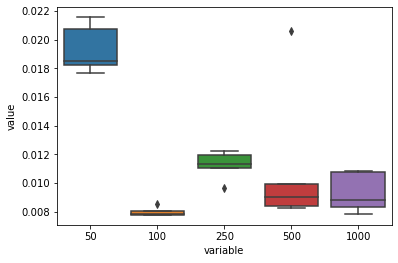

In [12]:
g = sns.boxplot(x='variable', y='value', data=df_melted) #100

In [13]:
dic = {}
for i in [65,70,75,80,90]:
    train_size = int(len(ds) * i/100) 
    train_dataset, test_dataset = ds[0:train_size,:], ds[train_size:len(ds),:]
    dic[i] = exp(6,5,128,100,2)
    df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_170"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_170 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_170 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 - 3s - loss: 2.4252 - 3s/epoch - 739ms/step
Epoch 2/100
4/4 - 0s - loss: 0.7091 - 73ms/epoch - 18ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0337 - 65ms/epoch - 16ms/step
Epoch 4/100
4/4 - 0s - loss: 0.2295 - 57ms/epoch - 14ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1362 - 57ms/epoch - 14ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0071 - 53ms/epoch - 13ms/step
Epoch 7/100

Epoch 1/100
4/4 - 3s - loss: 2.0458 - 3s/epoch - 777ms/step
Epoch 2/100
4/4 - 0s - loss: 0.5526 - 47ms/epoch - 12ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0335 - 46ms/epoch - 11ms/step
Epoch 4/100
4/4 - 0s - loss: 0.2250 - 44ms/epoch - 11ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0684 - 43ms/epoch - 11ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0070 - 43ms/epoch - 11ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0450 - 42ms/epoch - 10ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0430 - 40ms/epoch - 10ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0120 - 43ms/epoch - 11ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0020 - 42ms/epoch - 10ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0104 - 41ms/epoch - 10ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0072 - 42ms/epoch - 10ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0012 - 41ms/epoch - 10ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0023 - 43ms/epoch - 11ms/step
Epoch 15/100
4/4 - 0s - loss: 0.0028 - 41ms/epoch - 10ms/step
Epoch 16/100
4/4 - 0s - loss: 0.0012 - 41ms/epoch - 10ms/step
Epoch 17/100
4/4 -

Epoch 13/100
4/4 - 0s - loss: 8.8078e-04 - 52ms/epoch - 13ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0026 - 50ms/epoch - 12ms/step
Epoch 15/100
4/4 - 0s - loss: 0.0030 - 50ms/epoch - 12ms/step
Epoch 16/100
4/4 - 0s - loss: 0.0011 - 45ms/epoch - 11ms/step
Epoch 17/100
4/4 - 0s - loss: 8.5222e-04 - 49ms/epoch - 12ms/step
Epoch 18/100
4/4 - 0s - loss: 0.0013 - 57ms/epoch - 14ms/step
Epoch 19/100
4/4 - 0s - loss: 9.1960e-04 - 52ms/epoch - 13ms/step
Epoch 20/100
4/4 - 0s - loss: 6.6349e-04 - 50ms/epoch - 12ms/step
Epoch 21/100
4/4 - 0s - loss: 7.6546e-04 - 47ms/epoch - 12ms/step
Epoch 22/100
4/4 - 0s - loss: 7.6591e-04 - 53ms/epoch - 13ms/step
Epoch 23/100
4/4 - 0s - loss: 6.5610e-04 - 50ms/epoch - 12ms/step
Epoch 24/100
4/4 - 0s - loss: 6.6354e-04 - 45ms/epoch - 11ms/step
Epoch 25/100
4/4 - 0s - loss: 6.6394e-04 - 44ms/epoch - 11ms/step
Epoch 26/100
4/4 - 0s - loss: 6.3672e-04 - 43ms/epoch - 11ms/step
Epoch 27/100
4/4 - 0s - loss: 6.3984e-04 - 44ms/epoch - 11ms/step
Epoch 28/100
4/4 - 0s - lo

Epoch 24/100
4/4 - 0s - loss: 6.9215e-04 - 51ms/epoch - 13ms/step
Epoch 25/100
4/4 - 0s - loss: 7.1981e-04 - 51ms/epoch - 13ms/step
Epoch 26/100
4/4 - 0s - loss: 7.2455e-04 - 51ms/epoch - 13ms/step
Epoch 27/100
4/4 - 0s - loss: 7.0398e-04 - 51ms/epoch - 13ms/step
Epoch 28/100
4/4 - 0s - loss: 7.1104e-04 - 51ms/epoch - 13ms/step
Epoch 29/100
4/4 - 0s - loss: 7.0649e-04 - 51ms/epoch - 13ms/step
Epoch 30/100
4/4 - 0s - loss: 6.7854e-04 - 51ms/epoch - 13ms/step
Epoch 31/100
4/4 - 0s - loss: 7.0373e-04 - 51ms/epoch - 13ms/step
Epoch 32/100
4/4 - 0s - loss: 7.0060e-04 - 50ms/epoch - 12ms/step
Epoch 33/100
4/4 - 0s - loss: 6.6870e-04 - 49ms/epoch - 12ms/step
Epoch 34/100
4/4 - 0s - loss: 6.9112e-04 - 51ms/epoch - 13ms/step
Epoch 35/100
4/4 - 0s - loss: 6.8784e-04 - 51ms/epoch - 13ms/step
Epoch 36/100
4/4 - 0s - loss: 6.7369e-04 - 51ms/epoch - 13ms/step
Epoch 37/100
4/4 - 0s - loss: 6.7559e-04 - 50ms/epoch - 12ms/step
Epoch 38/100
4/4 - 0s - loss: 6.6246e-04 - 78ms/epoch - 19ms/step
Epoch 39/1

Epoch 35/100
4/4 - 0s - loss: 6.2053e-04 - 54ms/epoch - 13ms/step
Epoch 36/100
4/4 - 0s - loss: 6.2569e-04 - 51ms/epoch - 13ms/step
Epoch 37/100
4/4 - 0s - loss: 6.1184e-04 - 49ms/epoch - 12ms/step
Epoch 38/100
4/4 - 0s - loss: 6.0935e-04 - 46ms/epoch - 11ms/step
Epoch 39/100
4/4 - 0s - loss: 6.1832e-04 - 46ms/epoch - 11ms/step
Epoch 40/100
4/4 - 0s - loss: 6.3422e-04 - 45ms/epoch - 11ms/step
Epoch 41/100
4/4 - 0s - loss: 6.1114e-04 - 46ms/epoch - 11ms/step
Epoch 42/100
4/4 - 0s - loss: 5.9412e-04 - 46ms/epoch - 11ms/step
Epoch 43/100
4/4 - 0s - loss: 6.1388e-04 - 46ms/epoch - 11ms/step
Epoch 44/100
4/4 - 0s - loss: 6.0027e-04 - 52ms/epoch - 13ms/step
Epoch 45/100
4/4 - 0s - loss: 5.9541e-04 - 51ms/epoch - 13ms/step
Epoch 46/100
4/4 - 0s - loss: 5.9844e-04 - 50ms/epoch - 12ms/step
Epoch 47/100
4/4 - 0s - loss: 5.8205e-04 - 53ms/epoch - 13ms/step
Epoch 48/100
4/4 - 0s - loss: 6.0432e-04 - 52ms/epoch - 13ms/step
Epoch 49/100
4/4 - 0s - loss: 5.9861e-04 - 51ms/epoch - 13ms/step
Epoch 50/1

Epoch 46/100
4/4 - 0s - loss: 6.8017e-04 - 50ms/epoch - 12ms/step
Epoch 47/100
4/4 - 0s - loss: 6.9040e-04 - 51ms/epoch - 13ms/step
Epoch 48/100
4/4 - 0s - loss: 6.7011e-04 - 51ms/epoch - 13ms/step
Epoch 49/100
4/4 - 0s - loss: 6.6376e-04 - 49ms/epoch - 12ms/step
Epoch 50/100
4/4 - 0s - loss: 6.6715e-04 - 51ms/epoch - 13ms/step
Epoch 51/100
4/4 - 0s - loss: 6.6254e-04 - 53ms/epoch - 13ms/step
Epoch 52/100
4/4 - 0s - loss: 6.5666e-04 - 53ms/epoch - 13ms/step
Epoch 53/100
4/4 - 0s - loss: 6.4413e-04 - 48ms/epoch - 12ms/step
Epoch 54/100
4/4 - 0s - loss: 6.4389e-04 - 49ms/epoch - 12ms/step
Epoch 55/100
4/4 - 0s - loss: 6.4500e-04 - 49ms/epoch - 12ms/step
Epoch 56/100
4/4 - 0s - loss: 6.3287e-04 - 49ms/epoch - 12ms/step
Epoch 57/100
4/4 - 0s - loss: 6.2688e-04 - 50ms/epoch - 12ms/step
Epoch 58/100
4/4 - 0s - loss: 6.2699e-04 - 49ms/epoch - 12ms/step
Epoch 59/100
4/4 - 0s - loss: 6.2366e-04 - 52ms/epoch - 13ms/step
Epoch 60/100
4/4 - 0s - loss: 6.1346e-04 - 48ms/epoch - 12ms/step
Epoch 61/1

Epoch 57/100
4/4 - 0s - loss: 6.3842e-04 - 57ms/epoch - 14ms/step
Epoch 58/100
4/4 - 0s - loss: 6.1974e-04 - 55ms/epoch - 14ms/step
Epoch 59/100
4/4 - 0s - loss: 6.2829e-04 - 57ms/epoch - 14ms/step
Epoch 60/100
4/4 - 0s - loss: 6.1651e-04 - 55ms/epoch - 14ms/step
Epoch 61/100
4/4 - 0s - loss: 6.0316e-04 - 55ms/epoch - 14ms/step
Epoch 62/100
4/4 - 0s - loss: 6.1004e-04 - 58ms/epoch - 14ms/step
Epoch 63/100
4/4 - 0s - loss: 5.9855e-04 - 55ms/epoch - 14ms/step
Epoch 64/100
4/4 - 0s - loss: 6.0513e-04 - 58ms/epoch - 14ms/step
Epoch 65/100
4/4 - 0s - loss: 5.9632e-04 - 54ms/epoch - 13ms/step
Epoch 66/100
4/4 - 0s - loss: 5.8030e-04 - 58ms/epoch - 14ms/step
Epoch 67/100
4/4 - 0s - loss: 5.7706e-04 - 55ms/epoch - 14ms/step
Epoch 68/100
4/4 - 0s - loss: 5.7533e-04 - 55ms/epoch - 14ms/step
Epoch 69/100
4/4 - 0s - loss: 5.7001e-04 - 57ms/epoch - 14ms/step
Epoch 70/100
4/4 - 0s - loss: 5.6944e-04 - 54ms/epoch - 13ms/step
Epoch 71/100
4/4 - 0s - loss: 5.6400e-04 - 57ms/epoch - 14ms/step
Epoch 72/1

Epoch 68/100
4/4 - 0s - loss: 5.8486e-04 - 51ms/epoch - 13ms/step
Epoch 69/100
4/4 - 0s - loss: 5.8093e-04 - 51ms/epoch - 13ms/step
Epoch 70/100
4/4 - 0s - loss: 5.8326e-04 - 51ms/epoch - 13ms/step
Epoch 71/100
4/4 - 0s - loss: 5.7012e-04 - 49ms/epoch - 12ms/step
Epoch 72/100
4/4 - 0s - loss: 5.7526e-04 - 49ms/epoch - 12ms/step
Epoch 73/100
4/4 - 0s - loss: 5.7866e-04 - 50ms/epoch - 12ms/step
Epoch 74/100
4/4 - 0s - loss: 5.6365e-04 - 50ms/epoch - 12ms/step
Epoch 75/100
4/4 - 0s - loss: 5.5650e-04 - 51ms/epoch - 13ms/step
Epoch 76/100
4/4 - 0s - loss: 5.5061e-04 - 53ms/epoch - 13ms/step
Epoch 77/100
4/4 - 0s - loss: 5.5158e-04 - 51ms/epoch - 13ms/step
Epoch 78/100
4/4 - 0s - loss: 5.4405e-04 - 52ms/epoch - 13ms/step
Epoch 79/100
4/4 - 0s - loss: 5.4794e-04 - 51ms/epoch - 13ms/step
Epoch 80/100
4/4 - 0s - loss: 5.3823e-04 - 50ms/epoch - 12ms/step
Epoch 81/100
4/4 - 0s - loss: 5.2815e-04 - 50ms/epoch - 12ms/step
Epoch 82/100
4/4 - 0s - loss: 5.4010e-04 - 54ms/epoch - 13ms/step
Epoch 83/1

Epoch 79/100
4/4 - 0s - loss: 5.1503e-04 - 57ms/epoch - 14ms/step
Epoch 80/100
4/4 - 0s - loss: 5.0685e-04 - 57ms/epoch - 14ms/step
Epoch 81/100
4/4 - 0s - loss: 5.0610e-04 - 60ms/epoch - 15ms/step
Epoch 82/100
4/4 - 0s - loss: 5.0878e-04 - 57ms/epoch - 14ms/step
Epoch 83/100
4/4 - 0s - loss: 4.9945e-04 - 59ms/epoch - 15ms/step
Epoch 84/100
4/4 - 0s - loss: 4.9115e-04 - 60ms/epoch - 15ms/step
Epoch 85/100
4/4 - 0s - loss: 4.9650e-04 - 57ms/epoch - 14ms/step
Epoch 86/100
4/4 - 0s - loss: 4.8331e-04 - 60ms/epoch - 15ms/step
Epoch 87/100
4/4 - 0s - loss: 4.8537e-04 - 58ms/epoch - 14ms/step
Epoch 88/100
4/4 - 0s - loss: 4.8138e-04 - 60ms/epoch - 15ms/step
Epoch 89/100
4/4 - 0s - loss: 4.8466e-04 - 60ms/epoch - 15ms/step
Epoch 90/100
4/4 - 0s - loss: 4.7728e-04 - 58ms/epoch - 14ms/step
Epoch 91/100
4/4 - 0s - loss: 4.7237e-04 - 61ms/epoch - 15ms/step
Epoch 92/100
4/4 - 0s - loss: 4.7508e-04 - 63ms/epoch - 16ms/step
Epoch 93/100
4/4 - 0s - loss: 4.7432e-04 - 64ms/epoch - 16ms/step
Epoch 94/1

Epoch 90/100
4/4 - 0s - loss: 5.2642e-04 - 46ms/epoch - 11ms/step
Epoch 91/100
4/4 - 0s - loss: 5.1570e-04 - 48ms/epoch - 12ms/step
Epoch 92/100
4/4 - 0s - loss: 5.2260e-04 - 47ms/epoch - 12ms/step
Epoch 93/100
4/4 - 0s - loss: 5.2328e-04 - 46ms/epoch - 11ms/step
Epoch 94/100
4/4 - 0s - loss: 5.0669e-04 - 47ms/epoch - 12ms/step
Epoch 95/100
4/4 - 0s - loss: 5.0125e-04 - 50ms/epoch - 12ms/step
Epoch 96/100
4/4 - 0s - loss: 5.0433e-04 - 47ms/epoch - 12ms/step
Epoch 97/100
4/4 - 0s - loss: 4.9384e-04 - 46ms/epoch - 11ms/step
Epoch 98/100
4/4 - 0s - loss: 4.9505e-04 - 45ms/epoch - 11ms/step
Epoch 99/100
4/4 - 0s - loss: 4.8838e-04 - 45ms/epoch - 11ms/step
Epoch 100/100
4/4 - 0s - loss: 4.9024e-04 - 46ms/epoch - 11ms/step
4/4 [==============================] - 1s 5ms/step - loss: 4.8916e-04
Train Score: 0.0005 MSE (0.02212 RMSE)
2/2 [==============================] - 0s 6ms/step - loss: 3.9428e-04
Test Score: 0.0004 MSE (0.01986 RMSE)
Model: "sequential_180"
________________________________

4/4 [==============================] - 1s 5ms/step - loss: 4.4116e-04
Train Score: 0.0004 MSE (0.02100 RMSE)
2/2 [==============================] - 0s 4ms/step - loss: 3.9983e-04
Test Score: 0.0004 MSE (0.02000 RMSE)
Model: "sequential_181"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_181 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_181 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 - 3s - loss: 1.7730 - 3s/epoch - 738ms/step
Epoch 2/100
4/4 - 0s - loss: 0.3472 - 49ms/epoch - 12ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0874 - 

                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 - 3s - loss: 2.2027 - 3s/epoch - 754ms/step
Epoch 2/100
4/4 - 0s - loss: 0.6223 - 63ms/epoch - 16ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0431 - 59ms/epoch - 15ms/step
Epoch 4/100
4/4 - 0s - loss: 0.2158 - 62ms/epoch - 15ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1070 - 61ms/epoch - 15ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0052 - 63ms/epoch - 16ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0325 - 62ms/epoch - 15ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0456 - 59ms/epoch - 15ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0216 - 64ms/epoch - 16ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0025 - 76ms/epoch - 19ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0063 - 73ms/epoch - 18ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0094 - 63ms/epoch - 16ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0032 - 70ms/epoch - 17ms/step


4/4 - 0s - loss: 0.0437 - 60ms/epoch - 15ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0116 - 64ms/epoch - 16ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0026 - 61ms/epoch - 15ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0110 - 59ms/epoch - 15ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0077 - 53ms/epoch - 13ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0016 - 58ms/epoch - 14ms/step
Epoch 14/100
4/4 - 0s - loss: 0.0025 - 55ms/epoch - 14ms/step
Epoch 15/100
4/4 - 0s - loss: 0.0033 - 57ms/epoch - 14ms/step
Epoch 16/100
4/4 - 0s - loss: 0.0015 - 54ms/epoch - 13ms/step
Epoch 17/100
4/4 - 0s - loss: 0.0011 - 54ms/epoch - 13ms/step
Epoch 18/100
4/4 - 0s - loss: 0.0015 - 57ms/epoch - 14ms/step
Epoch 19/100
4/4 - 0s - loss: 0.0011 - 56ms/epoch - 14ms/step
Epoch 20/100
4/4 - 0s - loss: 8.9984e-04 - 56ms/epoch - 14ms/step
Epoch 21/100
4/4 - 0s - loss: 0.0010 - 55ms/epoch - 14ms/step
Epoch 22/100
4/4 - 0s - loss: 9.8644e-04 - 58ms/epoch - 14ms/step
Epoch 23/100
4/4 - 0s - loss: 8.5441e-04 - 55ms/epoch - 14ms/step
Epoch 24/1

Epoch 20/100
4/4 - 0s - loss: 8.5120e-04 - 54ms/epoch - 13ms/step
Epoch 21/100
4/4 - 0s - loss: 8.7116e-04 - 54ms/epoch - 13ms/step
Epoch 22/100
4/4 - 0s - loss: 7.2647e-04 - 50ms/epoch - 12ms/step
Epoch 23/100
4/4 - 0s - loss: 7.2120e-04 - 51ms/epoch - 13ms/step
Epoch 24/100
4/4 - 0s - loss: 7.3784e-04 - 51ms/epoch - 13ms/step
Epoch 25/100
4/4 - 0s - loss: 6.9897e-04 - 51ms/epoch - 13ms/step
Epoch 26/100
4/4 - 0s - loss: 6.9529e-04 - 51ms/epoch - 13ms/step
Epoch 27/100
4/4 - 0s - loss: 6.8827e-04 - 69ms/epoch - 17ms/step
Epoch 28/100
4/4 - 0s - loss: 6.7167e-04 - 72ms/epoch - 18ms/step
Epoch 29/100
4/4 - 0s - loss: 6.8740e-04 - 65ms/epoch - 16ms/step
Epoch 30/100
4/4 - 0s - loss: 6.7297e-04 - 71ms/epoch - 18ms/step
Epoch 31/100
4/4 - 0s - loss: 6.6837e-04 - 78ms/epoch - 19ms/step
Epoch 32/100
4/4 - 0s - loss: 6.6120e-04 - 63ms/epoch - 16ms/step
Epoch 33/100
4/4 - 0s - loss: 6.5600e-04 - 57ms/epoch - 14ms/step
Epoch 34/100
4/4 - 0s - loss: 6.5175e-04 - 58ms/epoch - 14ms/step
Epoch 35/1

Epoch 31/100
4/4 - 0s - loss: 7.0287e-04 - 49ms/epoch - 12ms/step
Epoch 32/100
4/4 - 0s - loss: 6.9984e-04 - 74ms/epoch - 18ms/step
Epoch 33/100
4/4 - 0s - loss: 6.9008e-04 - 55ms/epoch - 14ms/step
Epoch 34/100
4/4 - 0s - loss: 6.8397e-04 - 52ms/epoch - 13ms/step
Epoch 35/100
4/4 - 0s - loss: 6.7710e-04 - 47ms/epoch - 12ms/step
Epoch 36/100
4/4 - 0s - loss: 6.7400e-04 - 49ms/epoch - 12ms/step
Epoch 37/100
4/4 - 0s - loss: 6.6710e-04 - 48ms/epoch - 12ms/step
Epoch 38/100
4/4 - 0s - loss: 6.6165e-04 - 48ms/epoch - 12ms/step
Epoch 39/100
4/4 - 0s - loss: 6.5701e-04 - 48ms/epoch - 12ms/step
Epoch 40/100
4/4 - 0s - loss: 6.4772e-04 - 51ms/epoch - 13ms/step
Epoch 41/100
4/4 - 0s - loss: 6.4986e-04 - 48ms/epoch - 12ms/step
Epoch 42/100
4/4 - 0s - loss: 6.3971e-04 - 48ms/epoch - 12ms/step
Epoch 43/100
4/4 - 0s - loss: 6.3704e-04 - 48ms/epoch - 12ms/step
Epoch 44/100
4/4 - 0s - loss: 6.2399e-04 - 48ms/epoch - 12ms/step
Epoch 45/100
4/4 - 0s - loss: 6.1982e-04 - 48ms/epoch - 12ms/step
Epoch 46/1

Epoch 42/100
4/4 - 0s - loss: 7.6101e-04 - 73ms/epoch - 18ms/step
Epoch 43/100
4/4 - 0s - loss: 7.5624e-04 - 47ms/epoch - 12ms/step
Epoch 44/100
4/4 - 0s - loss: 7.4837e-04 - 47ms/epoch - 12ms/step
Epoch 45/100
4/4 - 0s - loss: 7.3915e-04 - 46ms/epoch - 11ms/step
Epoch 46/100
4/4 - 0s - loss: 7.2875e-04 - 47ms/epoch - 12ms/step
Epoch 47/100
4/4 - 0s - loss: 7.2219e-04 - 46ms/epoch - 11ms/step
Epoch 48/100
4/4 - 0s - loss: 7.1848e-04 - 46ms/epoch - 11ms/step
Epoch 49/100
4/4 - 0s - loss: 7.0803e-04 - 46ms/epoch - 11ms/step
Epoch 50/100
4/4 - 0s - loss: 7.0034e-04 - 46ms/epoch - 11ms/step
Epoch 51/100
4/4 - 0s - loss: 6.9727e-04 - 47ms/epoch - 12ms/step
Epoch 52/100
4/4 - 0s - loss: 6.9726e-04 - 47ms/epoch - 12ms/step
Epoch 53/100
4/4 - 0s - loss: 6.8061e-04 - 48ms/epoch - 12ms/step
Epoch 54/100
4/4 - 0s - loss: 6.7256e-04 - 47ms/epoch - 12ms/step
Epoch 55/100
4/4 - 0s - loss: 6.7172e-04 - 47ms/epoch - 12ms/step
Epoch 56/100
4/4 - 0s - loss: 6.5840e-04 - 47ms/epoch - 12ms/step
Epoch 57/1

Epoch 53/100
4/4 - 0s - loss: 6.5805e-04 - 82ms/epoch - 21ms/step
Epoch 54/100
4/4 - 0s - loss: 6.5735e-04 - 71ms/epoch - 18ms/step
Epoch 55/100
4/4 - 0s - loss: 6.4105e-04 - 54ms/epoch - 13ms/step
Epoch 56/100
4/4 - 0s - loss: 6.5137e-04 - 52ms/epoch - 13ms/step
Epoch 57/100
4/4 - 0s - loss: 6.2844e-04 - 54ms/epoch - 13ms/step
Epoch 58/100
4/4 - 0s - loss: 6.1927e-04 - 54ms/epoch - 14ms/step
Epoch 59/100
4/4 - 0s - loss: 6.1717e-04 - 57ms/epoch - 14ms/step
Epoch 60/100
4/4 - 0s - loss: 6.0509e-04 - 56ms/epoch - 14ms/step
Epoch 61/100
4/4 - 0s - loss: 5.9835e-04 - 56ms/epoch - 14ms/step
Epoch 62/100
4/4 - 0s - loss: 5.9733e-04 - 85ms/epoch - 21ms/step
Epoch 63/100
4/4 - 0s - loss: 5.8538e-04 - 53ms/epoch - 13ms/step
Epoch 64/100
4/4 - 0s - loss: 5.8066e-04 - 54ms/epoch - 13ms/step
Epoch 65/100
4/4 - 0s - loss: 5.7132e-04 - 50ms/epoch - 12ms/step
Epoch 66/100
4/4 - 0s - loss: 5.6541e-04 - 51ms/epoch - 13ms/step
Epoch 67/100
4/4 - 0s - loss: 5.5942e-04 - 51ms/epoch - 13ms/step
Epoch 68/1

Epoch 64/100
4/4 - 0s - loss: 6.1892e-04 - 70ms/epoch - 18ms/step
Epoch 65/100
4/4 - 0s - loss: 5.9188e-04 - 61ms/epoch - 15ms/step
Epoch 66/100
4/4 - 0s - loss: 5.9381e-04 - 61ms/epoch - 15ms/step
Epoch 67/100
4/4 - 0s - loss: 5.7658e-04 - 62ms/epoch - 15ms/step
Epoch 68/100
4/4 - 0s - loss: 5.8338e-04 - 64ms/epoch - 16ms/step
Epoch 69/100
4/4 - 0s - loss: 5.6390e-04 - 65ms/epoch - 16ms/step
Epoch 70/100
4/4 - 0s - loss: 5.6383e-04 - 64ms/epoch - 16ms/step
Epoch 71/100
4/4 - 0s - loss: 5.5532e-04 - 64ms/epoch - 16ms/step
Epoch 72/100
4/4 - 0s - loss: 5.4418e-04 - 65ms/epoch - 16ms/step
Epoch 73/100
4/4 - 0s - loss: 5.4530e-04 - 67ms/epoch - 17ms/step
Epoch 74/100
4/4 - 0s - loss: 5.3490e-04 - 72ms/epoch - 18ms/step
Epoch 75/100
4/4 - 0s - loss: 5.3544e-04 - 67ms/epoch - 17ms/step
Epoch 76/100
4/4 - 0s - loss: 5.2159e-04 - 64ms/epoch - 16ms/step
Epoch 77/100
4/4 - 0s - loss: 5.2237e-04 - 64ms/epoch - 16ms/step
Epoch 78/100
4/4 - 0s - loss: 5.1346e-04 - 79ms/epoch - 20ms/step
Epoch 79/1

Epoch 75/100
4/4 - 0s - loss: 5.4957e-04 - 88ms/epoch - 22ms/step
Epoch 76/100
4/4 - 0s - loss: 5.4093e-04 - 62ms/epoch - 15ms/step
Epoch 77/100
4/4 - 0s - loss: 5.3733e-04 - 64ms/epoch - 16ms/step
Epoch 78/100
4/4 - 0s - loss: 5.2980e-04 - 68ms/epoch - 17ms/step
Epoch 79/100
4/4 - 0s - loss: 5.2693e-04 - 70ms/epoch - 17ms/step
Epoch 80/100
4/4 - 0s - loss: 5.2372e-04 - 69ms/epoch - 17ms/step
Epoch 81/100
4/4 - 0s - loss: 5.1557e-04 - 58ms/epoch - 14ms/step
Epoch 82/100
4/4 - 0s - loss: 5.1428e-04 - 57ms/epoch - 14ms/step
Epoch 83/100
4/4 - 0s - loss: 5.0476e-04 - 57ms/epoch - 14ms/step
Epoch 84/100
4/4 - 0s - loss: 5.0091e-04 - 56ms/epoch - 14ms/step
Epoch 85/100
4/4 - 0s - loss: 4.9685e-04 - 57ms/epoch - 14ms/step
Epoch 86/100
4/4 - 0s - loss: 4.9480e-04 - 62ms/epoch - 15ms/step
Epoch 87/100
4/4 - 0s - loss: 4.8454e-04 - 60ms/epoch - 15ms/step
Epoch 88/100
4/4 - 0s - loss: 4.8082e-04 - 61ms/epoch - 15ms/step
Epoch 89/100
4/4 - 0s - loss: 4.7694e-04 - 56ms/epoch - 14ms/step
Epoch 90/1

Epoch 86/100
5/5 - 0s - loss: 3.2454e-04 - 78ms/epoch - 16ms/step
Epoch 87/100
5/5 - 0s - loss: 3.2403e-04 - 77ms/epoch - 15ms/step
Epoch 88/100
5/5 - 0s - loss: 3.2251e-04 - 79ms/epoch - 16ms/step
Epoch 89/100
5/5 - 0s - loss: 3.1793e-04 - 78ms/epoch - 16ms/step
Epoch 90/100
5/5 - 0s - loss: 3.1406e-04 - 76ms/epoch - 15ms/step
Epoch 91/100
5/5 - 0s - loss: 3.1163e-04 - 76ms/epoch - 15ms/step
Epoch 92/100
5/5 - 0s - loss: 3.0981e-04 - 76ms/epoch - 15ms/step
Epoch 93/100
5/5 - 0s - loss: 3.0847e-04 - 71ms/epoch - 14ms/step
Epoch 94/100
5/5 - 0s - loss: 3.0819e-04 - 72ms/epoch - 14ms/step
Epoch 95/100
5/5 - 0s - loss: 3.0191e-04 - 68ms/epoch - 14ms/step
Epoch 96/100
5/5 - 0s - loss: 3.0250e-04 - 70ms/epoch - 14ms/step
Epoch 97/100
5/5 - 0s - loss: 3.0331e-04 - 68ms/epoch - 14ms/step
Epoch 98/100
5/5 - 0s - loss: 2.9713e-04 - 69ms/epoch - 14ms/step
Epoch 99/100
5/5 - 0s - loss: 3.0005e-04 - 69ms/epoch - 14ms/step
Epoch 100/100
5/5 - 0s - loss: 2.9501e-04 - 76ms/epoch - 15ms/step
5/5 [====

Epoch 97/100
5/5 - 0s - loss: 2.8613e-04 - 58ms/epoch - 12ms/step
Epoch 98/100
5/5 - 0s - loss: 2.8458e-04 - 59ms/epoch - 12ms/step
Epoch 99/100
5/5 - 0s - loss: 2.9367e-04 - 58ms/epoch - 12ms/step
Epoch 100/100
5/5 - 0s - loss: 3.0426e-04 - 58ms/epoch - 12ms/step
5/5 [==============================] - 1s 6ms/step - loss: 2.8944e-04
Train Score: 0.0003 MSE (0.01701 RMSE)
1/1 [==============================] - 0s 22ms/step - loss: 6.3837e-05
Test Score: 0.0001 MSE (0.00799 RMSE)
Model: "sequential_192"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_192 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_192 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable

 bidirectional_193 (Bidirect  (None, 256)              133120    
 ional)                                                          
                                                                 
 dense_193 (Dense)           (None, 1)                 257       
                                                                 
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 - 3s - loss: 1.3148 - 3s/epoch - 598ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0875 - 70ms/epoch - 14ms/step
Epoch 3/100
5/5 - 0s - loss: 0.2027 - 68ms/epoch - 14ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0346 - 68ms/epoch - 14ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0262 - 74ms/epoch - 15ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0437 - 69ms/epoch - 14ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0109 - 71ms/epoch - 14ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0043 - 71ms/epoch - 14ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0095 - 68ms/ep

Epoch 4/100
5/5 - 0s - loss: 0.2155 - 65ms/epoch - 13ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0295 - 65ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0247 - 66ms/epoch - 13ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0458 - 63ms/epoch - 13ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0169 - 67ms/epoch - 13ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0026 - 65ms/epoch - 13ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0097 - 67ms/epoch - 13ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0041 - 67ms/epoch - 13ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0018 - 74ms/epoch - 15ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0033 - 68ms/epoch - 14ms/step
Epoch 14/100
5/5 - 0s - loss: 0.0017 - 73ms/epoch - 15ms/step
Epoch 15/100
5/5 - 0s - loss: 0.0013 - 75ms/epoch - 15ms/step
Epoch 16/100
5/5 - 0s - loss: 0.0016 - 77ms/epoch - 15ms/step
Epoch 17/100
5/5 - 0s - loss: 0.0011 - 69ms/epoch - 14ms/step
Epoch 18/100
5/5 - 0s - loss: 0.0011 - 63ms/epoch - 13ms/step
Epoch 19/100
5/5 - 0s - loss: 0.0011 - 65ms/epoch - 13ms/step
Epoch 20/100
5

<AxesSubplot:xlabel='variable', ylabel='value'>

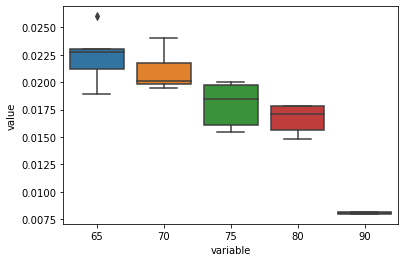

In [14]:
sns.boxplot(x='variable', y='value', data=df_melted) #90

In [15]:
dic

{65: [0.0260184066179642,
  0.02274675415463623,
  0.01892617751893592,
  0.023060686460527932,
  0.02115801884457281],
 70: [0.02401907040863787,
  0.019484433300950912,
  0.02178295754341531,
  0.02007917787800738,
  0.019856360762171333],
 75: [0.019995648979036645,
  0.015469715440188766,
  0.018485529377795646,
  0.019778450093431918,
  0.01608529152448529],
 80: [0.01479848957952054,
  0.017805205632421047,
  0.01709257512744991,
  0.015605619731042613,
  0.017854536410590295],
 90: [0.008115458454528336,
  0.007989788032084333,
  0.00797690596358279,
  0.008189647305248491,
  0.008077314521875906]}